(app)=

# 11. Appendiceal Topics

This chapter is different from the rest because it is not about any
specific topic. Instead it is a collection of different topics that
provide support for the rest of the book by complementing topics
discussed in other chapters. These topics are here for readers who are
interested in going deeper into each of the methods and theory. In terms
of writing style it will be a little bit more theoretical and abstract
than other chapters.

(probability-background)=

## 11.1. Probability Background

The Spanish word azahar (the flower of certain critics) and azar
(randomness) are not similar out of pure luck. They both come from the
Arabic language [^1]. From ancient times, and even today, certain games
of chance use a bone that it has two flat sides. This bone is similar to
a coin or a two-side die. To make it easier to identify one side from
the other, at least one side has a distinctive mark, for example,
ancient Arabs commonly used a flower. With the passage of time Spanish
adopted the term azahar for certain flowers and azar to mean randomness.
One of the motivation to the development of probability theory can be
track back to understanding games of chance and probably trying to make
an small fortune in the process. So let us start this brief introduction
to some of the central concepts in probability theory[^2] imagining a
6-sided die. Each time we roll the die it is only possible to obtain an
integer from 1 to 6 without preference of one over another. Using Python
we can program a die like this in the following way:

``` {code-block} python
:name: die
:caption: die

def die():
    outcomes = [1, 2, 3, 4, 5, 6]
    return np.random.choice(outcomes)
```

[^1]: Most of the territory of what we now call Spain and Portugal was
    part of Al-Andalus and Arabic state, this had a tremendous influence
    in the Spanish/Portuguese culture, including food, music, language
    and also in the genetic makeup.

[^2]: For those who are interested in delving further into the subject,
    we recommend reading the book Introduction to Probability by Joseph
    K. Blitzstein and Jessica Hwang {cite:p}`blitzstein_2019`.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from scipy.special import binom, betaln

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300

In [3]:
np.random.seed(14067)

In [4]:
def die():
    outcomes = [1, 2, 3, 4, 5, 6]
    return np.random.choice(outcomes)

die()

6

Suppose we suspect that the die is biased. What could we do to evaluate
this possibility? A scientific way to answer this question is to collect
data and analyze it. Using Python we can simulate the data collection as
in Code Block [experiment](experiment).

``` {code-block} python
:name: experiment
:caption: experiment

def experiment(N=10):
    sample = [die() for i in range(N)]

    for i in range(1, 7):
        print(f"{i}: {sample.count(i)/N:.2g}")

experiment()
```

```none
1: 0
2: 0.1
3: 0.4
4: 0.1
5: 0.4
6: 0
```

In [5]:
def experiment(N=10):
    sample = [die() for i in range(N)]

    for i in range(1, 7):
        print(f"{i}: {sample.count(i)/N:.2g}")

experiment()

1: 0
2: 0.1
3: 0.3
4: 0
5: 0.2
6: 0.4


The numbers in the first column are the possible outcomes. Those in the
second column correspond to the frequency with which each number
appears. Frequency is the number of times each of the possible outcomes
appears divided by `N`, the total number of times we roll the die.

There are at least two things to take note of in this example. First if
we execute `experiment()` several times, we will see that we obtain a
different result each time. This is precisely the reason for using dice
in games of chance, every time we roll them we get a number that we
cannot predict. Second, if we roll the same die many times, the ability
to predict each single outcome does not improve. Nevertheless, data
collection and analysis can actually help us to estimate the *list of
frequencies* for the outcomes, in fact the ability improves as the value
of `N` increases. Run the experiment for `N=10000` times you will see
that the frequencies obtained are approximately $0.17$ and it turns out
that $0.17 \approx \frac{1}{6}$ which is what we would expect if each
number on the die had the same chance.

These two observations are not restricted to dice and games of chance.
If we weigh ourselves every day we would obtain different values, since
our weight is related to the amount of food we eat, the water we drink,
how many times we went to the bathroom, the precision of the scale, the
clothes we wear and many other factors. Therefore, a single measurement
may not be *representative* of our weight. Of course it could be that
the variations are small and we do not consider them important, but we
are getting ahead of ourselves. At this point what matters is that the
data measurement and/or collection is accompanied by uncertainty.
Statistics is basically the field concerned with how to deal with
uncertainty in practical problems and Probability theory is one of the
theoretical pillars of statistics. Probability theory help us formalize
discussion like the one we just had and extend them beyond dice. This is
so we can better ask and answer questions related to expected outcomes,
such as what happens when we increase the number of experiments, what
event has higher chance than another, etc.

(probability)=

### 11.1.1. Probability

Probability is the mathematical device that allow us to quantify
uncertainty in a principled way. Like other mathematical objects and
theories, they can be justified entirely from a pure mathematical
perspective. Nevertheless, from a practical point of view we can justify
them as *naturally* arising from performing experiments, collecting
observational data and even when doing computational simulations. For
simplicity we will talk about experiments, knowing we are using this
term in a very broad sense. To think about probabilities we can think in
terms of mathematical sets. The **sample space** $\mathcal{X}$ is the
set of all possible events from an **experiment**. An **event** $A$ is a
subset of $\mathcal{X}$. We say $A$ happens when we perform an
experiment and we get $A$ as the outcome. For a typical 6 face die we
can write:

```{math} 
:label: eq:sample_space_dice
\mathcal{X} = \{1, 2, 3, 4, 5, 6\}
    
```

We may define the event $A$ as any subset of $\mathcal{X}$, for example,
getting an even number, $A = \{2, 4, 6\}$. We can associate
probabilities to events. If we want to indicate the probability of the
event $A$ we write $P(A=\{2, 4, 6\})$ or to be more concise $P(A)$. The
probability function $P$ takes an event $A$ which is a subset of
$\mathcal{X}$ as input and returns $P(A)$. Probabilities, like $P(A)$,
can take any number in the interval 0 to 1 (including both extremes),
using interval notation we write this is as $[0, 1]$, the brackets
meaning inclusive bounds. If the event never happens then the
probability of that event is 0, for example $P(A=-1)=0$, if the event
always happens then it has probability 1, for example
$P(A=\{1,2,3,4,5,6\})=1$. We say events are disjoint if they can not
happen together, for example, if the event $A_1$ represent odds numbers
and $A_2$ even numbers, then the probability of rolling a die an getting
both $A_1$ and $A_2$ is 0. If the event $A_1, A_2, \cdots A_n$ are
disjoint, meaning they can not happen at the same time, then
$\sum_i^n P(A_i) = 1$. Continuing with the example of $A_1$ representing
odd numbers and $A_2$ even numbers, then the probability of rolling a
die and getting either $A_1$ or $A_2$ is 1. Any function that satisfies
these properties is a valid probability function. We can think of
probability as a positive, conserved quantity that is allocated across
the possible events [^3].

As we just saw, probabilities have a clear mathematical definition. How
we interpret probabilities is a different story with different schools
of thought. As Bayesian we tend to interpret probabilities as degrees of
uncertainty. For example, for a fair die, the probability of getting an
odd number when rolling a die is $0.5$, meaning we are half-sure we will
get an odd number. Alternatively we can interpret this number as saying
if we roll a die infinite times, half the time we will get odd numbers
and half the time even numbers. This is the frequentist interpretation
which is also a useful way of thinking about probabilities. If you do
not want to roll the die infinite times you can just roll it a large
number of times and say that you will approximately get odds half of the
time. This is in fact what we did in Code Block
[experiment](experiment). Finally, we notice that for a
fair die we expect the probability of getting any single number to be
$\frac{1}{6}$, but for a non-fair die this probability may be different.
The equiprobability of the outcomes is just a special case.

If probabilities reflect uncertainty, then is *natural* to ask what is
the probability that the mass of Mars is $6.39 \times 10^{23}$ kg, or
the probability of rain on May 1 in Helsinki, or the probability that
capitalism gets replaced by a different socio-economical system in the
next 3 decades. We say this definition of probability is epistemic,
since it is not about a property of the *real world* (whatever that is)
but a property about our knowledge about that world. We collect data and
analyze it, because we think that we can update our internal knowledge
state based on external information.

We notice that what can happen in the *real world* is determined by all
the details of the experiments, even those we do not control or are not
aware of. On the contrary the sample space is a mathematical object that
we define either implicitly or explicitly. For example, by defining the
sample space of our die as in Equation {eq}`eq:sample_space_dice` we are
ruling out the possibility of the die landing on an edge, which is
actually possible when rolling dice in a non-flat surface. Elements from
the sample space may be excluded on purpose, for example, we may have
designed the experiment in such a way that we roll the die until we get
one integer from $\{1, 2, 3, 4, 5, 6\}$. Or by omission, like in a
survey we may ask people about their gender, but if we only include
female or male as options in the possible response, we may force people
to choose between two non-adequate answers or completely miss their
answers as they may not feel interested in responding to the rest of the
survey. We must be aware that the platonic world of ideas which includes
all mathematical concepts is different from the *real world*, in
statistical modeling we constantly switch back and forth between these
two worlds.

[^3]: From this definition John K. Kruschke wonderfully states that
    Bayesian inference is reallocation of credibility (probability)
    across possibilities {cite:p}`Kruschke2014`.



(conditional_probability)=

### 11.1.2. Conditional Probability

Given two events $A$ and $B$ with $P(B) > 0$, the probability of $A$
given $B$, which we write as $P(A \mid B)$ is defined as :

```{math}
:label: eq:conditional_probability
P(A \mid B) = \frac{P(A, B)}{P(B)}
```

$P(A, B)$ is the probability that the events $A$ and $B$ occur, it is
also usually written as $P(A \cap B)$ (the symbol $\cap$ indicates
intersection of sets), the probability of the intersection of the events
$A$ and $B$.

$P(A \mid B)$ it is known as conditional probability, and it is the
probability that event $A$ occurs, conditioned by the fact that we know
(or assume, imagine, hypothesize, etc) that $B$ has occurred. For
example, the probability that a sidewalk is wet is different from the
probability that such a sidewalk is wet given that it is raining.

A conditional probability can be viewed as the reduction or restriction
of the sample space. {numref}`fig:cond` shows how we went from having
the events $A$ and $B$ in the sample space $\mathcal{X}$, on the left,
to having $B$ as the sample space and a subset of $A$, the one being
compatible with $B$. When we say *that $B$ has occurred* we are not
necessarily talking about something in the past, it is just a more
colloquial way of saying, *once we have conditioned on $B$* or *once we
have restricted the sample space to agree with the evidence $B$*.

```{figure} figures/cond.png
:name: fig:cond
:width: 8.00in
Conditioning is redefining the sample space. On the left we see the
sample $\mathcal{X}$, each circle represent a possible outcome. We have
two events, $A$ and $B$. On the right we have represented $P(A \mid B)$,
once we know $B$ we can rule out all events not in $B$. This figure was
adapted from Introduction to Probability {cite:p}`blitzstein_2019`.
```

The concept of conditional probability is at the heart of statistics and
is central to thinking about how we should update our knowledge of an
event in the light of new data. All probabilities are conditional, with
respect to some assumption or model. Even when we do not express it
explicitly, there are no probabilities without context.

(probability-distribution)=

### 11.1.3. Probability Distribution

Instead of calculating the probability of obtaining the number 5 when
rolling a die, we may be more interested in finding out the *list of
probabilities* for all numbers on a die. Once this list is computed we
can display it or use it to compute other quantities like the
probability of getting the number 5, or the probability of getting a
number equal or larger than 5. The formal name of this *list* is
**probability distribution**.

Using Code Block [experiment](experiment) we obtained an
empirical probability distribution of a die, that is, a distribution
calculated from data. But there are also theoretical distributions,
which are central in statistics among other reasons because they allow
the construction of probabilistic models.

Theoretical probability distributions have precise mathematical
formulas, similar to how circles have a precise mathematical definition.
A circle is the geometric space of points on a plane that are
equidistant from another point called the center. Given the parameter
radius, a circle is perfectly defined [^4]. We could say that there is
not a single circumference, but a family of circumferences where each
member differs from the rest only by the value of the parameter radius,
since once this parameter is also defined, the circumference is defined.

Similarly, probability distributions come in families, whose members are
perfectly defined by one or more parameters. It is common to write the
parameter names with letters of the Greek alphabet, although this is not
always the case. {numref}`fig:dice_distribution` is an example of such
families of distributions, that we may use to represent a loaded die. We
can see how this probability distribution is controlled by two
parameters $\alpha$ and $\beta$. If we change them the *shape* of the
distribution changes, we can make it flat or concentrated towards one
side, push most of the mass the extremes, or concentrated the mass in
the middle. As the radius of the circumference is restricted to be
positive, the parameters of distributions also have restrictions, in
fact $\alpha$ and $\beta$ must both be positive.

```{figure} figures/dice_distribution.png
:name: fig:dice_distribution
:width: 8.00in
Four members of a family of discrete distributions with parameters
$\alpha$ and $\beta$. The height of the bars represents the probability
of each $x$ value. The values of $x$ not drawn have probability 0 as
they are out of the support of the distribution.
```

[^4]: If we need to locate the circumference relative to other objects
    in the plane, we would also need the coordinates of the center, but
    let us omit that detail for now.

(discrete-random-variables-and-distributions)=

### 11.1.4. Discrete Random Variables and Distributions

A random variable is a function that maps the sample space into the real
numbers $\mathbb{R}$. Continuing with the die example if the events of
interest were the number of the die, the mapping is very simple, we
associate $\LARGE \unicode{x2680}$ with the number 1, $\LARGE \unicode{x2681}$ with 2, etc.
With two dice we could have an $S$ random variable as the sum of the
outcomes of both dice. Thus the domain of the random variable $S$ is
$\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$, and if both dice are fair then
their probability distribution is depicted in
{numref}`fig:sum_dice_distribution`.

```{figure} figures/sum_dice_distribution.png
:name: fig:sum_dice_distribution
:width: 3.5in
If the sample space is the set of possible numbers rolled on two dice,
and the random variable of interest is the sum $S$ of the numbers on the
two dice, then $S$ is a discrete random variable whose distribution is
described in this figure with the probability of each outcome
represented as the height of the columns. This figure has been adapted
from
<https://commons.wikimedia.org/wiki/File:Dice_Distribution_(bar).svg>
```

We could also define another random variable $C$ with sample space
$\{\text{red}, \text{green}, \text{blue}\}$. We could map the sample
space to $\mathbb{R}$ in the following way:

```{math}
\begin{aligned}
C(\text{red})\; = 0 \\
C(\text{green}) = 1 \\
C(\text{blue})\, = 2\end{aligned}
```

This encoding is useful, because performing math with numbers is easier
than with strings regardless of whether we are using analog computation
on "pen and paper\" or digital computation with a computer.

As we said a random variable is a function, and given that the mapping
between the sample space and $\mathbb{R}$ is deterministic it is not
immediately clear where the randomness in a random variable comes from.
We say a variable is random in the sense that if we perform an
experiment, i.e. we *ask* the variable for a value like we did in Code
Block [die](die) and
[experiment](experiment) we will get a different number
each time without the succession of outcomes following a deterministic
pattern. For example, if we ask for the value of random variable $C$ 3
times in a row we may get red, red, blue or maybe blue, green, blue,
etc.

A random variable $X$ is said to be discrete if there is a finite list
of values $a_1, a_2, \dots, a_n$ or an infinite list of values
$a_1, a_2, \dots$ such that the total probability is
$\sum_j P(X=a_j) = 1$. If $X$ is a discrete random variable then a
finite or countably infinite set of values $x$ such that $P(X = x) > 0$
is called the *support* of $X$.

As we said before we can think of a probability distribution as a list
associating a probability with each event. Additionally a random
variable has a probability distribution associated to it. In the
particular case of discrete random variables the probability
distribution is also called a Probability Mass Function (PMF). It is
important to note that the PMF is a function that returns probabilities.
The PMF of $X$ is the function $P(X=x)$ for $x \in \mathbb{R}$. For a
PMF to be valid, it must be non-negative and sum to 1, i.e. all its
values should be non-negative and the sum over all its domain should be
1.

It is important to remark that the term *random* in random variable does
not implies that any value is allowed, only those in the sample space.
For example, we can not get the value orange from $C$, nor the value 13
from $S$. Another common source of confusion is that the term random
implies equal probability, but that is not true, the probability of each
event is given by the PMF, for example, we may have
$P(C=\text{red}) = \frac{1}{2}, P(C=\text{green}) = \frac{1}{4}, P(C=\text{blue}) = \frac{1}{4}$.
The equiprobability is just a special case.

We can also define a discrete random variable using a cumulative
distribution function (CDF). The CDF of a random variable $X$ is the
function $F_X$ given by $F_X(x) = P(X \le x)$. For a CDF to be valid, it
must be monotonically increasing [^5], right-continuous [^6], converge
to 0 as $x$ approaches to $- \infty$, and converge to 1 as $x$
approaches $\infty$.

In principle, nothing prevents us from defining our own probability
distribution. But there are many already defined distributions that are
so commonly used, they have their own names. It is a good idea to become
familiar with them as they appear quite often. If you check the models
defined in this book you will see that most of them use combinations of
predefined probability distributions and only a few examples used custom
defined distribution. For example, in Section {ref}`ABC_MA` Code Block
[MA2_abc](MA2_abc) we used a Uniform distribution and two
potentials to define a 2D triangular distribution.

Figures {numref}`fig:discrete_uniform_pmf_cdf`,
{numref}`fig:binomial_pmf_cdf`, and {numref}`fig:poisson_pmf_cdf`, are
example of some common discrete distribution represented with their PMF
and CDF. On the left we have the PMFs, the height of the bars represents
the probability of each $x$. On the right we have the CDF, here the
*jump* between two horizontal lines at a value of $x$ represents the
probability of $x$. The figure also includes the values of the mean and
standard deviation of the distributions, is important to remark that
these values are properties of the distributions, like the length of a
circumference, and not something that we compute from a finite sample
(see Section {ref}`expectations` for details).

Another way to describe random variables is to use stories. A story for
$X$ describes an experiment that could give rise to a random variable
with the same distribution as $X$. Stories are not formal devices, but
they are useful anyway. Stories have helped humans to make sense of
their surrounding for millennia and they continue to be useful today,
even in statistics. In the book Introduction to Probability
{cite:p}`blitzstein_2019` Joseph K. Blitzstein and Jessica Hwang make extensive
use of this device. They even use story proofs extensively, these are
similar to mathematical proof but they can be more intuitive. Stories
are also very useful devices to create statistical models, you can think
about how the data may have been generated, and then try to write that
down in statistical notation and/or code. We do this, for example, in
Chapter [9](chap9) with our flight delay example.

[^5]: Increase or remain constant but never decrease.

[^6]: Loosely speaking, a right-continuous function has no jump when the
    limit point is approached from the right.

(discrete-uniform-distribution)=

#### 11.1.4.1. Discrete Uniform Distribution

This distribution assigns equal probability to a finite set of
consecutive integers from interval a to b inclusive. Its PMF is:

```{math} 
:label: eq:pmf_uniform
P(X = x) = {\frac {1}{b - a + 1}} = \frac{1}{n}

```

for values of $x$ in the interval $[a, b]$, otherwise $P(X = x) = 0$,
where $n=b-a+1$ is the total number values that $x$ can take.

We can use this distribution to model, for example, a fair die. Code
Block [scipy_unif](scipy_unif) shows how we can use Scipy
to define a distribution and then compute useful quantities such as the
PMF, CDF, and moments (see Section {ref}`expectations`).

``` {code-block} python
:name: scipy_unif
:caption: scipy_unif

a = 1
b = 6
rv = stats.randint(a, b+1)
x = np.arange(1, b+1)

x_pmf = rv.pmf(x)  # evaluate the pmf at the x values
x_cdf = rv.cdf(x)  # evaluate the cdf at the x values
mean, variance = rv.stats(moments="mv")
```

In [6]:
a = 1
b = 6
rv = stats.randint(a, b+1)
x = np.arange(1, b+1)

x_pmf = rv.pmf(x)  # evaluate the pmf at the x values
x_cdf = rv.cdf(x)  # evaluate the cdf at the x values
mean, variance = rv.stats(moments="mv")

Using Code Block [scipy_unif](scipy_unif) plus a few lines
of Matplotlib we generate {numref}`fig:discrete_uniform_pmf_cdf`. On the
left panel we have the PMF where the height of each point indicates the
probability of each event, we use points and dotted lines to highlight
that the distribution is discrete. On the right we have the CDF, the
height of the jump at each value of $x$ indicates the probability of
that value.

```{figure} figures/discrete_uniform_pmf_cdf.png
:name: fig:discrete_uniform_pmf_cdf
:width: 8.00in
Discrete Uniform with parameters (1, 6). On the left the PMF. The height
of the lines represents the probabilities for each value of $x$. On the
right the CDF. The height of the jump at each value of $x$ represent its
probability. Values outside of the support of the distribution are not
represented. The filled dots represent the inclusion of the CDF value at
a particular $x$ value, the open dots reflect the exclusion.
```

In this specific example the discrete Uniform distribution is defined on
the interval $[1, 6]$. Therefore, all values less than 1 and greater
than 6 have probability 0. Being a Uniform distribution, all the points
have the same height and that height is $\frac{1}{6}$. There are two
parameters of the Uniform discrete distribution, the lower limit $a$ and
upper limit $b$.

As we already mentioned in this chapter if we change the parameters of a
distribution the *particular shape* of the distribution will change (try
for example, replacing `stats.randint(1, 7)` in Code Block
[scipy_unif](scipy_unif) with `stats.randint(1, 4)`. That
is why we usually talk about family of distributions, each member of
that family is a distribution with a particular and valid combination of
parameters. Equation {eq}`eq:pmf_uniform` defines the family of discrete
Uniform distributions as long as $a < b$ and both $a$ and $b$ are
integers.

When using probability distributions to create statistical applied
models it is common to link the parameters with quantities that make
physical sense. For example, in a 6 sided die it makes sense that $a=1$
and $b=6$. In probability we generally know the values of these
parameters while in statistics we generally do not know these values and
we use data to infer them.

(binomial-distribution)=

#### 11.1.4.2. Binomial Distribution

A Bernoulli trial is an experiment with only two possible outcomes
yes/no (success/failure, happy/sad, ill/healthy, etc). Suppose we
perform $n$ independent [^7] Bernoulli trials, each with the same
success probability $p$ and let us call $X$ the number of success. Then
the distribution of $X$ is called the Binomial distribution with
parameters $n$ and $p$, where $n$ is a positive integer and
$p \in [0, 1]$. Using statistical notation we can write
$X \sim Bin(n, p)$ to mean that $X$ has the Binomial distribution with
parameters $n$ and $p$, with the PMF being:

```{math}
:label: eq:binomial_pmf
P(X = x) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}
```

The term $p^x(1-p)^{n-x}$ counts the number of $x$ success in $n$
trials. This term only considers the total number of success but not the
precise sequence, for example, $(0,1)$ is the same as $(1,0)$, as both
have one success in two trials. The first term is known as Binomial
Coefficient and computes all the possible combinations of $x$ elements
taken from a set of $n$ elements.

The Binomial PMFs are often written omitting the values that return 0,
that is the values outside of the support. Nevertheless it is important
to be sure what the support of a random variable is in order to avoid
mistakes. A good practice is to check that PMFs are valid, and this is
essential if we are proposing a new PMFs instead of using one off the
*shelf*.

When $n=1$ the Binomial distribution is also known as the Bernoulli
distribution. Many distributions are special cases of other
distributions or can be obtained somehow from other distributions.

```{figure} figures/binomial_pmf_cdf.png
:name: fig:binomial_pmf_cdf
:width: 8.00in
$\text{Bin}(n=4, p=0.5)$ On the left the PMF. The height of the lines
represents the probabilities for each value of $x$. On the right the
CDF. The height of the jump at each value of $x$ represent its
probability. Values outside of the support of the distribution are not
represented.
```

[^7]: The result of one outcome does not affect the others.  

(poisson-distribution)=

#### 11.1.4.3. Poisson Distribution

This distribution expresses the probability that $x$ events happen
during a fixed time interval (or space interval) if these events occur
with an average rate $\mu$ and independently from each other. It is
generally used when there are a large number of trials, each with a
small probability of success. For example

-   Radioactive decay, the number of atoms in a given material is huge,
    the actual number that undergo nuclear fission is low compared to
    the total number of atoms.

-   The daily number of car accidents in a city. Even when we may
    consider this number to be high relative to what we would prefer, it
    is low in the sense that every maneuver that the driver performs,
    including turns, stopping at lights, and parking, is an independent
    trial where an accident could occur.

The PMF of a Poisson is defined as:

```{math} 
:label: eq:poisson_pmf
P(X = x)  = \frac{\mu^{x} e^{-\mu}}{x!}, x = 0, 1, 2, \dots
    
```

Notice that the support of this PMF are all the natural numbers, which
is an infinite set. So we have to be careful with our *list* of
probabilities analogy, as summing an infinite series can be tricky. In
fact Equation {eq}`eq:poisson_pmf` is a valid PMF because of the Taylor
series $\sum_0^{\infty} \frac{\mu^{x}}{x!} = e^{\mu}$

Both the mean and variance of the Poisson distribution are defined by
$\mu$. As $\mu$ increases, the Poisson distribution approximates to a
Normal distribution, although the latter is continuous and the Poisson
is discrete. The Poisson distribution is also closely related to the
Binomial distribution. A Binomial distribution can be approximated with
a Poisson, when $n >> p$ [^8], that is, when the probability of success
($p$) is low compared with the number o trials ($n$) then
$\text{Pois}(\mu=np) \approx \text{Bin}(n, p)$. For this reason the
Poisson distribution is also known as *the law of small numbers* or the
*law of rare events*. As we previously mentioned this does not mean that
$\mu$ has to be small, but instead that $p$ is low with respect to $n$.

```{figure} figures/poisson_pmf_cdf.png
:name: fig:poisson_pmf_cdf
:width: 8.00in
$\text{Pois}(2.3)$ On the left the PMF. The height of the lines
represents the probabilities for each value of $x$. On the right the
CDF. The height of the jump at each value of $x$ represent its
probability. Values outside of the support of the distribution are not
represented.
```

[^8]: Or more precisely if we take the limit of the Bin$(n, p)$
    distribution as $n \to \infty$ and $p \to 0$ with $np$ fixed we get
    a Poisson distribution.

(cont_rvs)=

### 11.1.5. Continuous Random Variables and Distributions

So far we have seen discrete random variables. There is another type of
random variable that is widely used called continuous random variables,
whose support takes values in $\mathbb {R}$. The most important
difference between discrete and continuous random variables is that the
latter can take on any $x$ value in an interval, although the
probability of any $x$ value is exactly 0. Introduced this way you may
think that these are the most useless probability distributions ever.
But that is not the case, the actual problem is that our analogy of
treating a probability distribution as a finite list is a very limited
analogy and it fails badly with continuous random variables [^9].

In Figures {numref}`fig:discrete_uniform_pmf_cdf`,
{numref}`fig:binomial_pmf_cdf`, and {numref}`fig:poisson_pmf_cdf`, to
represent PMFs (discrete variables), we used the height of the lines to
represent the probability of each event. If we add the heights we always
get 1, that is, the total sum of the probabilities. In a continuous
distribution we do not have *lines* but rather we have a continuous
curve, the height of that curve is not a probability but a **probability
density** and instead of of a PMF we use a Probability Density Function
(PDF). One important difference is that height of $\text{PDF}(x)$ can be
larger than 1, as is not the probability value but a probability
density. To obtain a probability from a PDF instead we must integrate
over some interval:

```{math}
:label: eq:pdf_to_prob
P(a < X < b) =  \int_a^b pdf(x) dx
```

Thus, we can say that the area below the curve of the PDF (and not the
height as in the PMF) gives us a probability, the total area under the
curve, i.e. evaluated over the entire support of the PDF, must integrate
to 1. Notice that if we want to find out how much more likely the value
$x_1$ is compared to $x_2$ we can just compute
$\frac{pdf(x_1)}{pdf(x_2)}$.

In many texts, including this one, it is common to use the symbol $p$ to
talk about the $pmf$ or $pdf$. This is done in favour of generality and
hoping to avoid being very rigorous with the notation which can be an
actual burden when the difference can be more or less clear from the
context.

For a discrete random variable, the CDF jumps at every point in the
support, and is flat everywhere else. Working with the CDF of a discrete
random variable is awkward because of this jumpiness. Its derivative is
almost useless since it is undefined at the jumps and 0 everywhere else.
This is a problem for gradient-based sampling methods like Hamiltonian
Monte Carlo (Section {ref}`inference_methods`). On the contrary for
continuous random variables, the CDF is often very convenient to work
with, and its derivative is precisely the probability density function
(PDF) that we have discussed before.

{numref}`fig:cmf_pdf_pmf` summarize the relationship between the CDF,
PDF and PMF. The transformations between discrete CDF and PMF on one
side and continuous CDF and PMF on the other are well defined and thus
we used arrows with solid lines. Instead the transformations between
discrete and continuous variables are more about numerical approximation
than well defined mathematical operations. To approximately get from a
discrete to a continuous distribution we use a smoothing method. One
form of smoothing is to use a continuous distribution instead of a
discrete one. To go from continuous to discrete we can discretize or bin
the continuous outcomes. For example, a Poisson distribution with a
large value of $\mu$ approximately Gaussian [^10], while still being
discrete. For those cases using a scenarios using a Poisson or a
Gaussian maybe be interchangeable from a practical point of view. Using
ArviZ you can use `az.plot_kde` with discrete data to approximate a
continuous functions, how nice the results of this operation look
depends on many factors. As we already said it may look good for a
Poisson distribution with a relatively large value of $\mu$. When
calling `az.plot_bpv(.)` for a discrete variable, ArviZ will smooth it,
using an interpolation method, because the probability integral
transform only works for continuous variables.

```{figure} figures/cmf_pdf_pmf.png
:name: fig:cmf_pdf_pmf
:width: 5.5in
Relationship between the CDF, PDF and PMF. Adapted from the book Think
Stats {cite:p}`Downey2014`.
```

As we did with the discrete random variables, now we will see a few
example of continuous random variables with their PDF and CDF.

[^9]: A proper discussion that avoids non-sensical statements would
    require a discussion of measure theory. But we will side-step this
    requirement.

[^10]: You can use check this statement yourself with the help of SciPy.

(continuous-uniform-distribution)=

#### 11.1.5.1. Continuous Uniform Distribution

A continuous random variable is said to have a Uniform distribution on
the interval $(a, b)$ if its PDF is:

```{math}
:label: eq:uniform_pdf
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & if a \le x \le b \\ 0 &  \text{otherwise} \end{cases}
```

```{figure} figures/uniform_pdf_cdf.png
:name: fig:uniform_pdf_cdf
:width: 8.00in
$\mathcal{U}(0, 1)$ On the left the PDF, the black line represents the
probability density, the gray shaded area represents the probability
$P(0.25 < X < 0.75) =0.5$. On the right the CDF, the height of the gray
continuous segment represents $P(0.25 < X < 0.75) =0.5$. Values outside
of the support of the distribution are not represented.
```

The most commonly used Uniform distribution in statistics is
$\mathcal{U}(0, 1)$ also known as the standard Uniform. The PDF and CDF
for the standard Uniform are very simple: $p(x) = 1$ and $F_{(x)} = x$
respectively, {numref}`fig:uniform_pdf_cdf` represents both of them,
this figure also indicated how to compute probabilities from the PDF and
CDF.

(gaussian-or-normal-distribution)=

#### 11.1.5.2. Gaussian or Normal Distribution

This is perhaps the best known distribution [^11]. On the one hand,
because many phenomena can be described approximately using this
distribution (thanks to central limit theorem, see Subsection
{ref}`appendix_clt` below). On the other hand, because it has certain
mathematical properties that make it easier to work with it
analytically.

The Gaussian distribution is defined by two parameters, the mean $\mu$
and the standard deviation $\sigma$ as shown in Equation
{eq}`eq:gaussian_pdf`. A Gaussian distribution with $\mu=0$ and
$\sigma=1$ is known as the **standard Gaussian distribution**.

```{math} 
:label: eq:gaussian_pdf

    p (x \mid \mu, \sigma) = \frac {1} {\sigma \sqrt {2 \pi}} e^{-\frac {(x -\mu)^2} {2 \sigma^2}}
```

On the left panel of {numref}`fig:normal_pdf_cdf` we have the PDF, and
on the right we have the CDF. Both the PDF and CDF are represented for
the invertal -4, 4, but notice that the support of the Gaussian
distribution is the entire real line.

```{figure} figures/normal_pdf_cdf.png
:name: fig:normal_pdf_cdf
:width: 8.00in
Representation of $\mathcal{N}(0, 1)$, on the left the PDF, on the right
the CDF. The support of the Gaussian distribution is the entire real
line.
```

[^11]: Not only on planet Earth, but even on other planets judging by
    the Gaussian-shaped UFOs we have observed (just kidding, this is of
    course a joke, just as ufology).

(students-t-distribution)=

#### 11.1.5.3. Student's t-distribution

Historically this distribution arose to estimate the mean of a normally
distributed population when the sample size is small [^12]. In Bayesian
statistics, a common use case is to generate models that are robust
against aberrant data as we discussed in Section {ref}`robust_regression`.

```{math}
:label: eq:student_t_pdf
p (x \mid \nu, \mu, \sigma) = \frac {\Gamma (\frac {\nu + 1} {2})} {\Gamma (\frac{\nu} {2}) \sqrt {\pi \nu} \sigma} \left (1+ \frac{1}{\nu} \left (\frac {x- \mu} {\sigma} \right)^2 \right)^{-\frac{\nu + 1}{2}}
```

where $\Gamma$ is the gamma function [^13] and $\nu$ is commonly called
degrees of freedom. We also like the name degree of normality, since as
$\nu$ increases, the distribution approaches a Gaussian. In the extreme
case of $\lim_{\nu \to \infty}$ the distribution is exactly equal to a
Gaussian distribution with the same mean and standard deviation equal to
$\sigma$.

When $\nu=1$ we get the Cauchy distribution [^14]. Which is similar to a
Gaussian but with tails decreasing very slowly, so slowly that this
distribution does not have a defined mean or variance. That is, it is
possible to calculate a mean from a data set, but if the data came from
a Cauchy distribution, the spread around the mean will be high and this
spread will not decrease as the sample size increases. The reason for
this strange behavior is that distributions, like the Cauchy, are
dominated by the tail behavior of the distribution, contrary to what
happens with, for example, the Gaussian distribution.

For this distribution $\sigma$ is not the standard deviation, which as
already said could be undefined, $\sigma$ is the scale. As $\nu$
increases the scale converges to the standard deviation of a Gaussian
distribution.

On the left panel of {numref}`fig:student_t_pdf_cdf` we have the PDF,
and on the right we have the CDF. Compare with
{numref}`fig:normal_pdf_cdf`, a standard normal and see how the tails
are heavier for the Student T distribution with parameter
$\mathcal{T}(\nu=4, \mu=0, \sigma=1)$

```{figure} figures/student_t_pdf_cdf.png
:name: fig:student_t_pdf_cdf
:width: 8.00in
$\mathcal{T}(\nu=4, \mu=0, \sigma=1)$ On the left the PDF, on the right
the CDF. The support of the Students T distribution is the entire real
line.
```

[^12]: This distribution was discovered by William Gosset while trying
    to improve the methods of quality control in a brewery. Employees of
    that company were allow to publish scientific papers as long as they
    did not use the word beer, the company name, and their own surname.
    Thus Gosset publish under the name Student.

[^13]: <https://en.wikipedia.org/wiki/Gamma_function>

[^14]: $\nu$ can take values below 1.

(beta-distribution)=

#### 11.1.5.4. Beta Distribution

The Beta distribution is defined in the interval $[0, 1]$. It can be
used to model the behavior of random variables limited to a finite
interval, for example, modeling proportions or percentages.

```{math}
:label: eq:beta_pdf
p (x \mid \alpha, \beta) = \frac {\Gamma (\alpha + \beta)} {\Gamma(\alpha) \Gamma (\beta)} \, x^{\alpha-1} (1 -x)^{\beta-1}
```

The first term is a normalization constant that ensures that the PDF
integrates to 1. $\Gamma$ is the Gamma function. When $\alpha = 1$ and
$\beta = 1$ the Beta distribution reduces to the standard Uniform
distribution. In {numref}`fig:beta_pdf_cdf` we show a
$\text{Beta}(\alpha=5, \beta=2)$ distribution.

```{figure} figures/beta_pdf_cdf.png
:name: fig:beta_pdf_cdf
:width: 8.00in
$\text{Beta}(\alpha=5, \beta=2)$ On the left the PDF, on the right the
CDF. The support of the Beta distribution is on the interval $[0, 1]$.
```

If we want to express the Beta distribution as a function of the mean
and the dispersion around the mean, we can do it in the following way.
$\alpha = \mu \kappa$, $\beta = (1 - \mu) \kappa$ where $\mu$ the mean
and $\kappa$ a parameter called concentration as $\kappa$ increases the
dispersion decreases. Also note that $\kappa = \alpha + \beta$.

(joint-conditional-and-marginal-distributions)=

### 11.1.6. Joint, Conditional and Marginal Distributions

Let us assume we have two random variables $X$ and $Y$ with the same PMF
$\text{Bin}(1, 0.5)$. Are they dependent or independent? If $X$
represent heads in on coin toss and $Y$ heads in another coin toss then
they are independent. But if they represent heads and tails,
respectively, on the same coin toss, then they are dependent. Thus even
when individual (formally known as univariate) PMFs/PDFs fully
characterize individual random variables, they do not have information
about how the individual random variables are related to other random
variables. To answer that question we need to know the **joint**
distribution, also known as multivariate distributions. If we consider
that $p(X)$ provides all the information about the probability of
finding $X$ on the real line, in a similar way $p(X, Y)$, the joint
distribution of $X$ and $Y$, provides all the information about the
probability of finding the tuple $(X, Y)$ on the plane. Joint
distributions allow us to describe the behavior of multiple random
variables that arise from the same experiment, for example, the
posterior distribution is the joint distribution of all parameters in
the model after we have conditioned the model on observed data.

The joint PMF is given by

```{math}
:label: eq:joint_pmf
p_{X,Y}(x, y) = P(X = x, Y = y)
```

The definition for $n$ discrete random variable is similar, we just need
to include $n$ terms. Similarly to univariate PMFs valid joint PMFs must
be nonnegative and sum to 1, where the sum is taken over all possible
values.

```{math}
:label: eq:joint_pmf_sum1
\sum_x \sum_y P(X=x, Y=y) = 1
```

In a similar way the joint CDF of $X$ and $Y$ is

```{math} 
:label: eq:joint_cdf
F_{X,Y}(x, y) = P(X \le x, Y \le y)

```

Given the joint distribution of $X$ and $Y$, we can get the distribution
of $X$ by summing over all the possible values of $Y$:

```{math}
:label: eq:joint_to_marginal
P(X=x) = \sum_y P(X=x, Y=y)
```

```{figure} figures/joint_dist_marginal.png
:name: fig:joint_dist_marginal
:width: 8.00in
The black lines represent the joint distribution of $x$ and $y$. The
blue lines in the marginal distribution of $x$ are obtained by adding
the heights of the lines along the y-axis for every value of $x$.
```

In previous section we called $P(X=x)$ the PMF of $X$, or just the
distribution of $X$, when working with joint distributions we often call
it the **marginal** distribution of $X$. We do this to emphasize we are
talking about the *individual* $X$, without any reference to $Y$. By
summing over all the possible values of $Y$ we *get rid of $Y$*.
Formally this process is known as **marginalizing out $Y$**. To obtain
the PMF of $Y$ we can proceed in a similar fashion, but summing over all
possible values of $X$ instead. In the case of a joint distribution of
more than 2 variables we just need to sum over all *the other*
variables. {numref}`fig:joint_dist_marginal` illustrates this.

Given the joint distribution it is straightforward to get the marginals.
But going from the marginals to the joint distribution is not generally
possible unless we make further assumptions. In
{numref}`fig:joint_dist_marginal` we can see that there is just one way
to add heights of the bars along the y-axis or x-axis, but to do the
inverse we must *split* bars and there are infinite ways of making this
split.

We already introduced conditional distributions in Section
{ref}`conditional_probability`, and in {numref}`fig:cond` we show that
conditioning is redefining the sample space.
{numref}`fig:joint_dist_conditional` demonstrates conditioning in the
context of a joint distribution of $X$ and $Y$. To condition on $Y=y$ we
take the joint distribution at the $Y=y$ value and forget about the
rest. i.e. those for which $Y \ne y$, this is similar as indexing a 2d
array and picking a single column or row. The *remaining* values of $X$,
those in bold in {numref}`fig:joint_dist_conditional` needs to sum 1 to
be a valid PMF, and thus we re-normalize by dividing by $P(Y=y)$

```{figure} figures/joint_dist_conditional.png
:name: fig:joint_dist_conditional
:width: 8.00in
On the left the joint distribution of $x$ and $y$. The blue lines
represent the conditional distribution $p(x \ mid y=3)$. On the right we
plot the same conditional distribution separately. Notice that there are
as many conditional PMF of $x$ as values of $y$ and vice versa. We are
just highlighting one possibility.
```

We define continuous joint CDFs as in Equation {eq}`eq:joint_cdf` the
same as with discrete variables and the joint PDFs as the derivative of
the CDFs with respect to $x$ and $y$. We require valid joint PDFs to be
nonnegative and integrate to 1. For continuous variables we can
marginalize variables out in a similar fashion we did for discrete ones,
with the difference that instead of a sum we need to compute an
integral.

```{math}
:label: eq:marginal_pdf
pdf_X(x) = \int pdf_{X,Y} (x, y)dy
```

```{figure} figures/joint_marginal_cond_continuous.png
:name: fig:joint_marginal_cond_continuous
:width: 8.00in
At the center of the figure we have the joint probability $p(x, y)$
represented with a gray scale, darker for higher probability density. At
the top and right *margins* we have the marginal distributions $p(x)$
and $p(y)$ respectively. The dashed lines represents the conditional
probability $p(x \mid y)$ for 3 different values of $y$. We can think of
these as (renormalized) slices of the joint $p(x, y)$ at a given value
of $y$.
```

{numref}`fig:colin_joint_marginals` show another example of a a join
distribution with its marginals distribution. This is also a clear
example that going from the joint to the marginals is straightforward,
as there is a unique way of doing it, but the inverse is not possible
unless we introduce further assumptions. Joint distributions can also be
a hybrid of discrete and continuous distributions.
{numref}`fig:mix_joint` shows an example.

```{figure} figures/colin_joint_marginals.png
:name: fig:colin_joint_marginals
:width: 5.50in
The PyMC3 logo as a sample from a joint distribution with its marginals.
This figure was created with imcmc <https://github.com/ColCarroll/imcmc>
a library for turning 2D images into probability distributions and then
sampling from them to create images and gifs.
```

```{figure} figures/mix_joint.png
:name: fig:mix_joint
:width: 5.50in
A hybrid joint distribution in black. The marginals are represented in
blue, with $X$ being distributed as a Gaussian and $Y$ as a Poisson. It
is easy to see how for each value of $Y$ we have a (Gaussian)
conditional distribution.
```

(probability-integral-transform-pit)=

### 11.1.7. Probability Integral Transform (PIT)

The probability integral transform
(PIT), also known as the universality of the Uniform distribution,
states that given a random variable $X$ with a continuous distribution
with cumulative distribution $F_X$, we can compute a random variable $Y$
with standard Uniform distribution as:

```{math} 
:label: eq:pit
Y = F_X (X)

```

We can see this is true as follows, by the definition of the CDF of $Y$

```{math}
:label: eq:pit1
F_Y (y) = P(Y \leq y)
```

Replacing Equation {eq}`eq:pit` in the previous one

```{math}
:label: eq:pit2
P(F_X (X) \leq y) \\
```

Taking the inverse of $F_X$ to both sides of the inequality
```{math}
:label: eq:pit3
P(X \leq F^{-1}_X (y)) \\
```

By the definition of CDF
```{math}
:label: eq:pit4
F_X (F^{-1}_X (y))
```

Simplifying, we get the CDF of a standard Uniform distribution
$\mathcal{U}$(0, 1).

```{math}
:label: eq:pit5
F_Y(y) = y
```

If we do not know the CDF $F_X$ but we have samples from $X$ we can
approximate it with the empirical CDF. {numref}`fig:pit` shows example
of this property generated with Code Block [pit](pit)

```{code-block} python
:name: pit
:caption: pit

xs = (np.linspace(0, 20, 200), np.linspace(0, 1, 200), np.linspace(-4, 4, 200))
dists = (stats.expon(scale=5), stats.beta(0.5, 0.5), stats.norm(0, 1))


_, ax = plt.subplots(3, 3)

for idx, (dist, x) in enumerate(zip(dists, xs)):
    draws = dist.rvs(100000)
    data = dist.cdf(draws)
    # PDF original distribution
    ax[idx, 0].plot(x, dist.pdf(x))
    # Empirical CDF
    ax[idx, 1].plot(np.sort(data), np.linspace(0, 1, len(data)))
    # Kernel Density Estimation
    az.plot_kde(data, ax=ax[idx, 2])
```

```{figure} figures/pit.png
:name: fig:pit
:width: 8.00in
On the first column we have the PDF of 3 different distributions. To
generate the plots in the middle column, we take 100000 draws from the
corresponding PDF compute the CDF for those draws. We can see these are
the CDF for the Uniform distribution. The last column is similar to the
middle one, except that instead of plotting the empirical CDF we use a a
kernel density estimator to approximate the PDF, which we can see that
is approximately Uniform. The figure was generated with Code Block
[pit](pit).
```

The probability integral transform is used as part of tests to evaluate
if a given dataset can be modeled as arising from a specified
distribution (or probabilistic model). In this book we have seen PIT
used behind both visual test `az.plot_loo_pit()` and
`az.plot_pbv(kind="u_values")`.

PIT can also be used to sample from distributions. If the random
variable $X$ is distributed as $\mathcal{U}(0,1)$, then $Y = F^{-1}(X)$
has the distribution $F$. Thus to obtain samples from a distribution we
just need (pseudo)random number generator like `np.random.rand()` and
the inverse CDF of the distribution of interest. This may not be the
most efficient method, but its generality and simplicity are difficult
to beat.

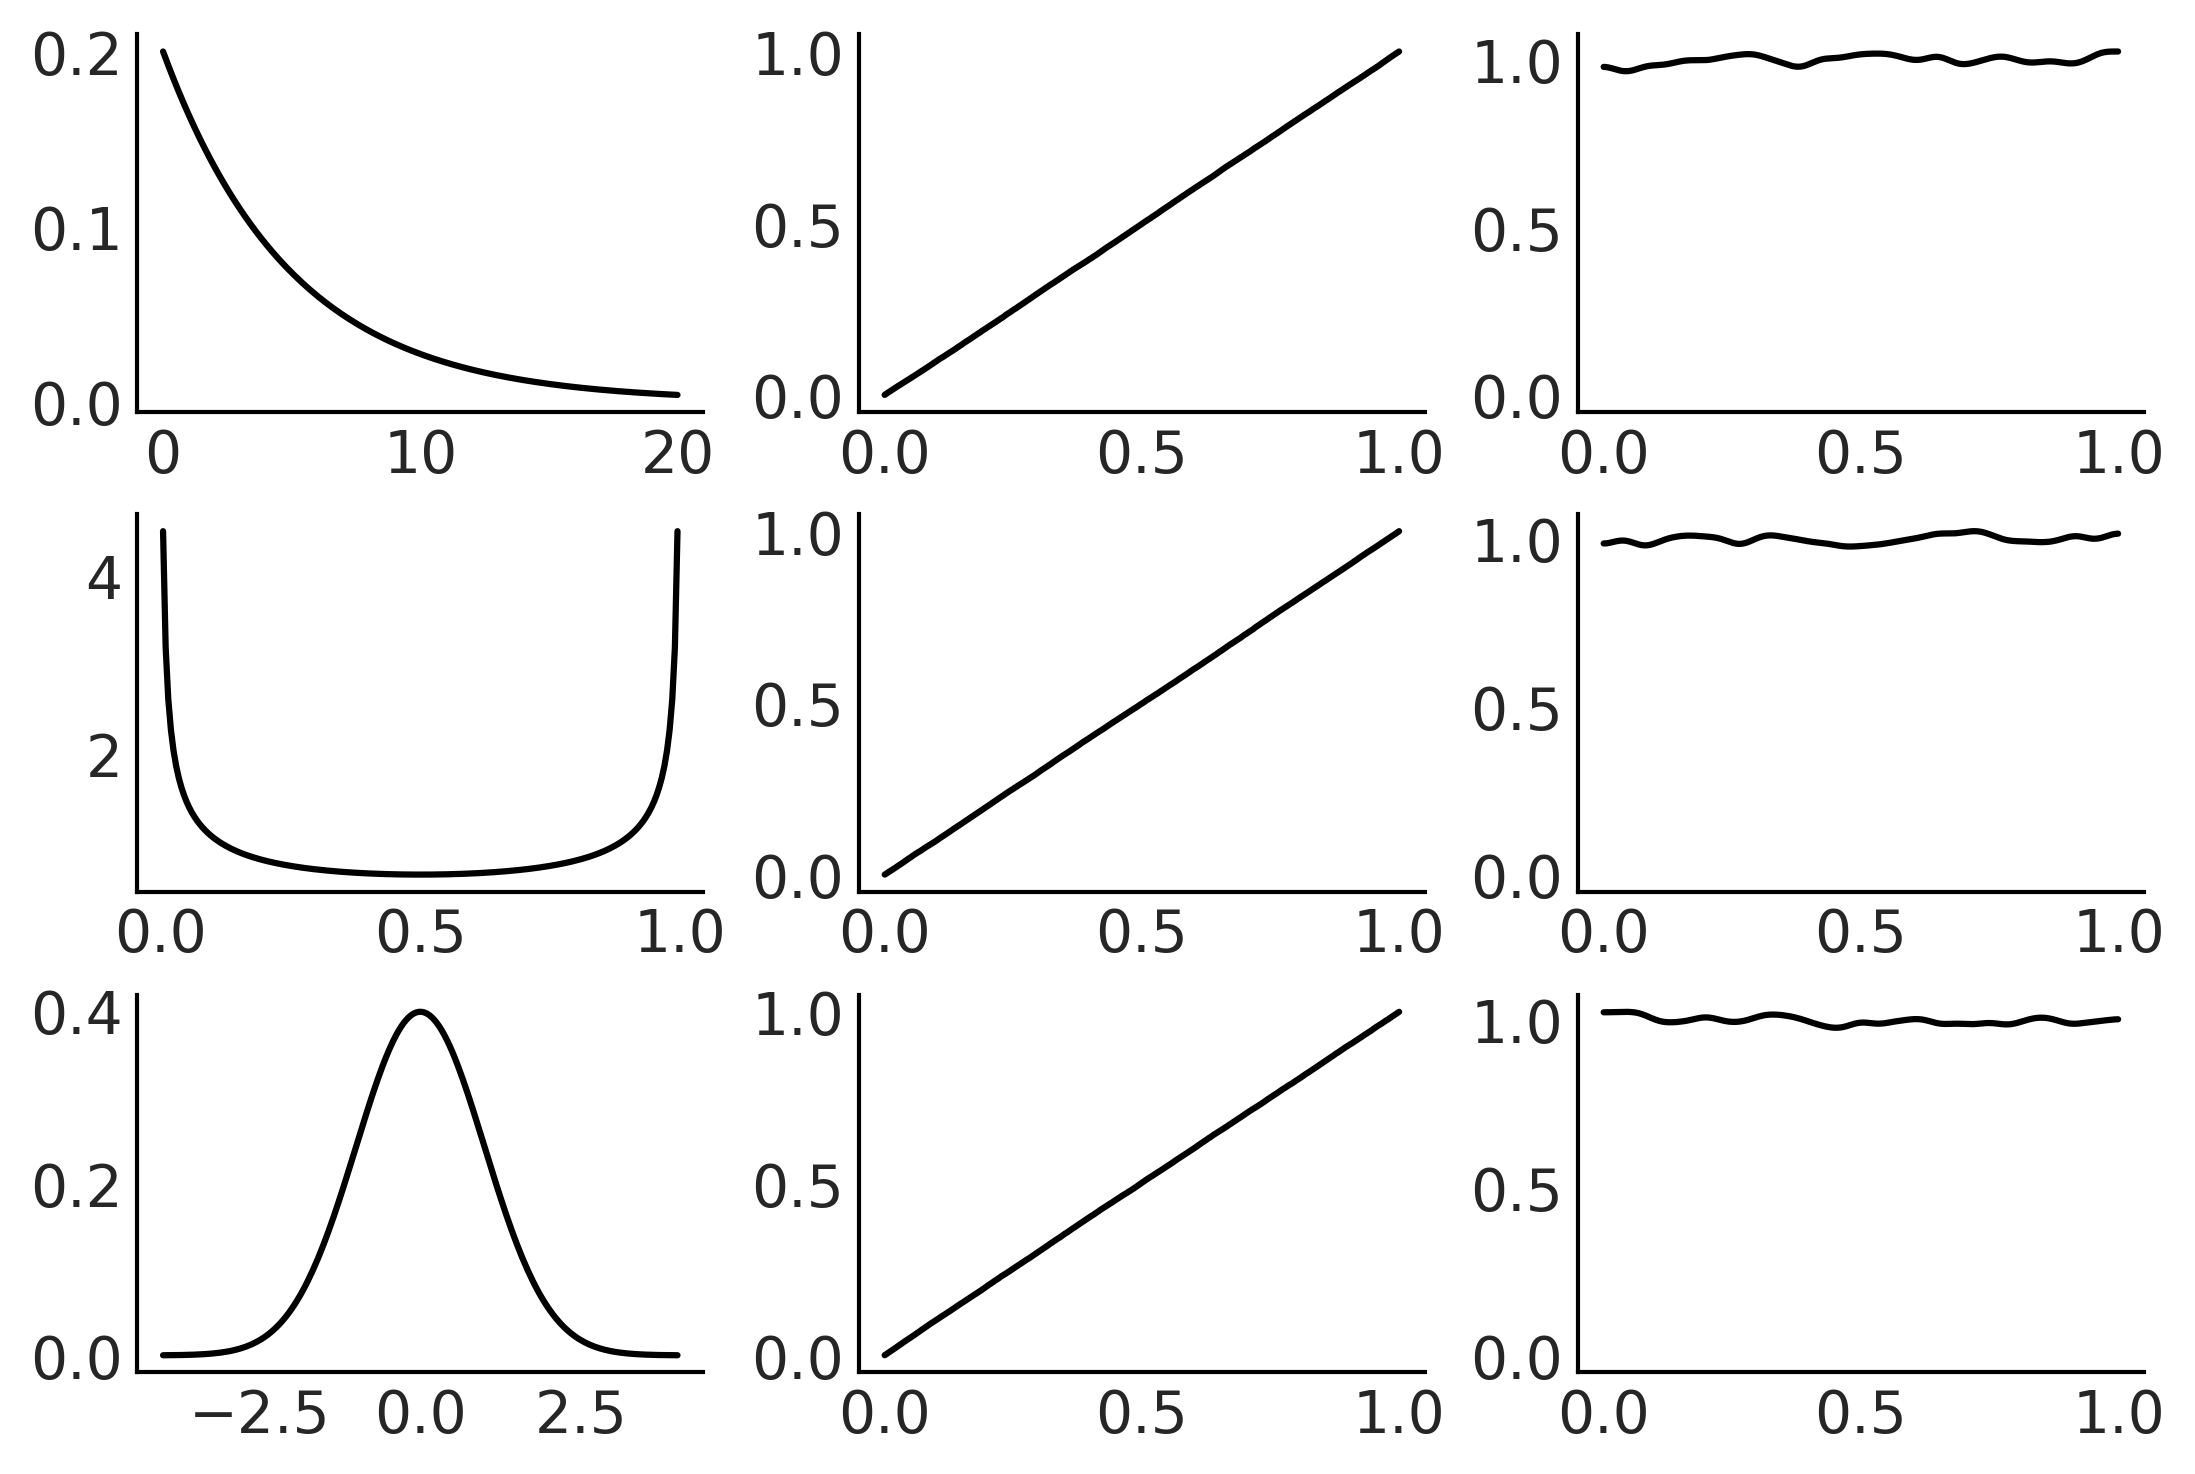

In [7]:
xs = (np.linspace(0, 20, 200), np.linspace(0, 1, 200), np.linspace(-4, 4, 200))
dists = (stats.expon(scale=5), stats.beta(0.5, 0.5), stats.norm(0, 1))


_, ax = plt.subplots(3, 3)

for idx, (dist, x) in enumerate(zip(dists, xs)):
    draws = dist.rvs(100000)
    data = dist.cdf(draws)
    # PDF original distribution
    ax[idx, 0].plot(x, dist.pdf(x))
    # Empirical CDF
    ax[idx, 1].plot(np.sort(data), np.linspace(0, 1, len(data)))
    # Kernel Density Estimation
    az.plot_kde(data, ax=ax[idx, 2])

(expectations)=

### 11.1.8. Expectations

The expectation is a single number summarizing the center of mass of a
distribution. For example, if $X$ is a discrete random variable, then we
can compute its expectation as:

```{math}
:label: eq:expectation
\mathbb{E}(X) = \sum_x x P(X = x)
```

As is often the case in statistics we want to also measure the spread,
or dispersion, of a distribution, for example, to represent uncertainty
around a point estimate like the mean. We can do this with the variance,
which itself is also an expectation:

```{math}
:label: eq:var_as_expectation
\mathbb{V}(X) = \mathbb{E}(X - \mathbb{E}X)^2 = \mathbb{E}(X^2 ) - (\mathbb{E}X)^2
```

The variance often appears *naturally* in many computations, but to
report results it is often more useful to take the square root of the
variance, called the standard deviation, as this will be in the same
units as the random variable.

Figures {numref}`fig:discrete_uniform_pmf_cdf`,
{numref}`fig:binomial_pmf_cdf`, {numref}`fig:poisson_pmf_cdf`,
{numref}`fig:uniform_pdf_cdf`, {numref}`fig:normal_pdf_cdf`,
{numref}`fig:student_t_pdf_cdf`, and {numref}`fig:beta_pdf_cdf` show the
expectation and the standard deviations for different distributions.
Notice that these are not values computed from samples but properties of
theoretical mathematical objects.

Expectation is linear, meaning that:

```{math}
:label: eq:expectation_linear
\mathbb{E}(cX) = c\mathbb{E}(X)
```

where $c$ is a constant and

```{math}
:label: eq:expectation_sums
\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y)
```

which are true even in the case that $X$ and $Y$ are dependent. Instead,
the variance is not linear:

```{math}
:label: eq:expectation_varc
\mathbb{V}(cX) = c^2\mathbb{V}(X)
```

and in general:

```{math}
:label: eq:expectation_ineq
\mathbb{V}(X + Y) \neq \mathbb{V}(X) + \mathbb{V}(Y)
```

except, for example, when $X$ and $Y$ are independent.

We denote the $n$th moment of a random variable $X$ is
$\mathbb{E}(X^n)$, thus the expected value and the variance are also
known as the first and second moments of a distribution. The third
moment, the skew, tells us about the asymmetry of a distribution. The
skewness of a random variable $X$ with mean $\mu$ and variance
$\sigma^2$ is the third (standardized moment) of $X$:

```{math}
:label: eq:skewness
\text{skew}(X) = \mathbb{E}\left(\frac{X -\mu}{\sigma}\right)^3
```

The reason to compute the skew as a standardized quantity, i.e. to
subtract the mean and divide by the standard deviation is to make the
skew independent of the localization and scale of $X$, this is
reasonable as we already have that information from the mean and
variance and also it will make the skewness independent of the units of
$X$, so it becomes easier to compare skewness.

For example, a $\text{Beta}(2, 2)$ has a 0 skew while for
$\text{Beta}(2, 5)$ the skew is positive and for $\text{Beta}(5, 2)$
negative. For unimodal distributions, a positive skew generally means
that the right tail is longer, and the opposite for a negative skew.
This is not always the case, the reason is that a 0 skew means that the
*total mass* at the tails on both sides is balanced. So we can also
balance the mass by having one long thin tail an another short and fat
tail.

The fourth moment, known as kurtosis, tells us about the behavior of the
tails or the *extreme values* {cite:p}`westfall2014`. It is defined as

```{math} 
:label: kurtosis
\text{Kurtosis}(X) = \mathbb{E}\left(\frac{X -\mu}{\sigma}\right)^4 - 3 

```

The reason to subtract 3 is to make the Gaussian have 0 kurtosis, as it
is often the case that kurtosis is discussed in comparison with the
Gaussian distribution, but sometimes it is often computed without the
$-3$, so when in doubt ask, or read, for the exact definition used in a
particular case. By examining the definition of kurtosis in Equation
{eq}`kurtosis` we can see that we are essentially computing the expected
value of the standardized data raised to the fourth power. Thus any
standardized values less than 1 contribute virtually nothing to the
kurtosis. Instead the only values that has something to contribute are
the *extreme* values.

As we increase increase the value of $\nu$ in a Student t distribution
the kurtosis decreases (it is zero for a Gaussain distribution) and the
kurtosis increases as we decrease $\nu$. The kurtosis is only defined
when $\nu > 4$, in fact for the Student T distribution the $n$th moment
is only defined for $\nu > n$.

The stats module of SciPy offers a method `stats(moments)` to compute
the moments of distributions as you can see in Code Block
[scipy_unif](scipy_unif) where it is used to obtain the
mean and variance. We notice that all we have discussed in this section
is about computing expectation and moments from probability
distributions and not from samples, thus we are talking about properties
of theoretical distributions. Of course in practice we usually want to
estimate the moments of a distribution from data and for that reason
statisticians have studies estimators, for example, the sample mean and
the sample median are estimators of $\mathbb{E}(X)$.

(transformations)=

### 11.1.9. Transformations

If we have a random variable $X$ and we apply a function $g$ to it we
obtain another random variable $Y = g(X)$. After doing so we may ask,
given that we know the distribution of $X$ how can we find out the
distribution of $Y$. One easy way of doing it, is by sampling from $X$
applying the transformation and then plotting the results. But of course
there are formals ways of doing it. One such way is applying the
**change of variables** technique.

If $X$ is a continuous random variable and $Y = g(X)$, where $g$ is a
differentiable and strictly increasing or decreasing function, the PDF
of $Y$ is:

```{math} 
:label: eq:changeofvariable
p_Y(y) = p_X(x) \left| \frac{dx}{dy} \right|

```

We can see this is true as follows. Let $g$ be strictly increasing, then
the CDF of $Y$ is:

```{math}
:label: eq:changeofvariable_proof0
\begin{split}
   F_Y(y) =& P(Y \le y) \\
          =& P(g(X) \le y) \\
          =& P(X \le g^{-1}(y)) \\
          =& F_X(g^{-1}(y)) \\
          =& F_X(x) \\
\end{split}
```

and then by the chain rule, the PDF of $Y$ can be computed from the PDF
of $X$ as:

```{math}
:label: eq:changeofvariable_proof1
p_Y(y) = p_X(x) \frac{dx}{dy}
```

The proof for $g$ strictly decreasing is similar but we end up with a
minus sign on the right hand term and thus the reason we compute the
absolute value in Equation {eq}`eq:changeofvariable`.

For multivariate random variables (i.e in higher dimensions) instead of
the derivative we need to compute the Jacobian determinant, and thus it
is common to refer the term $\left| \frac{dx}{dy} \right|$ as the
Jacobian even in the one dimensional case. The absolute value of the
Jacobian determinant at a point $p$ gives us the factor by which a
function $g$ expands or shrinks volumes near $p$. This interpretation of
the Jacobian is also applicable to probability densities. If the
transformation $g$ is not linear then the affected probability
distribution will shrink in some regions and expand in others. Thus we
need to properly take into account these deformations when computing $Y$
from the known PDF of $X$. Slightly rewriting Equation
{eq}`eq:changeofvariable` like below also helps:

```{math}
:label: eq:changeofvariable2
p_Y(y)dy = p_X(x)dx
```

As we can now see that the probability of finding $Y$ in a tiny interval
$p_Y(y)dy$ is equal to the probability of finding $X$ in a tiny interval
$p_X(x)dx$. So the Jacobian is telling us how we remap probabilities in
the space associated to $X$ with those associated with $Y$.

(limits)=

### 11.1.10. Limits

The two best known and most widely used theorems in probability are the
law of large numbers and the central limit theorem. They both tell us
what happens to the sample mean as the sample size increases. They can
both be understood in the context of repeated experiments, where the
outcome of the experiment could be viewed as a sample from some
underlying distribution.

(the-law-of-large-numbers)=

#### 11.1.10.1. The Law of Large Numbers

The law of large number tells us that the sample mean of an iid random
variable converges, as the number of samples increase, to the expected
value of the random variable. This is not true for some distributions
such as the Cauchy distribution (which has no mean or finite variance).

The law of large numbers is often misunderstood, leading to the
gambler's fallacy. An example of this paradox is believing that it is
smart to bet in the lottery on a number that has not appeared for a long
time. The erroneous reasoning here is that if a particular number has
not appeared for a while then there is must be some kind of force that
increases the probability of that number in the next draws. A force that
re-establish the equiprobability of the numbers and the *natural order*
of the universe.

```{figure} figures/law_of_large_numbers.png
:name: fig:law_of_large_numbers
:width: 8.00in
Running values from a $\mathcal{U}(0, 1)$ distribution. The dashed line
at 0.5 represent the expected value. As the number of draws increases,
the empirical mean approaches the expected value. Each line represents a
different sample.
```

(appendix_clt)=

#### 11.1.10.2. The Central Limit Theorem

The central limit theorem states that if we sample $n$ values
independently from an arbitrary distribution the mean $\bar X$ of those
values will distribute approximately as a Gaussian as
${n \rightarrow \infty}$:

```{math} 
:label: eq:central_limit
\bar X_n \dot \sim \mathcal{N} \left (\mu, \frac{\sigma^2} {n} \right)

```

where $\mu$ and $\sigma^2$ are the mean and variance of the arbitrary
distribution.

For the central limit theorem to be fulfilled, the following assumptions
must be met:

-   The values are sampled independently

-   Each value come from the same distribution

-   The mean and standard deviation of the distribution must be finite

Criteria 1 and 2 can be relaxed *quite a bit* and we will still get
roughly a Gaussian, but there is no way to escape from Criterion 3. For
distributions such as the Cauchy distribution, which do not have a
defined mean or variance, this theorem does not apply. The average of
$N$ values from a Cauchy distribution do not follow a Gaussian but a
Cauchy distribution.

The central limit theorem explains the prevalence of the Gaussian
distribution in nature. Many of the phenomena we study can be explained
as fluctuations around a mean, or as the result of the sum of many
different factors.

{numref}`fig:central_limit` shows the central limit theorem in action
for 3 different distributions, $\text{Pois}(2.3)$, $\mathcal{U}(0, 1)$,
$\text{Beta}(1, 10)$, as $n$ increases.

```{figure} figures/central_limit.png
:name: fig:central_limit
:width: 8.00in
Histograms of the distributions indicated on the left margin. Each
histogram is based on 1000 simulated values of $\bar{X_n}$. As we
increase $n$ the distribution of $\bar{X_n}$ approach a Normal
distribution. The black curve corresponds to a Gaussian distribution
according to the central limit theorem.
```

(markov_chains)=

### 11.1.11. Markov Chains

A Markov Chain is a sequence of random variables $X_0, X_1, \dots$ for
which the future state is conditionally independent from all past ones
given the current state. In other words, knowing the current state is
enough to know the probabilities for all future states. This is known as
the Markov property and we can write it as:

```{math} 
:label: markov_property
P(X_{n+1} = j \mid X_n = i, X_{n-1} = i_{n-1} , \dots, X_0 = i_0) = P(X_{n+1} = j \mid X_n = i)
    
```

A rather effective way to visualize Markov Chains is imagining you or
some object moving in space [^15]. The analogy is easier to grasp if the
space is finite, for example, moving a piece in a square board like
checkers or a salesperson visiting different cities. Given this
scenarios you can ask questions like, how likely is to visit one state
(specific squares in the board, cities, etc)? Or maybe more interesting
if we keep moving from state to state how much time will we spend at
each state in the long-run?

{numref}`fig:markov_chains_graph` shows four
examples of Markov Chains, the first one show a classical example, an
oversimplified weather model, where the states are rainy or sunny, the
second example shows a deterministic die. The last two example are more
abstract as we have not assigned any concrete representation to them.

```{figure} figures/markov_chains_graph.png
:name: fig:markov_chains_graph
:width: 8.00in
Markov Chains examples. (a) An oversimplified weather model, representing the probability of a rainy or sunny day, the arrows indicate the transition between states, the arrows are annotated with their corresponding transition probabilities. (b) An example of periodic Markov Chain. (c) An example of a disjoint chain. The states 1, 2, and 3 are disjoint from states A and B. If we start at the state 1, 2, or 3 we will never reach state A or B and vice versa. Transition probabilities are omitted in this example. (d) A Markov chain representing the gambler's ruin problem, two gamblers, A and B, start with $i$ and $N-i$ units of money respectively. At any given money they bet 1 unit, gambler A has probability $p$ of and probability $q = 1 - p$ of losing. If $X_n$ is the total money of gambler A at time $n$. Then $X_0, X_1, \dots$ is a Markov chain as the one represented.
```

A convenient way to study Markov Chains is to collect the probabilities
of moving between states in one step in a transition matrix
$\mathbf{T} = (t_{ij})$. For example, the transition matrix of example A
in {numref}`fig:markov_chains_graph` is

<!---
```{math} 
\begin{blockarray}{ccc}
\; & \text{sunny} & \text{rainy} \\
\begin{block}{c(cc)}
\text{sunny} & 0.9 & 0.1 \\
\text{rainy} & 0.8 & 0.2 \\
\end{block}
```
-->

```{math}
\begin{bmatrix}
0.9 & 0.1 \\
0.8 & 0.2
\end{bmatrix}
```

and, for example, the transition matrix of example B in
{numref}`fig:markov_chains_graph` is

<!---
```{math} 
\begin{blockarray}{ccccccc}
\; & 0 & 1 & 2 & 3 & 4 & 5\\
\begin{block}{c(cccccc)}
0 & 0 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 0 & 0 & 0\\
2 & 0 & 0 & 0 & 1 & 0 & 0\\
3 & 0 & 0 & 0 & 0 & 1 & 0\\
4 & 0 & 0 & 0 & 0 & 0 & 1\\
5 & 1 & 0 & 0 & 0 & 0 & 0\\
\end{block}
\end{blockarray}
```
-->

```{math}
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 \\
2 & 0 & 0 & 0 & 1 & 0 & 0 \\
3 & 0 & 0 & 0 & 0 & 1 & 0 \\
4 & 0 & 0 & 0 & 0 & 0 & 1 \\
5 & 1 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
```


The $i$th row of the transition matrix represents the conditional
probability distribution of moving from state $X_{n}$ to the state
$X_{n+1}$. That is, $p(X_{n+1} \mid X_n = i)$. For example, if we are at
state *sunny* we can move to *sunny* (i.e. stay at the same state) with
probability 0.9 and move to state *rainy* with probability 0.1. Notice
how the total probability of moving from *sunny* to somewhere is 1, as
expected for a PMF.

Because of the Markov property we can compute the probability of $n$
consecutive steps by taking the $n$th power of $\mathbf{T}$.

We can also specify the starting point of the Markov chain, i.e. the
initial conditions $s_i = P(X_0 = i)$ and let
$\mathbf{s}=(s_1, \dots, s_M)$. With this information we can compute the
marginal PMF of $X_n$ as $\mathbf{s}\mathbf{T}^n$.

When studying Markov chains it makes sense to define properties of
individual states and also properties on the entire chain. For example,
if a chain returns to a state over and over again we call that state
recurrent. Instead a transient state is one that the chain will
eventually leave forever, in example (d) in
{numref}`fig:markov_chains_graph` all states other
than 0 or $N$ are transient. Also, we can call a chain irreducible if it
is possible to get from any state to any other state in a finite number
of steps example (c) in
{numref}`fig:markov_chains_graph` is not
irreducible, as states 1,2 and 3 are disconnected from states A and B.

Understanding the long-term behavior of Markov chains is of interest. In
fact, they were introduced by Andrey Markov with the purpose of
demonstrating that the law of large numbers can be applied also to
non-independent random variables. The previously mentioned concepts of
recurrence and transience are important for understanding this long-term
run behavior. If we have a chain with transient and recurrent states,
the chain may spend time in the transient states, but it will eventually
spend all the eternity in the recurrent states. A natural question we
can ask is how much time the chain is going to be at each state. The
answer is provided by finding the **stationary distribution** of the
chain.

For a finite Markov chain, the stationary distribution $\mathbf{s}$ is a
PMF such that $\mathbf{s}\mathbf{T} = \mathbf{s}$ [^16]. That is a
distribution that is not changed by the transition matrix $\mathbf{T}$.
Notice that this does not mean the chain is not moving anymore, it means
that the chain moves in such a way that the time it will spend at each
state is the one defined by $\mathbf{s}$. Maybe a physical analogy could
helps here. Imagine we have a glass not completely filled with water at
a given temperature. If we seal it with a cover, the water molecules
will evaporate into the air as moisture. Interestingly it is also the
case that the water molecules in the air will move to the liquid water.
Initially more molecules might be going one way or another, but at a
given point the system will find a dynamic equilibrium, with the same
amount of water molecules moving to the air from the liquid water, as
the number of water molecules moving from the liquid water to the air.
In physics/chemistry this is called a steady-state, locally things are
moving, but globally nothing changes [^17]. Steady state is also an
alternative name to stationary distribution.

Interestingly, under various conditions, the stationary distribution of
a finite Markov chain exists and is unique, and the PMF of $X_n$
converges to $\mathbf{s}$ as $n \to \infty$. Example (d) in
{numref}`fig:markov_chains_graph` does not have a
unique stationary distribution. We notice that once this chain reaches
the states 0 or $N$, meaning gambler A or B lost all the money, the
chain stays in that state forever, so both $s_0=(1, 0, \dots , 0)$ and
$s_N=(0, 0, \dots , 1)$ are both stationary distributions. On the
contrary example B in
{numref}`fig:markov_chains_graph` has a unique
stationary distribution which is $s=(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)$,
event thought the transition is deterministic.

If a PMF $\mathbf{s}$ satisfies the reversibility condition (also known
as detailed balance), that is $s_i t_{ij} = s_j t_{ji}$ for all $i$ and
$j$, we have the guarantee that $\mathbf{s}$ is a stationary
distribution of the Markov chain with transition matrix
$\mathbf{T} = t_{ij}$. Such Markov chains are called reversible. In Section
{ref}`inference_methods` we will use this property to show why
Metropolis-Hastings is guaranteed to, asymptotically, work.

Markov chains satisfy a central limit theorem which is similar to
Equation {eq}`eq:central_limit` except that instead of dividing by $n$
we need to divide by the effective sample size (ESS). In Section {ref}`ess`
we discussed how to estimate the effective sample size from a Markov
Chain and how to use it to diagnose the quality of the chain. The square
root of $\frac{\sigma^2} {\text{ESS}}$ is the Monte Carlo standard error
(MCSE) that we also discussed in Section {ref}`Monte_Carlo_standard_error`

[^15]: See, for example, <https://www.youtube.com/watch?v=i5oND7rHtFs>

[^16]: For those familiar with eigenvectors and eigenvalues this should
    ring a bell.

[^17]: Another analogy comes from politics, when politicians/government
    changes but pressing issues like inequality or climate change are
    not properly addressed.

(entropy)=

## 11.2. Entropy

In the *Zentralfriedhof*, Vienna, we can find the grave of Ludwig
Boltzmann. His tombstone has the legend $S = k \log W$, which is a
beautiful way of saying that the second law of thermodynamics is a
consequence of the laws of probability. With this equation Boltzmann
contributed to the development of one of the pillars of modern physics,
statistical mechanics. Statistical mechanics describes how macroscopic
observations such as temperature are related to the microscopic world of
molecules. Imagine a glass with water, what we perceive with our senses
is basically the average behavior of a huge number water molecules
inside that glass [^18]. At a given temperature there is a given number
of arrangements of the water molecules compatible with that temperature
(Figure {numref}`fig:entropy_T`). As we decrease the temperature we will
find that less and less arrangements are possible until we find a single
one. We have just reached 0 Kelvin, the lowest possible temperature in
the universe! If we move into the other direction we will find that
molecules can be found in more and more arrangements.

```{figure} figures/entropy_T.png
:name: fig:entropy_T
:width: 7.00in
The number of possible arrangements particles can take is related to the
temperature of the system. Here we represent discrete system of 3
equivalent particles, the number of possible arrangements is represented
by the available cells (gray high lines). increasing the temperature is
equivalent to increasing the number of available cells. At $T=0$ only
one arrangement is possible, as the temperature increase the particles
can occupy more and more states.
```

We can analyze this mental experiment in terms of uncertainty. If we
know a system is at 0 Kelvin we know the system can only be in a single
possible arrangement, our certainty is absolute [^19], as we increase
the temperature the number of possible arrangements will increase and
then it will become more and more difficult to say, "Hey look! Water
molecules are in this particular arrangement at this particular time!\"
Thus our uncertainty about the microscopic state will increase. We will
still be able to characterize the system by averages such the
temperature, volume, etc, but at the microscopic level the certainty
about particular arrangements will decrease. Thus, we can think of
entropy as a way of measuring uncertainty.

The concept of entropy is not only valid for molecules. It could also be
applies to arrangements of pixels, characters in a text, musical notes,
socks, bubbles in a sourdough bread and more. The reason that entropy is
so flexible is because it quantifies the arrangements of objects - it is
a property of the underlying distributions. The larger the entropy of a
distribution the less informative that distribution will be and the more
evenly it will assign probabilities to its events. Getting an answer of
"$42$\" is more certain than "$42 \pm 5$\", which again more certain
than "any real number\". Entropy can translate this qualitative
observation into numbers.

The concept of entropy applies to continue and discrete distributions,
but it is easier to think about it using discrete states and we will see
some example in the rest of this section. But keep in mind the same
concepts apply to the continuous cases.

For a probability distribution $p$ with $n$ possible different events
which each possible event $i$ having probability $p_i$, the entropy is
defined as:

```{math} 
:label: eq:entropy
H(p) = - \mathbb{E}[\log{p}] = -\sum_{i}^n p_i \log{p_i}

```

Equation {eq}`eq:entropy` is just a different way of writing the entropy
engraved on Boltzmann's tombstone. We annotate entropy using $H$ instead
of $S$ and set $k=1$. Notice that the multiplicity $W$ from Boltzmann's
version is the total number of ways in which different outcomes can
possibly occur:

```{math}
:label: eq:degeneracy
W = \frac{N!}{n_1!n_2! \cdots n_t!}
```

You can think of this as rolling a t-sided die $N$ times, where $n_i$ is
the number of times we obtain side $i$. As $N$ is large we can use
Stirling's approximation $x! \approx (\frac{x}{e})^x$.

```{math}
:label: eq:Stirling0
W =  \frac{N^N}{n_1^{n_1} n_2^{n_2} \cdots n_t^{n_t}} e^{(n_1 n_2 \cdots n_t-N)}
```

noticing that $p_i = \frac{n_i}{N}$ we can write:

```{math}
:label: eq:p_as_frac
W = \frac{1}{p_1^{n_1} p_2^{n_2} \cdots p_t^{n_t}}
```

And finally by taking the logarithm we obtain

```{math}
:label: eq:entropy_W
\log W = -\sum_{i}^n p_i \log{p_i}
```

which is exactly the definition of entropy.

We will now show how to compute entropy in Python using Code Block
[entropy_dist](entropy_dist), with the result shown in
{numref}`fig:entropy`.

```{code-block} python
:name: entropy_dist
:caption: entropy_dist

x = range(0, 26)
q_pmf = stats.binom(10, 0.75).pmf(x)
qu_pmf = stats.randint(0, np.max(np.nonzero(q_pmf))+1).pmf(x)
r_pmf = (q_pmf + np.roll(q_pmf, 12)) / 2
ru_pmf = stats.randint(0, np.max(np.nonzero(r_pmf))+1).pmf(x)
s_pmf = (q_pmf + np.roll(q_pmf, 15)) / 2
su_pmf = (qu_pmf + np.roll(qu_pmf, 15)) / 2

_, ax = plt.subplots(3, 2, figsize=(12, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)

zipped = zip([q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf],
             ["q", "qu", "r", "ru", "s", "su"])
for idx, (dist, label) in enumerate(zipped):
    ax[idx].vlines(x, 0, dist, label=f"H = {stats.entropy(dist):.2f}")
    ax[idx].set_title(label)
    ax[idx].legend(loc=1, handlelength=0)
```

```{figure} figures/entropy.png
:name: fig:entropy
:width: 8.00in
Discrete distributions defined in Code Block
[entropy_dist](entropy_dist) and their entropy values $H$.
```

[^18]: To be precise we should include the molecules of glass and the
    molecules in the air, and\... but let just focus on the water.

[^19]: Do not let that Heisenberg guy and his uncertainty principle
    spoil the party

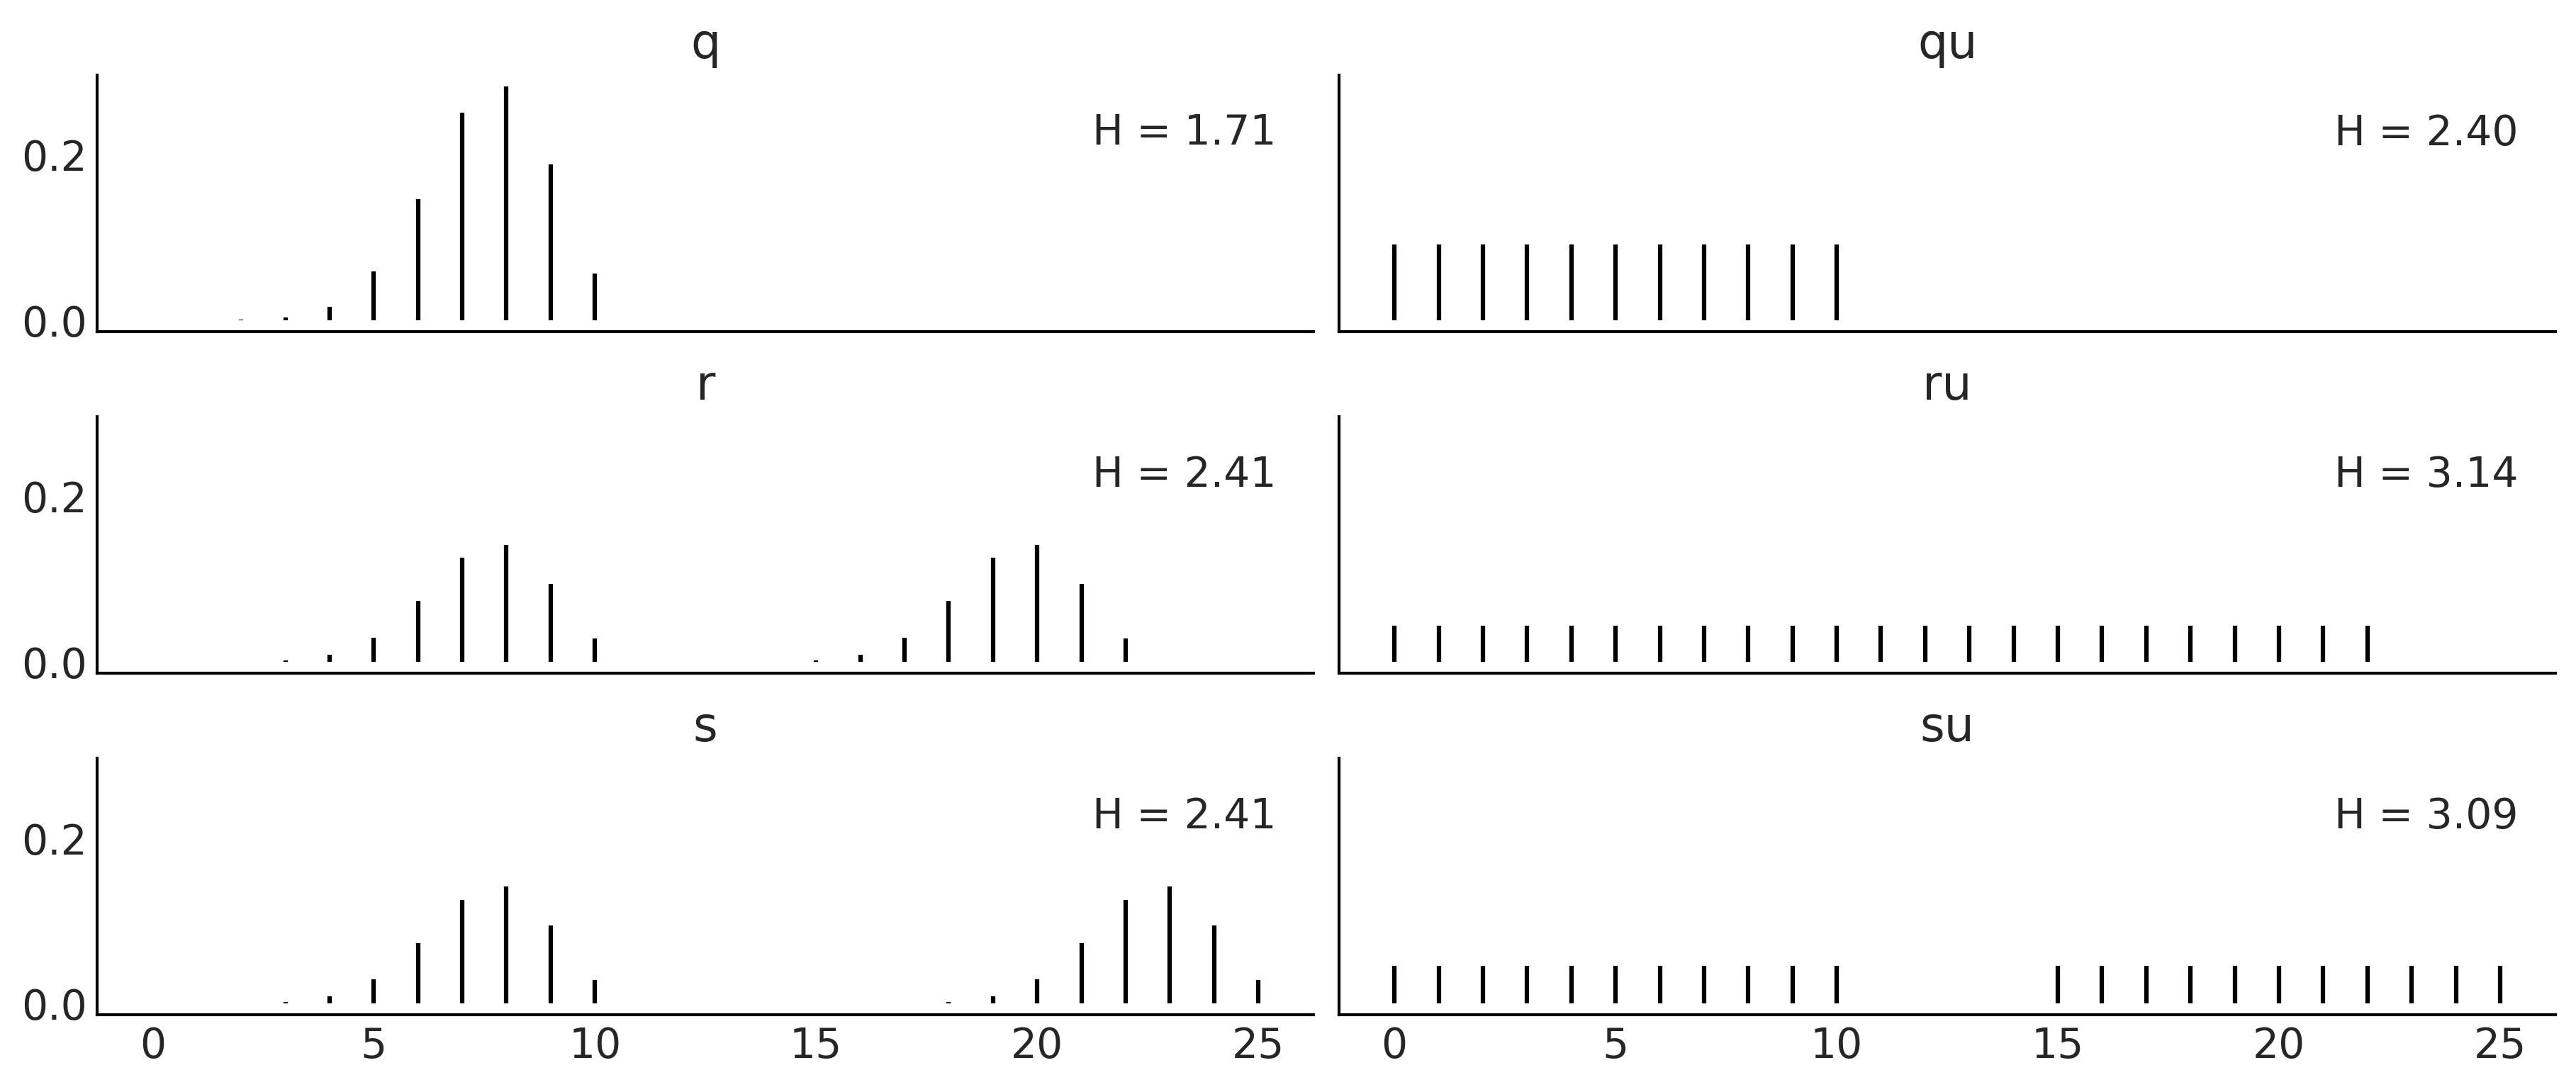

In [8]:
x = range(0, 26)
q_pmf = stats.binom(10, 0.75).pmf(x)
qu_pmf = stats.randint(0, np.max(np.nonzero(q_pmf))+1).pmf(x)
r_pmf = (q_pmf + np.roll(q_pmf, 12)) / 2
ru_pmf = stats.randint(0, np.max(np.nonzero(r_pmf))+1).pmf(x)
s_pmf = (q_pmf + np.roll(q_pmf, 15)) / 2
su_pmf = (qu_pmf + np.roll(qu_pmf, 15)) / 2

_, ax = plt.subplots(3, 2, figsize=(12, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)

zipped = zip([q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf],
             ["q", "qu", "r", "ru", "s", "su"])
for idx, (dist, label) in enumerate(zipped):
    ax[idx].vlines(x, 0, dist, label=f"H = {stats.entropy(dist):.2f}")
    ax[idx].set_title(label)
    ax[idx].legend(loc=1, handlelength=0)

plt.savefig('img/chp11/entropy.png')

{numref}`fig:entropy` shows six distributions, one per subplot with its
corresponding entropy. There are a lot of things moving on in this
figure, so before diving in be sure to set aside an adequate amount of
time (this maybe a good time to check your e-mails before going on). The
most peaked, or least spread distribution is $q$, and this is the
distribution with the lowest value of entropy among the six plotted
distributions. $q \sim \text{binom}({n=10, p=0.75})$, and thus there are
11 possible events. $qu$ is a Uniform distribution with also 11 possible
events. We can see that the entropy of $qu$ is larger than $q$, in fact
we can compute the entropy for binomial distributions with $n=10$ and
different values of $p$ and we will see that none of them have larger
entropy than $qu$. We will need to increase $n$ $\approx 3$ times to
find *the first* binomial distribution with larger entropy than $qu$.
Let us move to the next row. We generate distribution $r$ by taking $q$
and *shifting* it to the right and then normalizing (to ensure the sum
of all probabilities is 1). As $r$ is more spread than $q$ its entropy
is larger. $ru$ is the Uniform distribution with the same number of
possible events as $r$ (22), notice we are including as possible values
those *in the valley between both peaks*. Once again the entropy of the
*Uniform* version is the one with the largest entropy. So far entropy
seems to be proportional to the variance of a distribution, but before
jumping to conclusions let us check the last two distributions in
{numref}`fig:entropy`. $s$ is essentially the same as $r$ but with a
more extensive *valley between both peaks* and as we can see the entropy
remains the same. The reason is basically that entropy does not care
about those events in the *valley* with probability zero, it only cares
about possible events. $su$ is constructed by replacing the two peaks in
$s$ with $qu$ (and normalizing). We can see that $su$ has lower entropy
than $ru$ even when it looks more spread, after a more careful
inspection we can see that $su$ spread the total probability between
fewer events (22) than $ru$ (with 23 events), and thus it makes totally
sense for it to have lower entropy.

(DKL)=

## 11.3. Kullback-Leibler Divergence

It is common in statistics to use one probability distribution $q$ to
represent another one $p$, we generally do this when we do not know $p$
but can approximate it with $q$. Or maybe $p$ is complex and we want to
find a simpler or more convenient distribution $q$. In such cases we may
ask how much information are we losing by using $q$ to represent $p$, or
equivalently how much extra uncertainty are we introducing. Intuitively,
we want a quantity that becomes zero only when $q$ is equal to $p$ and
be a positive value otherwise. Following the definition of entropy in
Equation [eq:entropy](eq:entropy), we can achieve this by computing the
expected value of the difference between $\log(p)$ and $\log(q)$. This
is known as the Kullback-Leibler (KL) divergence:

```{math} 
:label: eq:kl_divergence
\mathbb{KL}(p \parallel q) = \mathbb{E}_p[\log{p}-\log{q}]
    
```

Thus the $\mathbb{KL}(p \parallel q)$ give us the average difference in
log probabilities when using $q$ to approximate $p$. Because the events
appears to us according to $p$ we need to compute the expectation with
respect to $p$. For discrete distributions we have:

```{math}
:label: eq:kl_divergence_discrete
\mathbb{KL}(p \parallel q) = \sum_{i}^n p_i (\log{p_i} - \log{q_i})
```

Using logarithmic properties we can write this into probably the most
common way to represent KL divergence:

```{math}
:label: eq:kl_divergence_log
\mathbb{KL}(p \parallel q)  = \sum_{i}^n p_i \log{\frac{p_i}{q_i}}
```

We can also arrange the term and write the $\mathbb{KL}(p \parallel q)$
as:

```{math}
:label: eq:kl_divergence_log_dif
\mathbb{KL}(p \parallel q) = - \sum_{i}^n p_i (\log{q_i} - \log{p_i})
```

and when we expand the above rearrangement we find that:

```{math}
:label: eq:kl_divergence_cross_entropy
\mathbb{KL}(p \parallel q) =  \overbrace{-\sum_{i}^n p_i \log{q_i}}^{H(p, q)} -  \overbrace{\left(-\sum_{i}^n p_i \log{p_i}\right)}^{H(p)}
```

As we already saw in previous section, $H(p)$ is the entropy of $p$.
$H(p,q) = - \mathbb{E}_p[\log{q}]$ is like the entropy of $q$ but
evaluated according to the values of $p$.

Reordering above we obtain:

```{math}
:label: eq:cross_entropy
H(p, q) = H(p) + D_\text{KL}(p \parallel q)
```

This shows that the KL divergences can be effectively interpreted as the
extra entropy with respect to $H(p)$, when using $q$ to represent $p$.

To gain a little bit of intuition we are going to compute a few values
for the KL divergence and plot them., We are going to use the same
distributions as in {numref}`fig:entropy`.


```{code-block} python
:name: kl_varies_dist
:caption: kl_varies_dist

dists = [q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf]
names = ["q", "qu", "r", "ru", "s", "su"]

fig, ax = plt.subplots()
KL_matrix = np.zeros((6, 6))
for i, dist_i in enumerate(dists):
    for j, dist_j in enumerate(dists):
        KL_matrix[i, j] = stats.entropy(dist_i, dist_j)

im = ax.imshow(KL_matrix, cmap="cet_gray")
```

The result of Code Block [kl_varies_dist](kl_varies_dist)
is shown in {numref}`fig:KL_heatmap`. There are two features of
{numref}`fig:KL_heatmap` that immediately pop out. First, the figure is
not symmetric, the reason is that $\mathbb{KL}(p \parallel q)$ is not
necessarily the same as $\mathbb{KL}(q \parallel p)$. Second, we have
many white cells. They represent $\infty$ values. The definition of the
KL divergence uses the following conventions {cite:p}`Cover_Thomas`:

```{math}
:label: eq:kl_divergence_conventions
0 \log \frac{0}{0} = 0, \quad
0 \log \frac{0}{q(\boldsymbol{x})} = 0, \quad
p(\boldsymbol{x}) \log \frac{p(\boldsymbol{x})}{0} = \infty
```

```{figure} figures/KL_heatmap.png
:name: fig:KL_heatmap
:width: 8.00in
KL divergence for all the pairwise combinations of the distributions q,
qu, r, ru, s, and su shown in {numref}`fig:entropy`, the white color is
used to represent infinity values.
```

/tmp/ipykernel_321270/3750536694.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap()


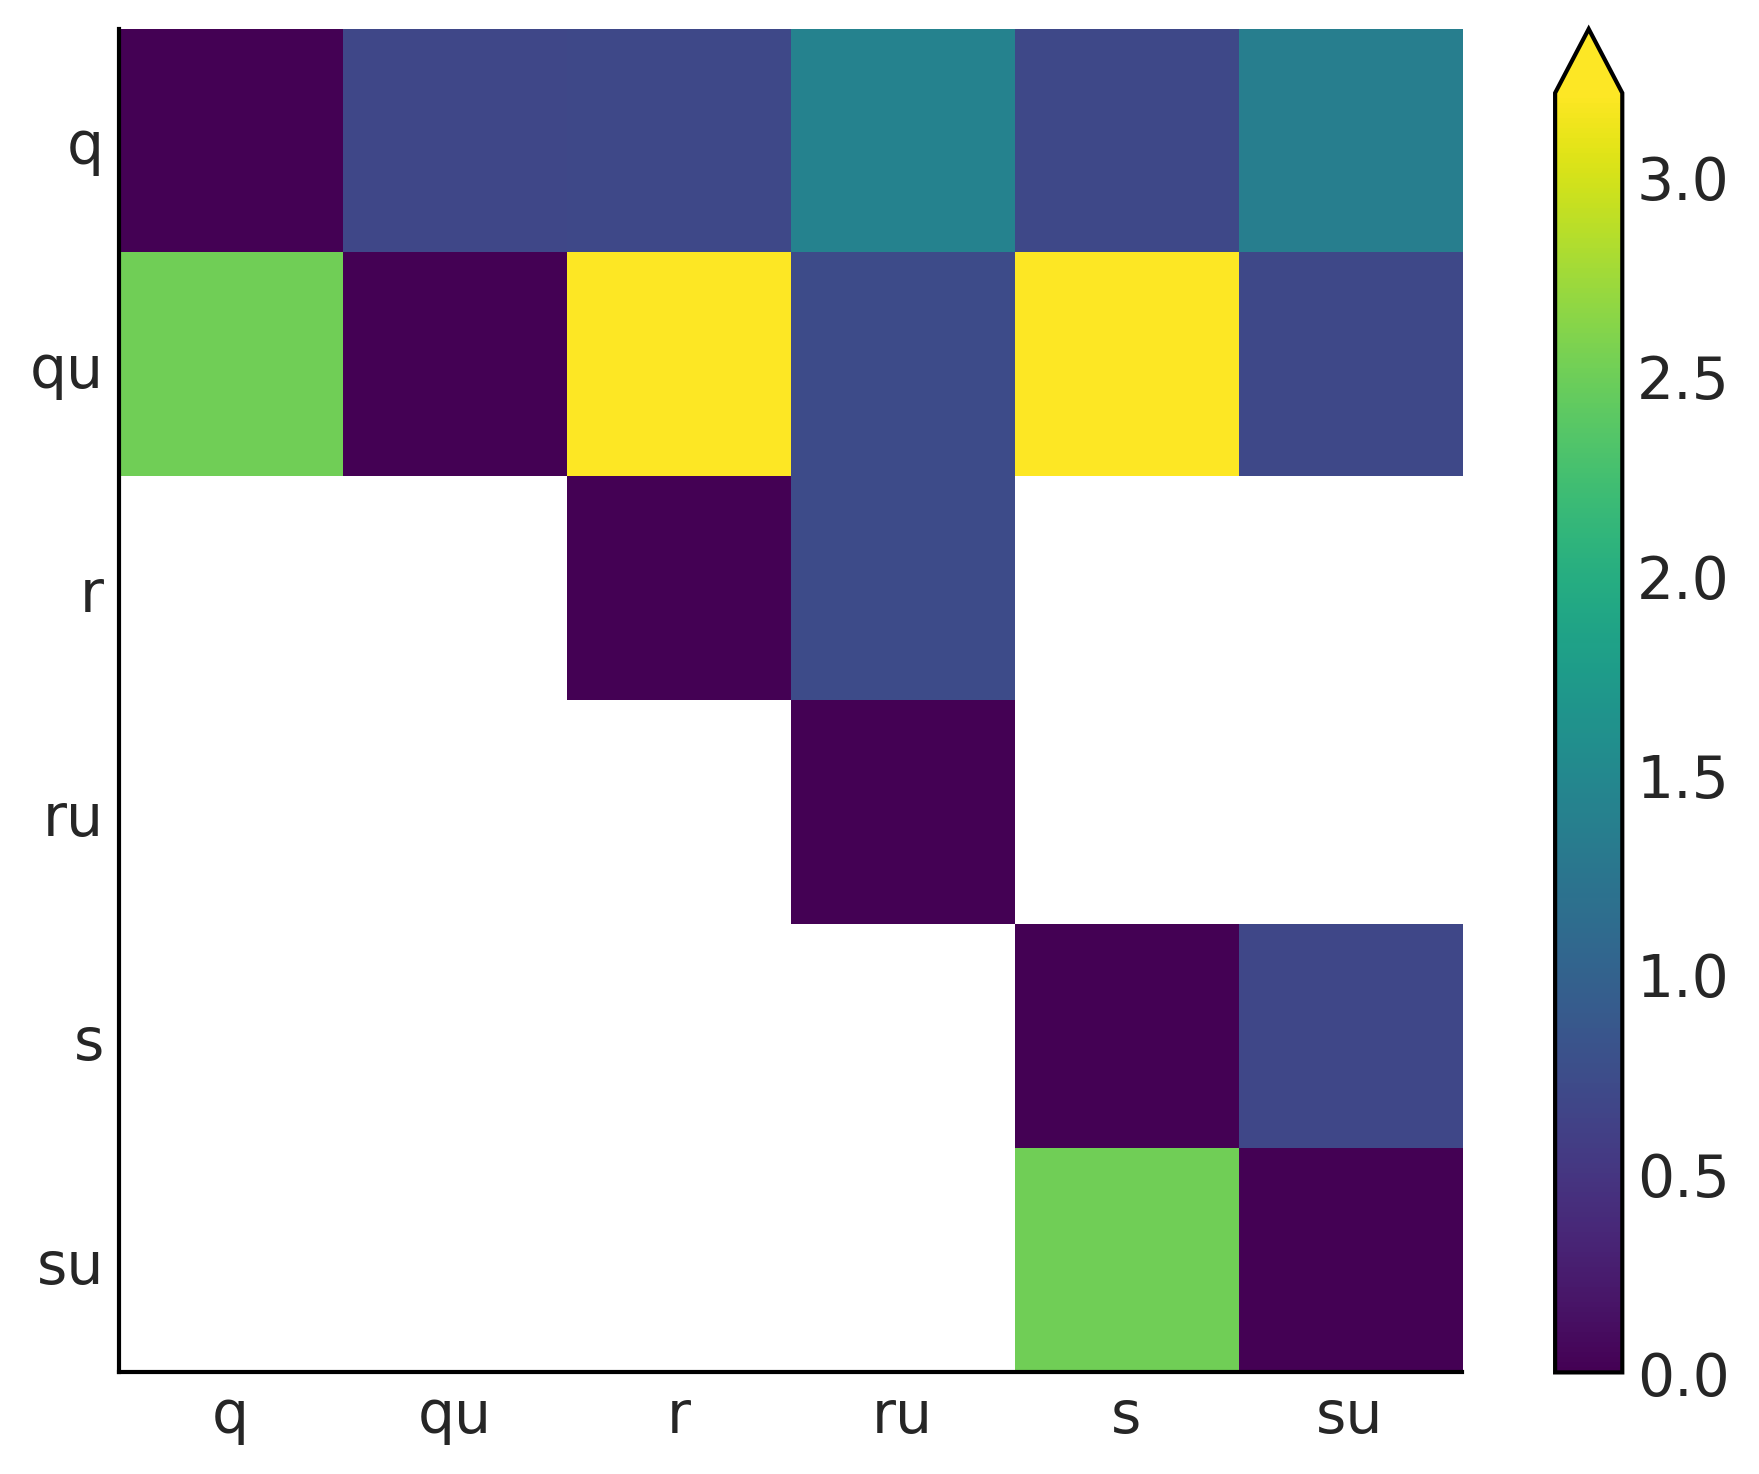

In [9]:
dists = [q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf]
names = ["q", "qu", "r", "ru", "s", "su"]

fig, ax = plt.subplots()
KL_matrix = np.zeros((6, 6))
for i, dist_i in enumerate(dists):
    for j, dist_j in enumerate(dists):
        KL_matrix[i, j] = stats.entropy(dist_i, dist_j)

ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.set_cmap("viridis")
cmap = plt.cm.get_cmap()
cmap.set_bad('w', 0.3)
im = ax.imshow(KL_matrix)
fig.colorbar(im, extend="max");

plt.savefig("img/chp11/KL_heatmap.png")

We can motivate the use of a log-score in computing expected log
pointwise predictive density (introduced in Chapter
[2](chap1bis) Equation
[eq:elpd_practice](eq:elpd_practice)) based on the KL divergence.
Let us assume we have $k$ models posteriors
$\{q_{M_1}, q_{M_2}, \cdots q_{M_k}\}$, let further assume we know the
*true* model $M_0$ then we can compute:

```{math}
:label: eq:kl_divergence_log_score
\begin{split}
        \mathbb{KL}(p_{M_0} \parallel q_{M_1}) =&\; \mathbb{E}[\log{p_{M_0}}] - \mathbb{E}[\log{q_{M_1}}] \\
        \mathbb{KL}(p_{M_0} \parallel q_{M_2}) =&\; \mathbb{E}[\log{p_{M_0}}] - \mathbb{E}[\log{q_{M_2}}] \\
        &\cdots \\
        \mathbb{KL}(p_{M_0} \parallel q_{M_k}) =&\; \mathbb{E}[\log{p_{M_0}}] - \mathbb{E}[\log{q_{M_k}}]
    \end{split}
```

This may seems a futile exercise as in real life we do not know the true
model $M_0$. The trick is to realize that as $p_{M_0}$ is the same for
all comparisons, thus building a ranking based on the KL-divergence is
equivalent to doing one based on the log-score.

(information_criterion)=

## 11.4. Information Criterion

An information criterion is a measure of the predictive accuracy of a
statistical model. It takes into account how well the model fits the
data and penalizes the complexity of the model. There are many different
information criterion based on how they compute these two terms. The
most famous family member, especially for non-Bayesians, is the Akaike
Information Criterion (AIC) {cite:p}`akaike_1973`. It is defined as the sum of
two terms. The $\log p(y_i \mid \hat{\theta}_{mle})$ measures how well
the model fits the data and the penalization term $p_{AIC}$ to account
for the fact that we use the same data to fit the model and to evaluate
the model.

```{math}
:label: eq:aic
AIC = -2 \sum_{i}^{n} \log p(y_i \mid \hat{\theta}_{mle}) + 2 p_{AIC}
```

where $\hat{\theta}_{mle}$ is the maximum-likelihood estimation of
$\boldsymbol{\theta}$ and $p_{AIC}$ is just the number of parameters in
the model.

AIC is quite popular in non-Bayesian settings, but is not well equipped
to deal with the generality of Bayesian models. It does not use the full
posterior distribution, thus discarding potentially useful information.
On average, AIC will behave worse and worse as we move from flat prior
into weakly-informative or informative priors, and/or if we add more
structure into our model, like with hierarchical models. AIC assumes
that the posterior can be well represented (at least asymptotically) by
a Gaussian distribution, but this is not true for a number of models,
including hierarchical models, mixture models, neural networks, etc. In
summary we want to use some better alternatives.

The Widely applicable Information Crieria (WAIC [^20])
{cite:p}`watanabe2010asymptotic` can be regarded as a fully Bayesian extension
of AIC. It also contains two terms, roughly with the same interpretation
as the Akaike criterion. The most important difference is that the terms
are computed using the full posterior distribution.

```{math} 
:label: eq:waic
WAIC =  \sum_i^n \log \left(\frac{1}{s} \sum_{j}^S p(y_i \mid \boldsymbol{\theta}^j) \right) \; - \sum_i^n  \left(\mathop{\mathbb{V}}_{j}^s \log p(Y_i \mid \boldsymbol{\theta}^j) \right)
    
```

The first term in Equation {eq}`eq:waic` is just the log-likelihood as
in AIC but evaluated pointwise, i.e, at each $i$ observed data-point
over the $n$ observations. We are taking into account the uncertainty in
the posterior by taking the average over the $s$ samples from the
posterior. This first term is a practical way to compute the theoretical
expected log pointwise predictive density (ELPD) as defined in Equation
[eq:elpd](eq:elpd) and its approximation in Equation
[eq:elpd_practice](eq:elpd_practice).

The second term might look a little bit weird, as is the variance over
the $s$ posterior samples (per observation). Intuitively, we can see
that for each observation the variance will be low if the log-likelihood
across the posterior distribution is similar and it will be larger if
the log-likelihood varies more for different samples from the posterior
distribution. The more observations we find to be sensitive to the
*details* of the posterior the larger the penalization will be. We can
also see this from another equivalent perspective; A more flexible model
is one that can effectively accommodate more datasets. For example, a
model that included straight but also upward curves is more flexible
than one that only allows straight lines; and thus the log-likelihood of
those observation evaluated across the posterior on the later model will
have, on average, a higher variance. If the more flexible model is not
able to compensate this penalization with a higher estimated ELPD then
the simpler model will we ranked as a better choice. Thus the variance
term in Equation {eq}`eq:waic` prevents overfitting by penalizing an
overly complex model and it can be loosely interpreted as the effective
number of parameters as in AIC.

Neither AIC nor WAIC are attempting to measure whether the model is
*true*, they are only a relative measure to compare alternative models.
From a Bayesian perspective the prior is part of the model, but WAIC is
evaluated over the posterior, and the prior effect is only indirectly
taken into account by the way it affects the resulting posterior. There
are other information criteria like BIC and WBIC that attempts to answer
that question and can be seen as approximations to the Marginal
Likelihood, but we do not discuss them in this book.

[^20]: Generally pronounced as W-A-I-C, even when something like
    wæ[i]{.smallcaps}k is less of a mouthful

(loo_depth)=

## 11.5. LOO in Depth

As discussed in Section {ref}`CV_and_LOO` in this book we use the
term LOO to refer to a particular method to approximate Leave-One-Out
Cross-Validation (LOO-CV) known as Pareto Smooth Importance Sampling
Leave Once Out Cross Validation (PSIS-LOO-CV). In this section we are
going to discuss a few details of this method.

LOO is an alternative to WAIC, in fact it can be shown that
asymptotically they converge to the same numerical value
{cite:p}`watanabe2010asymptotic, vehtari_practical_2017`. Nevertheless, LOO
presents two importance advantages for practitioners. It is more robust
in finite samples settings, and it provides useful diagnostics during
computation {cite:p}`vehtari_practical_2017, gabry_visualization_2017`.

Under LOO-CV the expected log pointwise predictive density for a new
dataset is:

```{math}
\text{ELPD}_\text{LOO-CV} = \sum_{i=1}^{n} \log
    \int \ p(y_i \mid \boldsymbol{\theta}) \; p(\boldsymbol{\theta} \mid y_{-i}) d\boldsymbol{\theta}

```

where $y_{-i}$ represents the dataset excluding the $i$ observation.

Given that in practice we do not know the value of $\boldsymbol{\theta}$
we can approximate Equation $\ref{eq:elpd_loo_cv}$ using $s$ samples
from the posterior:

```{math} 
:label: eq:loo_cv_naive
\sum_{i}^{n} \log
    \left(\frac{1}{s}\sum_j^s \ p(y_i \mid \boldsymbol{\theta_{-i}^j}) \right)
    
```

Notice that this term looks similar to the first term in Equation
{eq}`eq:waic`, except we are computing $n$ posteriors removing one
observation each time. For this reason, and contrary to WAIC, we do not
need to add a penalization term. Computing $\text{ELPD}_\text{LOO-CV}$
in {eq}`eq:loo_cv_naive` is very costly as we need to compute $n$
posteriors. Fortunately if the $n$ observations are conditionally
independent we can approximate Equation {eq}`eq:loo_cv_naive` with
Equation {eq}`eq:loo` {cite:p}`gilks1995markov, vehtari_practical_2017`:

```{math} 
:label: eq:loo
\text{ELPD}_{psis-loo} = \sum_i^n \log \sum_j^s w_i^j p(y_i \mid \boldsymbol{\theta}^j)
    
```

where $w$ is a vector of normalized weights.

To compute $w$ we used importance sampling, this is a technique for
estimating properties of a particular distribution $f$ of interest,
given that we only have samples from a different distribution $g$. Using
importance sampling makes sense when sampling from $g$ is easier than
sampling from $f$. If we have a set of samples from the random variable
$X$ and we are able to evaluate $g$ and $f$ pointwise, we can compute
the importance weights as:

```{math} 
:label: eq:importance_weights
w_i =  \frac{f(x_i)}{g(x_i)}

```

Computationally, it goes as follow:

-   Draw $N$ samples $x_i$ from $g$

-   Calculate the probability of each sample $g(x_i)$

-   Evaluate $f$ over the $N$ samples $f(x_i)$

-   Calculate the importance weights $w_i = \frac{f(x_i)}{g(x_i)}$

-   Return $N$ samples from $g$ with weights $w$, $(x_i, w_i)$, that
    could be plug into some estimator

{numref}`fig:importance_sampling` shows an example of approximating the
same target distribution (dashed line) by using two different proposal
distributions. On the first row the proposal is wider than the target
distribution. On the second row the proposal is narrower than the target
distribution. As we can see the approximation is better in the first
case. This is a general feature of importance sampling.

```{figure} figures/importance_sampling.png
:name: fig:importance_sampling
:width: 8.00in
Importance sampling. On the left we have KDEs of samples from the
proposal distributions $g$, on the right the dashed line represents the
target distribution and the continuous line the approximated
distribution after re-weighting the samples from the proposal
distribution with the weights computed as in Equation
{eq}`eq:importance_weights`.
```

Going back to LOO, the distribution that we have computed is the
posterior distribution. In order to evaluate the model we want samples
from the leave-one-out posterior distribution, thus the importance
weights we want to compute are:

```{math}
:label: eq:loocv_weights
w_i^j = \frac{p(\theta^j \mid y{-i} )}{p(\theta^j \mid y)} \propto \frac{1}{p(y_i \mid \theta^j)}
```

Notice that this proportionality is great news, because it allows us to
compute $w$ almost for free. However, the posterior is likely to have
thinner tails than the leave-one-out distributions, which as we saw in
{numref}`fig:importance_sampling` can result in poor estimation.
Mathematically the problem is that the importance weights can have high
or even infinite variance. In order to keep the variance in check, LOO
applies a smoothing procedure that involves replacing the largest
importance weights with values from an estimated Pareto distribution.
This help to make LOO much more robust {cite:p}`vehtari_practical_2017`.
Moreover, the estimated $\hat \kappa$ parameter of the Pareto
distribution can be used to detect highly influential observations, i.e.
observations that have a large effect on the predictive distribution
when they are left out. In general, higher values of $\hat \kappa$ can
indicate problems with the data or model, especially when
$\hat \kappa > 0.7$ {cite:p}`vehtari_pareto_2019, gabry_visualization_2017`.

(Jeffreys_prior_derivation)=

## 11.6. Jeffreys' Prior Derivation

In this section we will show how to find the Jeffreys' prior for the
binomial likelihood, first for the number of successes parameter
$\theta$, and then for the odds parameter $\kappa$, where
$\kappa = \frac{\theta}{1-\theta}$.

Recall from Chapter [1](chap1), for the one-dimensional case JP
for $\theta$ is defined as:

```{math}
p(\theta) \propto \sqrt{I(\theta)}
```

where $I(\theta)$ is the Fisher information:

```{math}
I(\theta) = - \mathbb{E_{Y}}\left[\frac{d^2}{d\theta^2} \log p(Y \mid \theta)\right]
```

(jeffreys-prior-for-the-binomial-likelihood-in-terms-of-theta)=

### 11.6.1. Jeffreys' Prior for the Binomial Likelihood in Terms of $\theta$

Binomial likelihood could be expressed as:

```{math} 
:label: eq:binomial_kernel
p(Y \mid \theta) \propto \theta^{y} (1-\theta)^{n-y}

```

where $y$ is the number of successes, $n$ the total number of trials,
and thus $n-y$ is the numbers of failures. We write is as a
proportionality as the Binomial coefficient in the likelihood does not
depend on $\theta$.

To compute the Fisher information we need to take the logarithm of the
likelihood:

```{math}
:label: eq:JP_0
\ell = \log(p(Y \mid \theta)) \propto y \log(\theta) + (n-y) \log(1-\theta)
```

And then compute the second derivative:

```{math}
:label: eq:JP_1
\begin{aligned}
\begin{split}
\frac{d \ell}{d\theta} &= \frac{y}{\theta} - \frac{n-y}{1-\theta} \\
\frac{d^{2} \ell}{d \theta^{2}} &= -\frac{y}{\theta^{2}} - \frac{n-y}{ (1-\theta)^{2}}
\end{split}\end{aligned}
```

The Fisher information is the expected value of the second derivative of
the likelihood, then:

```{math}
:label: eq:JP_2
I(\theta) = - \mathbb{E}_{Y}\left[-\frac{y}{\theta^{2}} + \frac{n-y}{ (1-\theta)^{2}} \right]
```

As $\mathbb{E}[y] = n\theta$, we can write:

```{math}
:label: eq:JP_3
I(\theta)= \frac{n\theta}{\theta^{2}} - \frac{n - n \theta}{(1-\theta)^{2}}
```

which we can rewrite as:

```{math}
:label: eq:JP_4
I(\theta)= \frac{n}{\theta} - \frac{n (1 -\theta)}{(1-\theta)^{2}} = \frac{n}{\theta} - \frac{n}{(1-\theta)}
```

We can express these fractions in terms of a common denominator,

```{math}
:label: eq:JP_5
I(\theta)= n \left[ \frac{1 - \theta}{\theta (1 - \theta)} - \frac{\theta}{\theta (1-\theta)}\right]
```

By regrouping:

```{math}
:label: eq:JP_6
I(\theta) = n \frac{1}{\theta (1-\theta)}
```

If we omit $n$ then we can write:

```{math}
:label: eq:fisher_info
I(\theta) \propto \frac{1}{\theta (1-\theta)} = \theta^{-1} (1-\theta)^{-1}

```

Finally, we need to take the square root of the Fisher information in
Equation {eq}`eq:fisher_info`, which resulting the Jeffreys' prior for
$\theta$ of Binomial likelihood as follow:

```{math} 
:label: eq:alice_prior
\begin{aligned}
p(\theta) \propto \theta^{-0.5} (1-\theta)^{-0.5}
\end{aligned}
```

### 11.6.2. Jeffreys' Prior for the Binomial Likelihood in Terms of $\kappa$

Let us now see how to obtain the Jeffreys' prior for the Binomial
likelihood in terms the odds $\kappa$. We begin by replacing
$\theta = \frac{\kappa}{\kappa + 1}$ in expression
{eq}`eq:binomial_kernel`:

```{math}
:label: eq:JP_7
p(Y \mid \kappa) \propto \left({\frac{\kappa}{\kappa + 1}}\right)^{y} \left(1-{\frac{\kappa}{\kappa +1}}\right)^{n-y}
```

Which can also be written as:

```{math}
:label: eq:JP_8
p(Y \mid \kappa) \propto \kappa^y (\kappa + 1)^{-y} (\kappa +1)^{-n + y}
```

and further simplified into:

```{math} 
:label: eq_likelihood_binom_odds
p(Y \mid \kappa) \propto \kappa^y (\kappa + 1)^{-n}

```

Now we need to take the logarithm:

```{math}
:label: eq:JP_9
\ell = \log(p(Y \mid \kappa)) \propto y \log{\kappa} -n \log{(\kappa + 1)}
```

we then compute the second derivative:

```{math}
:label: eq:JP_10
\begin{aligned}
\begin{split}
\frac{d \ell}{d{\kappa}} &= \frac{y}{\kappa} - \frac{n}{\kappa + 1} \\
\frac{d^2 \ell}{d {\kappa^2}} &= -\frac{y}{\kappa^2} + \frac{n}{(\kappa+1)^2}
\end{split}\end{aligned}
```

The Fisher information is the expected value of the second derivative of
the likelihood, then:

```{math}
:label: eq:JP_11
I(\kappa) = - \mathbb{E}_Y\left[-\frac{y}{\kappa^2} + \frac{n}{ (\kappa+1)^2} \right]
```

As $\mathbb{E}[y] = n \theta = n \frac{\kappa}{\kappa + 1}$, we can
write:

```{math}
:label: eq:JP_12
I(\kappa) = \frac{n}{\kappa (\kappa + 1)} - \frac{n}{(\kappa + 1)^2}
```

We can express these fractions in terms of a common denominator,

```{math}
:label: eq:JP_13
I(\kappa) = \frac{n (\kappa + 1)}{\kappa (\kappa + 1)^2} - \frac{n \kappa}{\kappa (\kappa + 1)^2}
```

Then we combine into a single fraction

```{math}
:label: eq:JP_14
I(\kappa) = \frac{n (\kappa + 1) - n \kappa}{\kappa (\kappa + 1)^2}
```

We then distribute $n$ over $(\kappa + 1)$ and we simplify:

```{math}
:label: eq:JP_15
I(\kappa) = \frac{n}{\kappa (\kappa + 1)^2}
```

Finally, by taking the square root, we get the Jeffreys' prior for the
Binomial likelihood when parameterized by the odds:

```{math} 
:label: eq:bob_prior
p(\kappa) \propto \kappa^{-0.5} (1 + \kappa)^{-1}

```

(jeffreys-posterior-for-the-binomial-likelihood)=

### 11.6.3. Jeffreys' Posterior for the Binomial Likelihood

To obtain the Jeffrey's posterior when the likelihood is parameterized
in terms of $\theta$ we can combine Equation {eq}`eq:binomial_kernel`
with Equation {eq}`eq:alice_prior`

```{math} 
:label: eq:alice_posterior
p(\theta \mid Y) \propto  \theta^{y} (1-\theta)^{n-y} \theta^{-0.5} (1-\theta)^{-0.5} = \theta^{y-0.5} (1-\theta)^{n-y-0.5}

```

Similarly, the Jeffreys' posterior when the likelihood is parameterized
in terms of $\kappa$ we can combine {eq}`eq_likelihood_binom_odds` with
{eq}`eq:bob_prior`

```{math} 
:label: eq:bob_posterior
p(\kappa \mid Y) \propto \kappa^y (\kappa + 1)^{-n}  \kappa^{-0.5} (1 + \kappa)^{-1} = \kappa^{(y-0.5)}  (\kappa + 1)^{(-n-1)})

```

(marginal_likelihood)=

## 11.7. Marginal Likelihood

For some models, such as those using conjugate priors, the marginal
likelihood is analytically tractable. For the rest, numerically
computing this integral is notoriously difficult, since this involves a
high-dimensional integration over a usually complicated and highly
variable function {cite:p}`Friel_2011`. In this section we will try to gain
intuition into why this is generally a hard task.

Numerically, and in low dimensions, we can compute the marginal
likelihood by evaluating the product of the prior and the likelihood,
over a grid and then applying the trapezoid rule, or some other similar
method. As we will see in Section {ref}`high_dimensions` using grids does not
scale well with dimension, as the number of required grid points
increase rapidly as we increase the number of variables in our model.
Thus grid-based methods becomes impractical for problems with more than
a few variables. Monte Carlo integration can also be problematic, at
least in the most naive implementations (see Section {ref}`high_dimensions`).
For that reason many dedicated methods have been proposed to compute the
marginal likelihood {cite:p}`Friel_2011`. Here we will only discuss one of
them. Our main concern is not learning how to compute the marginal
likelihood in practice, but instead to illustrate why is hard to do it.

(harmonic_mean)=

### 11.7.1. The Harmonic Mean Estimator

A rather infamous estimator of the marginal likelihood is the harmonic
mean estimator {cite:p}`Neal_1994`. A very appealing feature of this estimator
is that it only requires $s$ samples from the posterior:

```{math} 
:label: eq:harmonic_mean_approx
p(Y) \approx \left(\frac{1}{s} \sum_{i=1}^{s} \frac{1}{p(Y \mid \boldsymbol{\theta}_i)} \right)^{-1}

```

We can see that we are averaging the inverse of the likelihood over
samples taken from the posterior, then computing the inverse of the
result. In principle, this is a valid Monte Carlo estimator of the
following expectation:

```{math} 
:label: eq:harmonic_mean_expectation
\mathbb{E} \left[\frac{1}{p(Y \mid \boldsymbol{\theta})}\right] = \int_{\boldsymbol{\Theta}} \frac{1}{p(Y \mid \boldsymbol{\theta)}} p(\boldsymbol{\theta} \mid Y) d\boldsymbol{\theta}

```

Notice that Equation {eq}`eq:harmonic_mean_expectation` is a particular
instance of Equation
[eq:posterior_expectation](eq:posterior_expectation) which may seems
to indicate we are doing something right by being very Bayesian.

If we expand the posterior term we can write:

```{math}
:label: eq:harmonic_mean_approx1
\mathbb{E} \left[\frac{1}{p(Y \mid \boldsymbol{\theta})}\right] = \int_{\boldsymbol{\Theta}} \frac{1}{p(Y \mid \boldsymbol{\theta})} \frac{{p(Y \mid \boldsymbol{\theta})} p(\theta)}{p(Y)} d\boldsymbol{\theta}
```

which we can simplify into:

```{math}
:label: eq:harmonic_mean_approx2
\mathbb{E} \left[\frac{1}{p(Y \mid \boldsymbol{\theta})}\right] =  \frac{1}{p(Y)} \underbrace{\int_{\boldsymbol{\Theta}} p(\boldsymbol{\theta}) d\boldsymbol{\boldsymbol{\theta}}}_{=1} = \frac{1}{p(Y)}
```

We are assuming the prior is proper, and thus its integral should be 1.
We can see that Equation {eq}`eq:harmonic_mean_approx` is in fact an
approximation of the marginal likelihood.

Unfortunately the good news does not last too long. The number of
samples $s$ needed to feed into Equation {eq}`eq:harmonic_mean_approx`
in order to get close to the right answer is generally very large, to
the point that the harmonic mean estimator is not very useful in
practice {cite:p}`Neal_1994, Friel_2011`. Intuitively we can see that the sum
will be dominated by samples with very low likelihood. Even worse, the
harmonic mean estimator can have infinite variance. Infinite variance
means that even if we increase $s$ we will not get a better answer, thus
sometimes even a huge amount of samples could still be insufficient. The
other problem with the harmonic mean estimator is that it is rather
insensitive to changes in the prior. But even the exact marginal
likelihood is in fact very sensitive to changes in the prior
distribution (as we will show later, see {numref}`fig:posterior_ML`).
These two problems will be exacerbated when the likelihood turns to be
much more concentrated with respect to the prior, or when the likelihood
and prior concentrate into different regions of the parameter space.

By using samples from a more peaked posterior, with respect to the
prior, we will be missing all the regions from the prior that have low
posterior density. In a sketchy way we can think of Bayesian Inference
as using data to update the prior into a posterior. Prior and posterior
will only be similar if the data is not very informative.

{numref}`fig:harmonic_mean_heatmap` shows a heatmap with the relative
error of computing the harmonic mean estimator compared to the
analytical value. We can see than even for a simple 1D problem like the
Beta-Binomial model the harmonic estimator can fail spectacularly.

```{figure} figures/harmonic_mean_heatmap.png
:name: fig:harmonic_mean_heatmap
:width: 8.00in
Heatmap showing the relative error when using the harmonic mean
estimator to approximate the marginal likelihood of a Beta-Binomial
model. Rows corresponds to different prior distributions. Each column is
a different observed scenario, with the number in parentheses
corresponding to the number of success and failures.
```

As we will see in Section {ref}`high_dimensions` when we increase the
dimensionality of our models the posterior concentrates more an more
into a thin hyper-shell. Getting samples from outside this thin shell is
irrelevant to compute a good posterior approximation. On the contrary
when computing the marginal likelihood obtaining samples just from this
thin shell is not enough. Instead, we need to take samples over the
entire prior distribution and this can be a really hard task to do in a
proper way.

There are a few computational methods better suited to compute marginal
likelihood, but even those are not bullet-proof. In Chapter
[8](chap8) we discuss the Sequential Monte Carlo (SMC) method
mainly for the purpose of doing Approximate Bayesian Computation, but
this method can also compute the marginal likelihood. The main reason
why it works is because SMC uses a series of intermediate distributions
to represent the transition from the prior to the posterior
distributions. Having these *bridging* distribution alleviates the
problem of sampling from a wide prior and evaluating in a much more
concentrated posterior.

In [10]:
def beta_binom(prior, y):
    """
    Compute the marginal-log-likelihood for a beta-binomial model,
    analytically.

    prior : tuple
        tuple of alpha and beta parameter for the prior (beta distribution)
    y : array
        array with "1" and "0" corresponding to the success and fails respectively
    """
    α, β = prior
    success = np.sum(y)
    trials = len(y)
    return np.log(binom(trials, success)) + betaln(α + success, β+trials-success) - betaln(α, β)

In [11]:
def beta_binom_harmonic(prior, y, s=10000):
    """
    Compute the marginal-log-likelihood for a beta-binomial model,
    using the harmonic mean estimator.

    prior : tuple
        tuple of alpha and beta parameter for the prior (beta distribution)
    y : array
        array with "1" and "0" corresponding to the success and fails respectively
    s : int
        number of samples from the posterior
    """
    α, β = prior
    success = np.sum(y)
    trials = len(y)
    posterior_samples = stats.beta(α + success, β+trials-success).rvs(s)
    log_likelihood = stats.binom.logpmf(success, trials, posterior_samples)
    return 1/np.mean(1/log_likelihood)

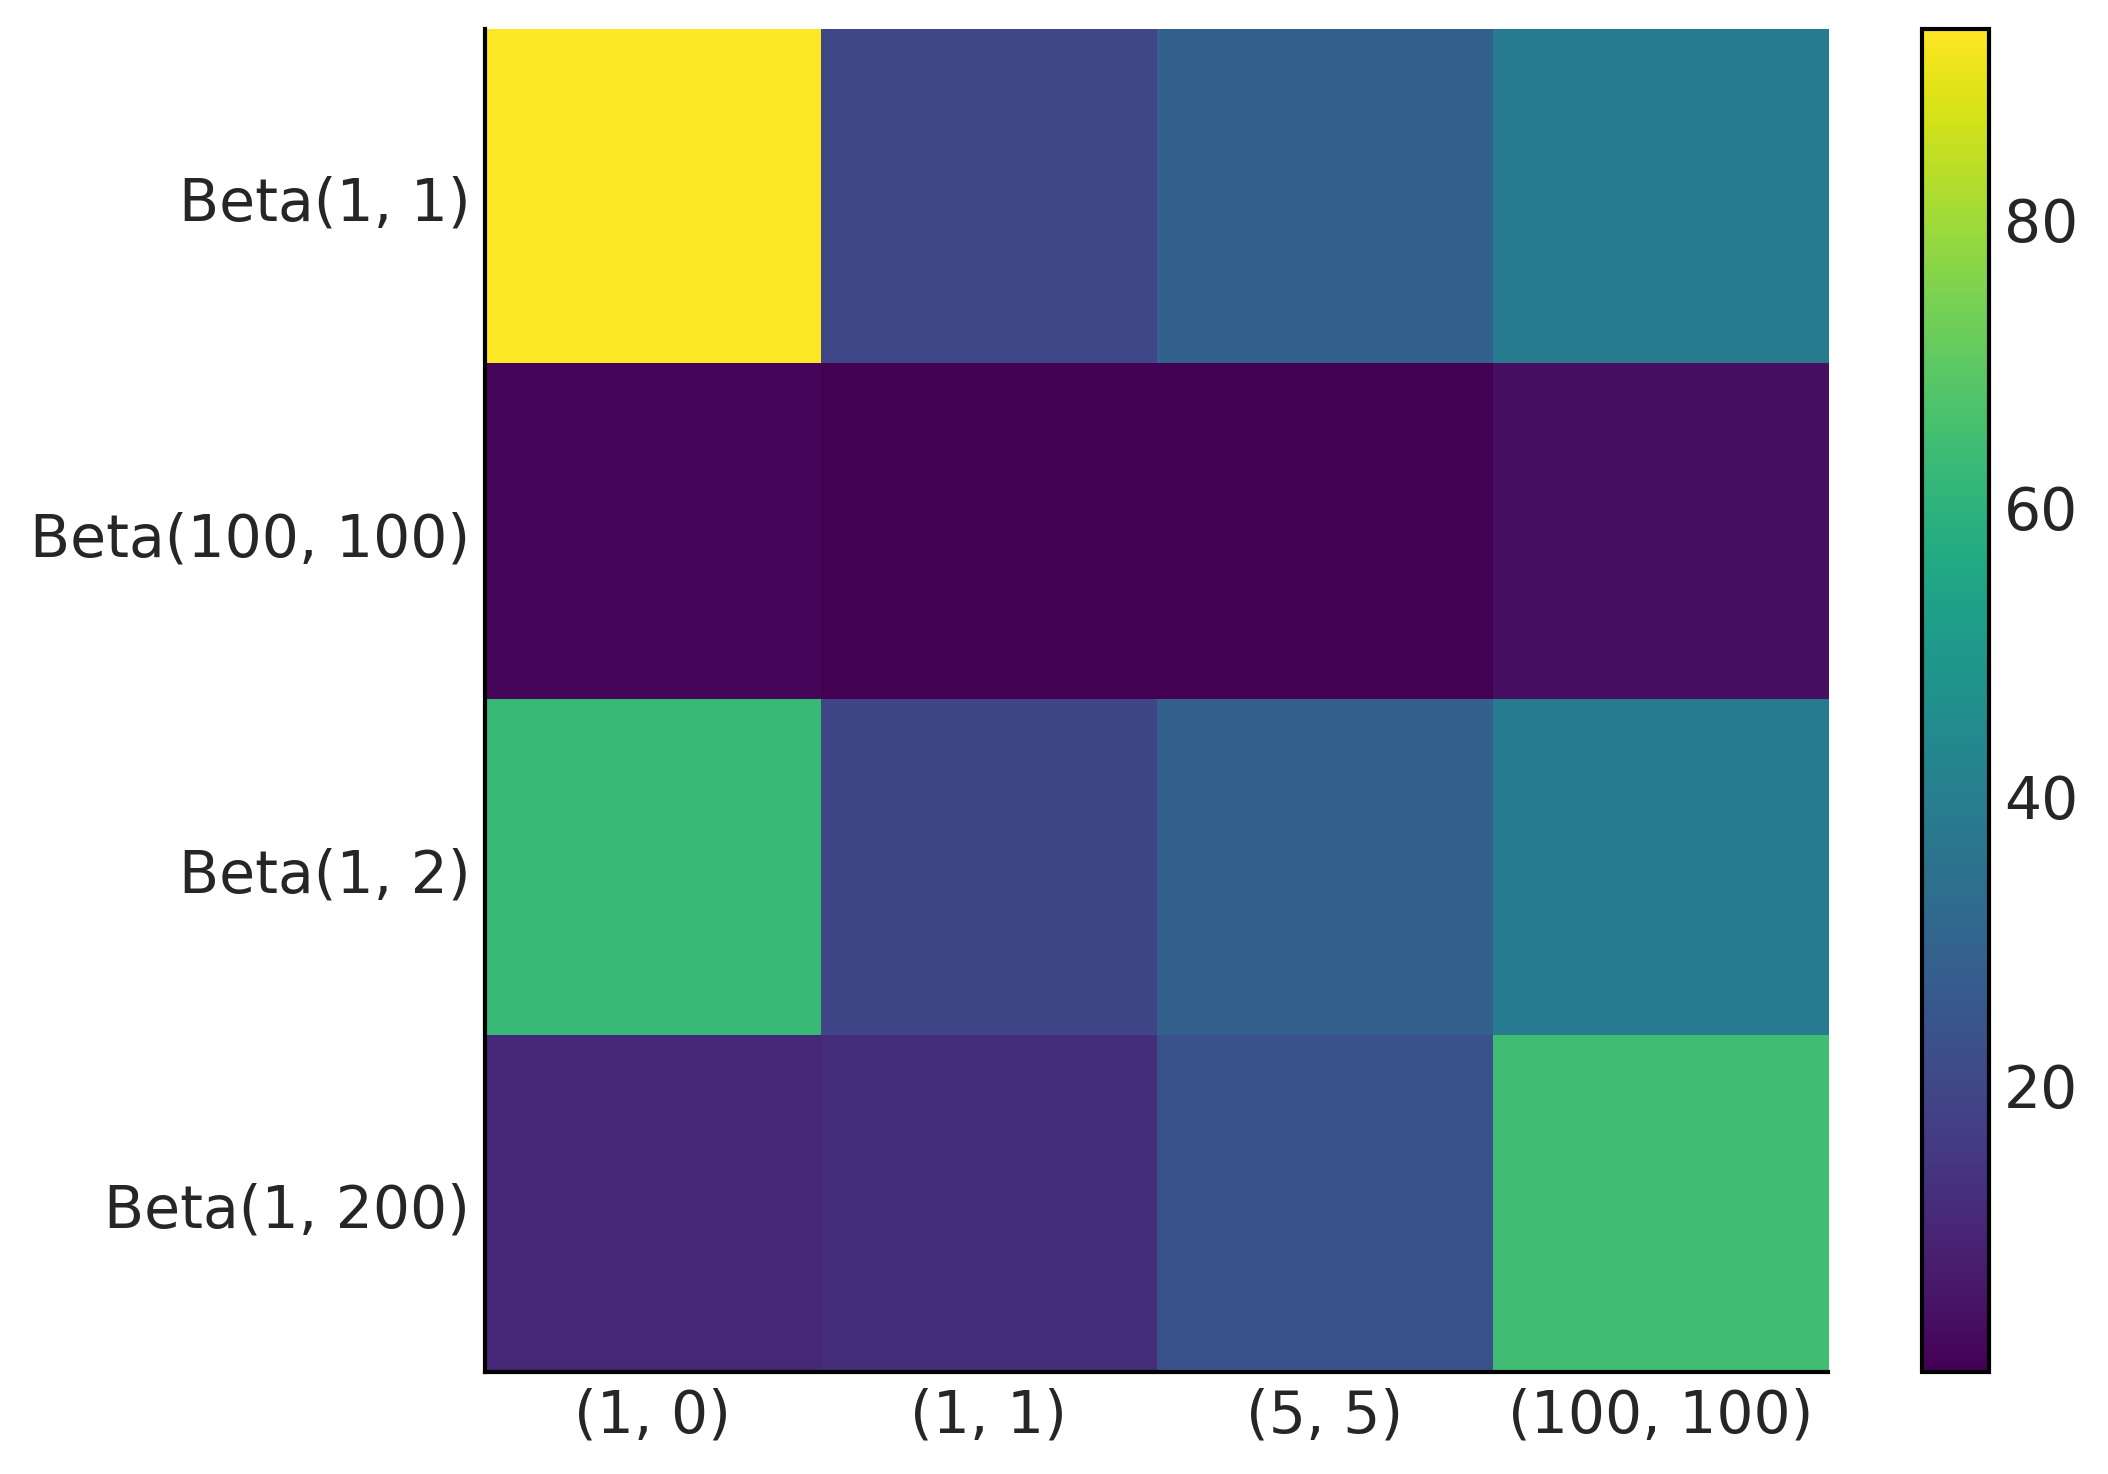

In [12]:
data = [np.repeat([1, 0], rep)
        for rep in ((1, 0), (1, 1), (5, 5), (100, 100))]
priors = ((1, 1), (100, 100), (1, 2), (1, 200))

x_names = [repr((sum(x), len(x)-sum(x))) for x in data]
y_names = ["Beta" + repr(x) for x in priors]

fig, ax = plt.subplots()
error_matrix = np.zeros((len(priors), len(data)))
for i, prior in enumerate(priors):
    for j, y in enumerate(data):
        error_matrix[i, j] = 100 * \
            (1 - (beta_binom_harmonic(prior, y) / beta_binom(prior, y)))
im = ax.imshow(error_matrix, cmap='viridis')
ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names)
ax.set_yticklabels(y_names)
fig.colorbar(im)
plt.savefig("img/chp11/harmonic_mean_heatmap.png")

(Bayes_factors)=

### 11.7.2. Marginal Likelihood and Model Comparison

When performing inference the marginal likelihood is generally regarded
as a normalization constant and often could be omitted or canceled out
during computation. Instead, the marginal likelihood is often seen as
crucial during model comparison {cite:p}`Gronau2017, Navarro2020, Schad2021`.
To better understand why let us write Bayes' theorem in a way that
explicitly shows that our inferences are model dependent:

```{math}
:label: eq:bayes_theorem_M
p(\boldsymbol{\theta} \mid Y, M) = {\frac {p(Y \mid \boldsymbol{\theta}, M)\; p(\boldsymbol{\theta} \mid M)}{p(Y \mid M)}}
```

where $Y$ represents the data and $\boldsymbol{\theta}$ represents the
parameters in model $M$.

If we have a set of $k$ models and our main objective is to choose only
one of them, we can choose the one with the largest value of the
marginal likelihood $p(Y \mid M)$. Choosing the model with the largest
marginal likelihood is perfectly justified from Bayes theorem under the
assumption of a discrete Uniform prior distribution for the $k$ models
under comparison.

```{math}
:label: eq:posterior_model
p(M \mid Y) \propto p(Y \mid M)\; p(M)

```

If all models have the same a priori probability then computing
$p(Y \mid M)$ is equivalent to computing $p(M \mid Y)$. Notice that we
are talking about the prior probability we assign to models $p(M)$ and
not about the priors we assign to parameters for each model
$p(\theta \mid M)$.

As the value of $p(Y \mid M_k)$ does not tell us anything by-itself, in
practice people usually compute the ratio of two marginal likelihoods.
This ratio is called Bayes factor:

```{math}
:label: eq:bayes_factor
BF = \frac{p(Y \mid M_0)}{p(Y \mid M_1)}
```

Values of $BF > 1$ indicates that model $M_0$ it is better at explaining
the data when compared with model $M_1$. In practice it is common to use
rules of thumb indicating when a BF is small, large, not that large, etc
[^21].

Bayes factor is appealing because it is a direct application of Bayes'
theorem as we can see from Equation {eq}`eq:posterior_model`, but this
is also true for the harmonic mean estimator (see Section {ref}`harmonic_mean`)
and that does not automatically makes it a good estimator. Bayes factor
is also appealing because, contrary to the likelihood of a model, the
marginal likelihood does not necessarily increases with the complexity
of the model. The intuitive reason is that the larger the number of
parameters the more *spread out* the prior will be with respect to the
likelihood. Or in other words a more *spread out* prior is one that
admits more datasets, as plausible, than a more concentrated one. This
will be reflected in the marginal likelihood as we will get a smaller
value with a wider prior than with a more concentrated prior.

Besides the computational problem, the marginal likelihood has a feature
that it is usually considered as a bug. It is *very sensitive* to the
choice of priors. By *very sensitive* we mean changes that while
irrelevant for inference, have a practical effect in the value of the
marginal likelihood. To exemplify this, assume we have the model:

```{math} 
:label: eq:normal_normal
\begin{split}
    \mu \sim&\; \mathcal{N}(0, \sigma_0) \\
    Y \sim&\; \mathcal{N}(\mu, \sigma_1)
\end{split}

```

The marginal log-likelihood for this model is can be computed
analytically as follows:

```python
σ_0 = 1
σ_1 = 1
y = np.array([0])
stats.norm.logpdf(loc=0, scale=(σ_0**2 + σ_1**2)**0.5, x=y).sum()
```

```none
-1.2655121234846454
```

If you change the value of the prior parameter $\sigma_0$ to 2.5 instead
of 1, the marginal likelihood will be about 2 times smaller and by
changing it to 10 it will be about 7 times smaller. You can use a PPL to
compute the posterior for this model and see for yourself how
influential is the change of the prior in the posterior. Additionally
you can check {numref}`fig:posterior_ML` in the next section.

[^21]: We do not like these rules of thumb, but you can check, for
    example, here
    <https://en.wikipedia.org/wiki/Bayes_factor#Interpretation>

In [13]:
def normal_harmonic(sd_0, sd_1, y, s=10000):
    post_tau = 1/sd_0**2 + 1/sd_1**2
    posterior_samples = stats.norm(loc=(y/sd_1**2)/post_tau, scale=(1/post_tau)**0.5).rvs((s, len(x)))
    log_likelihood = stats.norm.logpdf(loc=x, scale=sd_1, x=posterior_samples).sum(1)
    return 1/np.mean(1/log_likelihood)

In [14]:
σ_0 = 1
σ_1 = 1
y = np.array([0])
stats.norm.logpdf(loc=0, scale=(σ_0**2+σ_1**2)**0.5, x=y).sum()

-1.2655121234846454

(bayes-factor-vs-waic-and-loo)=

### 11.7.3. Bayes Factor vs WAIC and LOO

In this book we do not use Bayes factors to compare model, we prefer
instead the use of LOO. So it maybe useful to better understand how BFs
are related to these other estimators. If we omit the details we can say
that:

-   WAIC is the posterior-averaged log-likelihood

-   LOO is the posterior-averaged log-likelihood

-   The marginal likelihood is the prior-averaged (log)likelihood [^22].

Let us discuss how this helps to understand the similarities and
differences between these three quantities. All of them use a log-score
as a measure of fitness with different computation. WAIC use a
penalization term computed from the posterior variance. While both LOO
and marginal likelihood avoids needing to use an explicit penalization
term. LOO achieves this by approximating a leave-one-out
cross-validation procedure. That is, it approximates using a dataset to
fit the data and a different dataset to evaluate its fit. The
penalization in marginal likelihood comes from averaging over the entire
prior, with the spread of the prior (relatively) to the likelihood
working as built-in penalizer. The penalization used in the marginal
likelihood it seems to be somehow similar to the penalization in WAIC,
although WAIC uses the variance of the posterior and so is close to the
penalization in cross validation. Because, as previously discussed, a
more spread prior admits more datasets as plausible than a more
concentrated one, computing marginal likelihood is like implicitly
averaging over all the datasets admitted by the prior.

An alternative, and equivalent, way to conceptualize the marginal
likelihood is to notice that it is the prior predictive distribution
evaluated at a particular dataset $Y$. Thus, it is telling us how likely
the data is under our model. And the model includes the prior and the
likelihood.

For WAIC and LOO the role of the prior is indirect. The prior affects
the value of WAIC and LOO only by its effect on the posterior. The more
informative the data with respect to the prior, or in other words the
greater the difference between prior and posterior, the less sensitive
will be WAIC and LOO to the details of the prior. Instead, marginal
likelihood use priors directly as we need to average the likelihood over
the prior. Conceptually we can say that Bayes factors are focused on
identifying the best model (and the prior is part of the model) while
WAIC and LOO are focused on which (fitted) model and parameter will give
the best predictions. {numref}`fig:posterior_ML` shows 3 posteriors for
the model defined in Equation {eq}`eq:normal_normal`, for $\sigma_0=1$,
$\sigma_0=10$ and $\sigma_0=100$. As we can see, the posteriors are very
close to each other, especially the last two. We can see that the values
of WAIC and LOO only slightly change for the different posteriors, while
the log marginal likelihood is sensitive to the choice of the prior. The
posterior and log marginal likelihoods were computed analytically, WAIC
and LOO were computed from samples from the posterior (for details see
the accompanying code).

```{figure} figures/ml_waic_loo.png
:name: fig:posterior_ML
:width: 7.00in
Prior (gray line) and posterior (blue line) for the model in Equation
{eq}`eq:normal_normal`. WAIC and LOO reflect that the posterior
distributions are almost identical, while the marginal likelihood
reflects that the prior are different.
```

The above discussion helps to explain why Bayes factors are widely used
in some fields and disliked in others. When priors are closer to
reflecting some underlying *true* model, the sensitivity of the marginal
likelihood to the prior specification is less worrisome. When priors are
mainly used for their regularizing properties and when possible to
provide some background knowledge, that sensitivity could be seen as
problematic.

As a result, we think WAIC, and especially LOO, has more practical
value, as their computation is generally more robust, and without the
need to use special inference methods. And in the case of LOO, we also

[^22]: In practice it is very common to actually compute the marginal
    likelihood in log-scale for computational stability. In such a case
    a Bayes factor becomes a difference of two log marginal likelihoods

In [15]:
def posterior_ml_ic_normal(σ_0=1, σ_1=1, y=[1]):
    n = len(y)
    var_μ = 1/((1/σ_0**2) + (n/σ_1**2))
    μ = var_μ * np.sum(y)/σ_1**2
    σ_μ = var_μ**0.5

    posterior = stats.norm(loc=μ, scale=σ_μ)
    samples = posterior.rvs(size=(2, 1000))
    log_likelihood = stats.norm(loc=samples[:, :, None], scale=σ_1).logpdf(y)
    idata = az.from_dict(log_likelihood={'o': log_likelihood})

    log_ml = stats.norm.logpdf(loc=0, scale=(σ_0**2+σ_1**2)**0.5, x=y).sum()
    
    x = np.linspace(-5, 6, 300)
    density = posterior.pdf(x)
    
    return μ, σ_μ, x, density, log_ml, az.waic(idata).elpd_waic, az.loo(idata, reff=1).elpd_loo

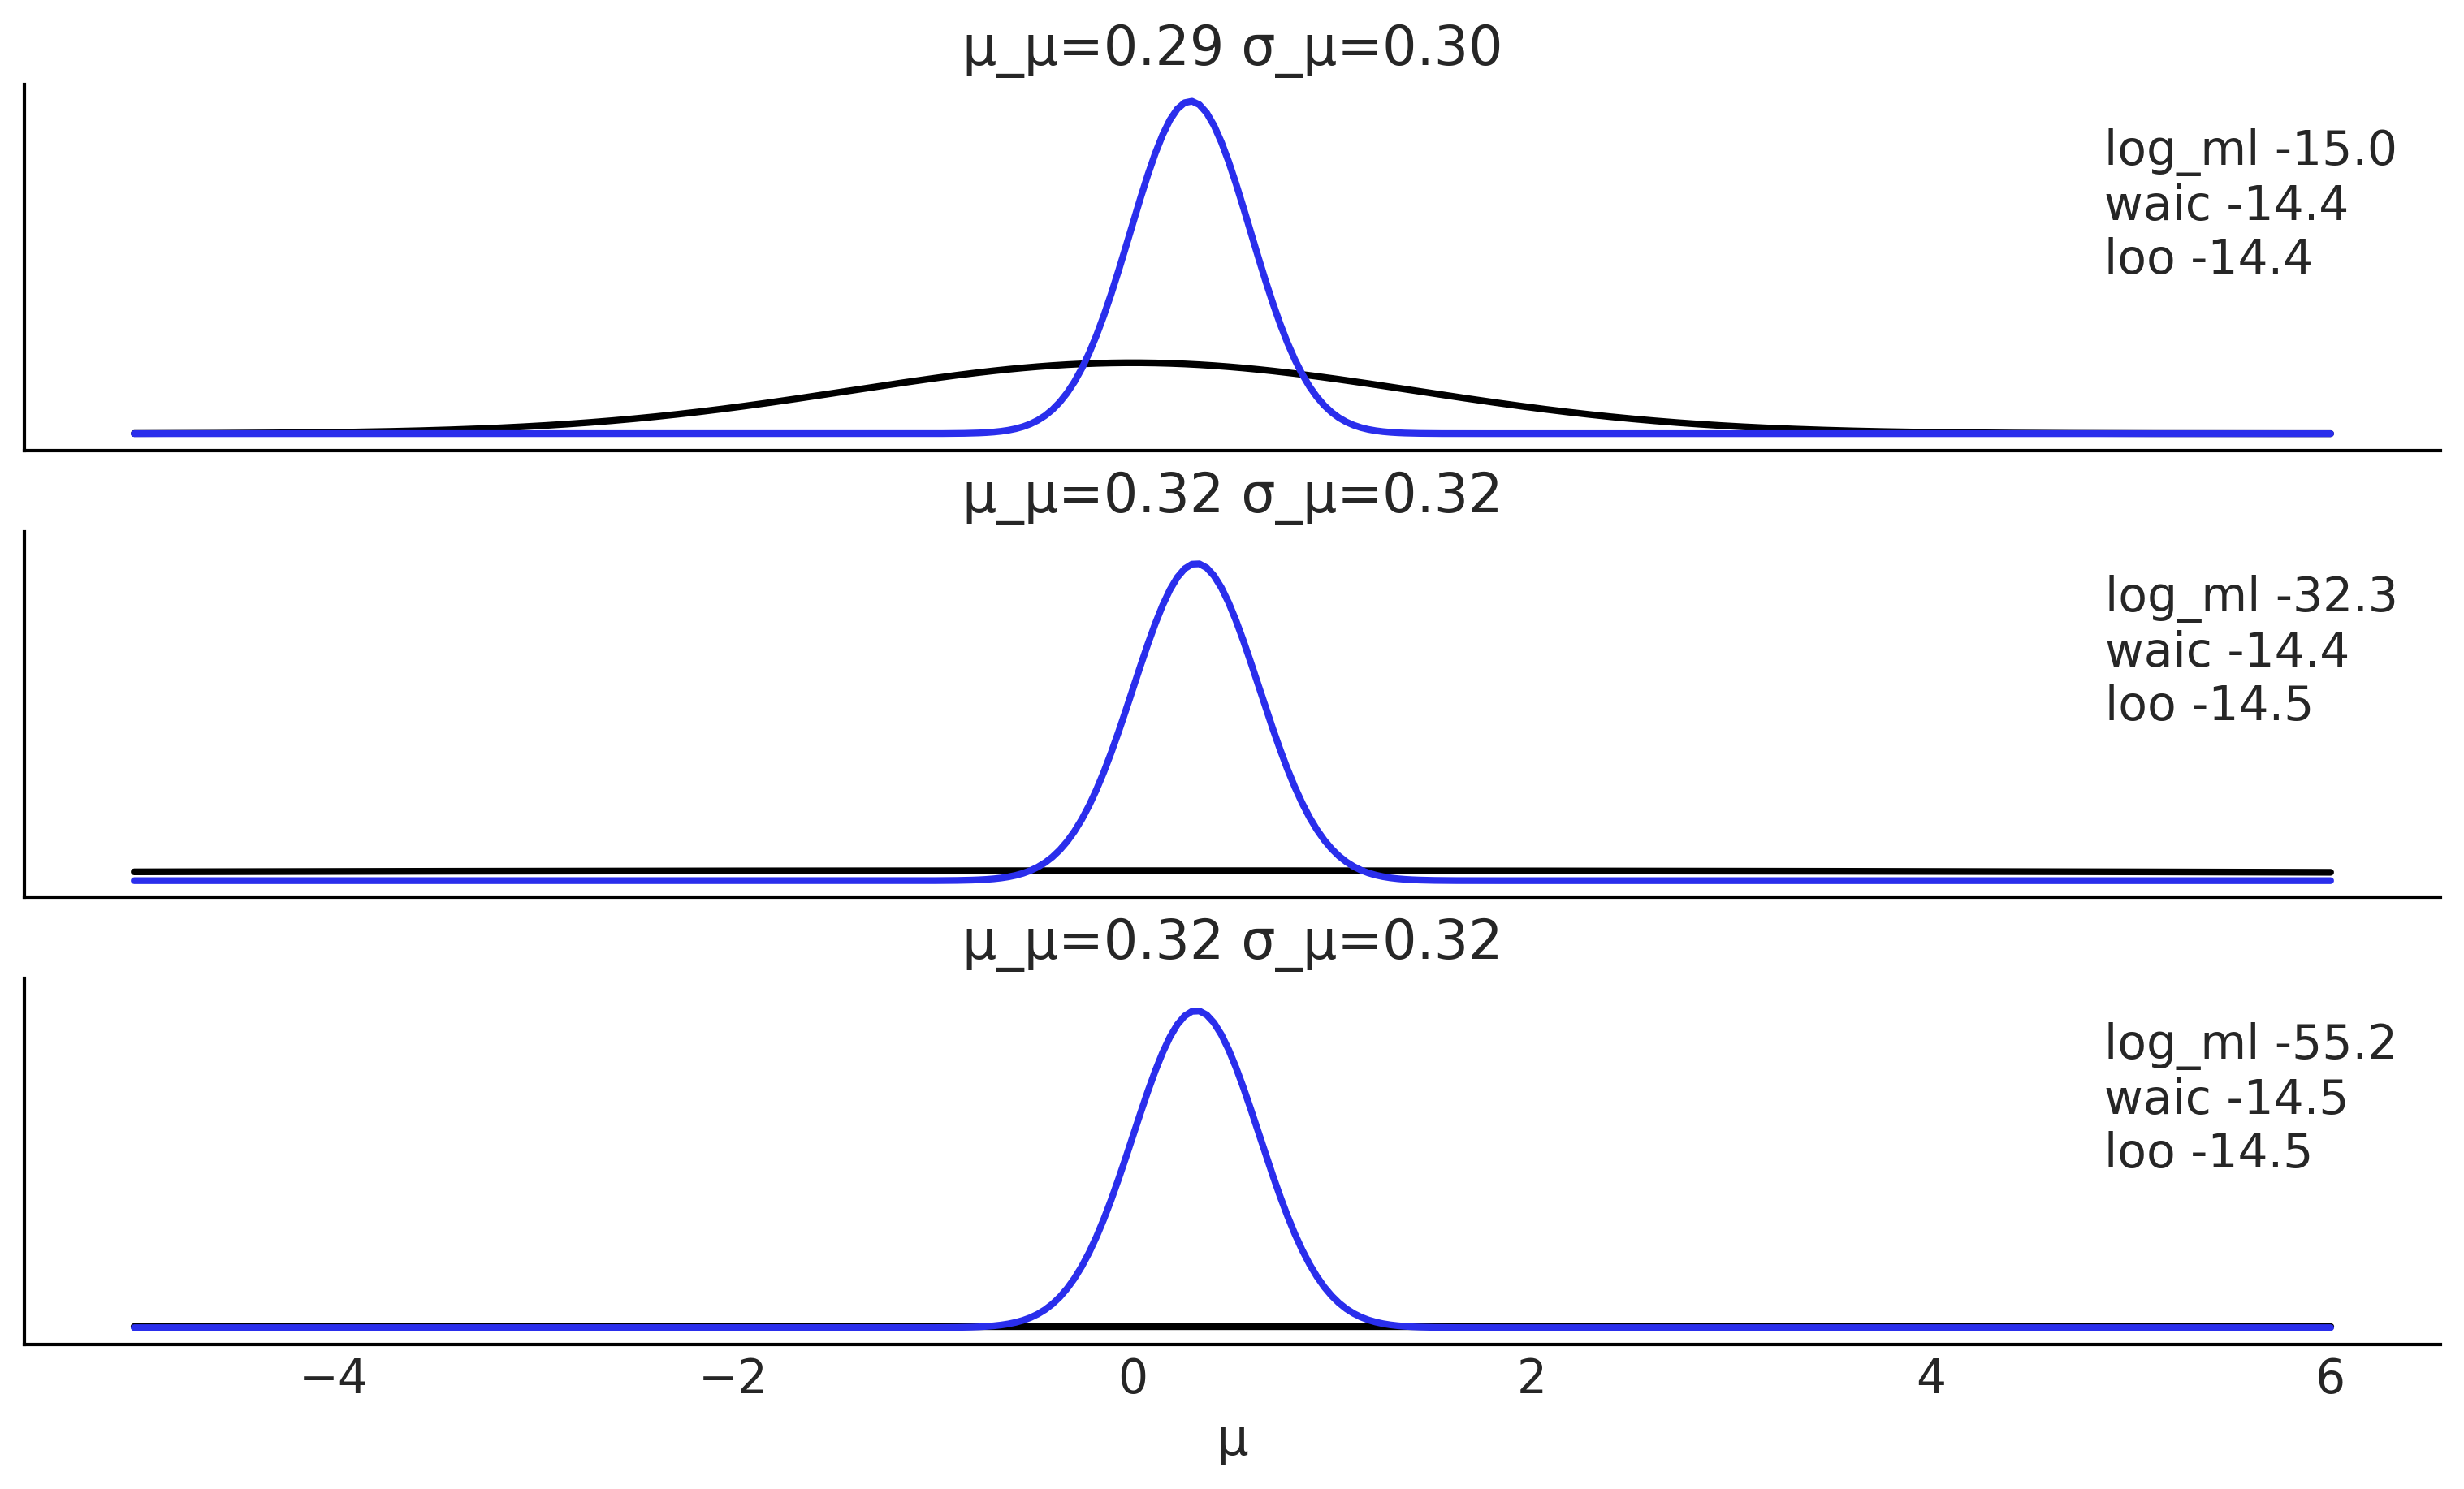

In [16]:
y = np.array([ 0.65225338, -0.06122589,  0.27745188,  1.38026371, -0.72751008,
              -1.10323829,  2.07122286, -0.52652711,  0.51528113,  0.71297661])

_, ax = plt.subplots(3, figsize=(10, 6), sharex=True, sharey=True,
                     constrained_layout=True)

for i, σ_0 in enumerate((1, 10, 100)):
    μ_μ, σ_μ, x, density, log_ml, waic, loo = posterior_ml_ic_normal(σ_0, σ_1, y)
    ax[i].plot(x, stats.norm(loc=0, scale=(σ_0**2+σ_1**2)**0.5).pdf(x), lw=2)
    ax[i].plot(x, density, lw=2, color='C4')
    ax[i].plot(0, label=f'log_ml {log_ml:.1f}\nwaic {waic:.1f}\nloo {loo:.1f}\n', alpha=0)
    ax[i].set_title(f'μ_μ={μ_μ:.2f} σ_μ={σ_μ:.2f}')
    ax[i].legend()
ax[2].set_yticks([])

ax[2].set_xlabel("μ")

plt.savefig("img/chp11/ml_waic_loo.png")

(high_dimensions)=

## 11.8. Moving out of Flatland

In Flatland: A Romance of Many Dimensions by Edwin Abbott
{cite:p}`AbbottFlatland` it tells the story of a square living in flatland, a
two dimensional world inhabited by n-side polygons and where status is
defined by the number of sides; with women being simple line-segments,
and priests insisting they are circles even when then are just
high-order polygons. The novel, first published in 1984, works equally
well as social satire about the difficulties to understand ideas beyond
our common experience.

As it happens to Square in flatland we are now going to evidence the
weirdness of higher-dimensional spaces.

Suppose we want to estimate the value of $\pi$. A simple procedure to do
this is as follows. Inscribe a circle into a square, generate $N$ points
uniformly lying in that square and then count the proportion that fall
inside the circle. Technically this is a Monte Carlo integration as we
are calculating the value of a definite integral by using a
(pseudo)random number generator.

The area of the circle and square are proportional to the number of
points inside the circle and the total points. If the square has side
$2R$, it area will be $(2R)^2$ and the circle inscribe it inside of the
square will have area $\pi R^2$. The we have that:

```{math}
:label: eq:circ_mc
\frac{\text{inside}}{N} \propto \frac{\pi R^2}{(2R)^2}
```

By simplifying and rearranging we get that we can approximate $\pi$ as:

```{math}
:label: eq:pi_mc
\hat \pi = 4 \frac{\text{Count}_{inside}}{N}
```

We can implement this in a few lines of Python code as in Code Block
[montecarlo](montecarlo) and the simulated points with the
estimated value of $\pi$ and the error of the approximation is shown in
{numref}`fig:monte_carlo`.

```{code-block} python
:name: montecarlo
:caption: montecarlo

N = 10000
x, y = np.random.uniform(-1, 1, size=(2, N))
inside = (x**2 + y**2) <= 1
pi = inside.sum()*4/N
error = abs((pi - np.pi) / pi) * 100
```

```{figure} figures/monte_carlo.png
:name: fig:monte_carlo
:width: 5.00in
Estimating $\pi$ using Monte Carlo samples, legend shows the estimation
and percentage error.
```

In [17]:
N = 10000
x, y = np.random.uniform(-1, 1, size=(2, N))
inside = (x**2 + y**2) <= 1
pi = inside.sum()*4/N
error = abs((pi - np.pi) / pi) * 100

As the draws are iid, we can apply the central limit theorem here and
then we know the error is reduced at a rate $\frac{1}{\sqrt{N}}$),
meaning that for each additional decimal place of accuracy we want we
will need to increase the number of draws `N` by a factor of 100.

What we have just done is an example of a Monte Carlo method [^23],
basically any method that uses (pseudo)random samples to compute
something. And technically what we have done is a Monte Carlo
integration as we are calculating the value of a definite integral (an
area) by using samples. Monte Carlo methods are everywhere in
statistics.

In Bayesian statistics we need to compute integrals to obtain posteriors
or compute expectations from it. You may suggest that we can use a
variation of this idea to compute quantities more interesting than
$\pi$. It turns out that this method will generally not work very well
as we increase the dimensionality of the problem. In Code Block
[inside_out](inside_out) we count the number of points
inside a circle when sampled from a square as we did before but from
dimension 2 to 15. The result is in {numref}`fig:inside_out`, weirdly,
we see that as we increase the dimension of the problem and even when
the hypersphere is *touching* the walls of the hypercube, the proportion
of points inside drops rapidly. In a sense in higher dimensions all the
volume of the hypercube is at the corners [^24].


```{code-block} python
:name: inside_out
:caption: inside_out

total = 100000

dims = []
prop = []
for d in range(2, 15):
    x = np.random.random(size=(d, total))
    inside = ((x * x).sum(axis=0) < 1).sum()
    dims.append(d)
    prop.append(inside / total)
```

```{figure} figures/inside_out.png
:name: fig:inside_out
:width: 5.00in
As we increase the dimensions the chance of getting a point inside an
hypersphere inscribed into a hyper-cube goes to zero. This shows that in
higher dimensions, almost all of the volume of an hypercube is in its
corners.
```

[^23]: The names derived from a famous casino with that name in the
    Principality of Monaco.

[^24]: This video shows a closely related example in a very calm and
    clear way <https://www.youtube.com/watch?v=zwAD6dRSVyI>

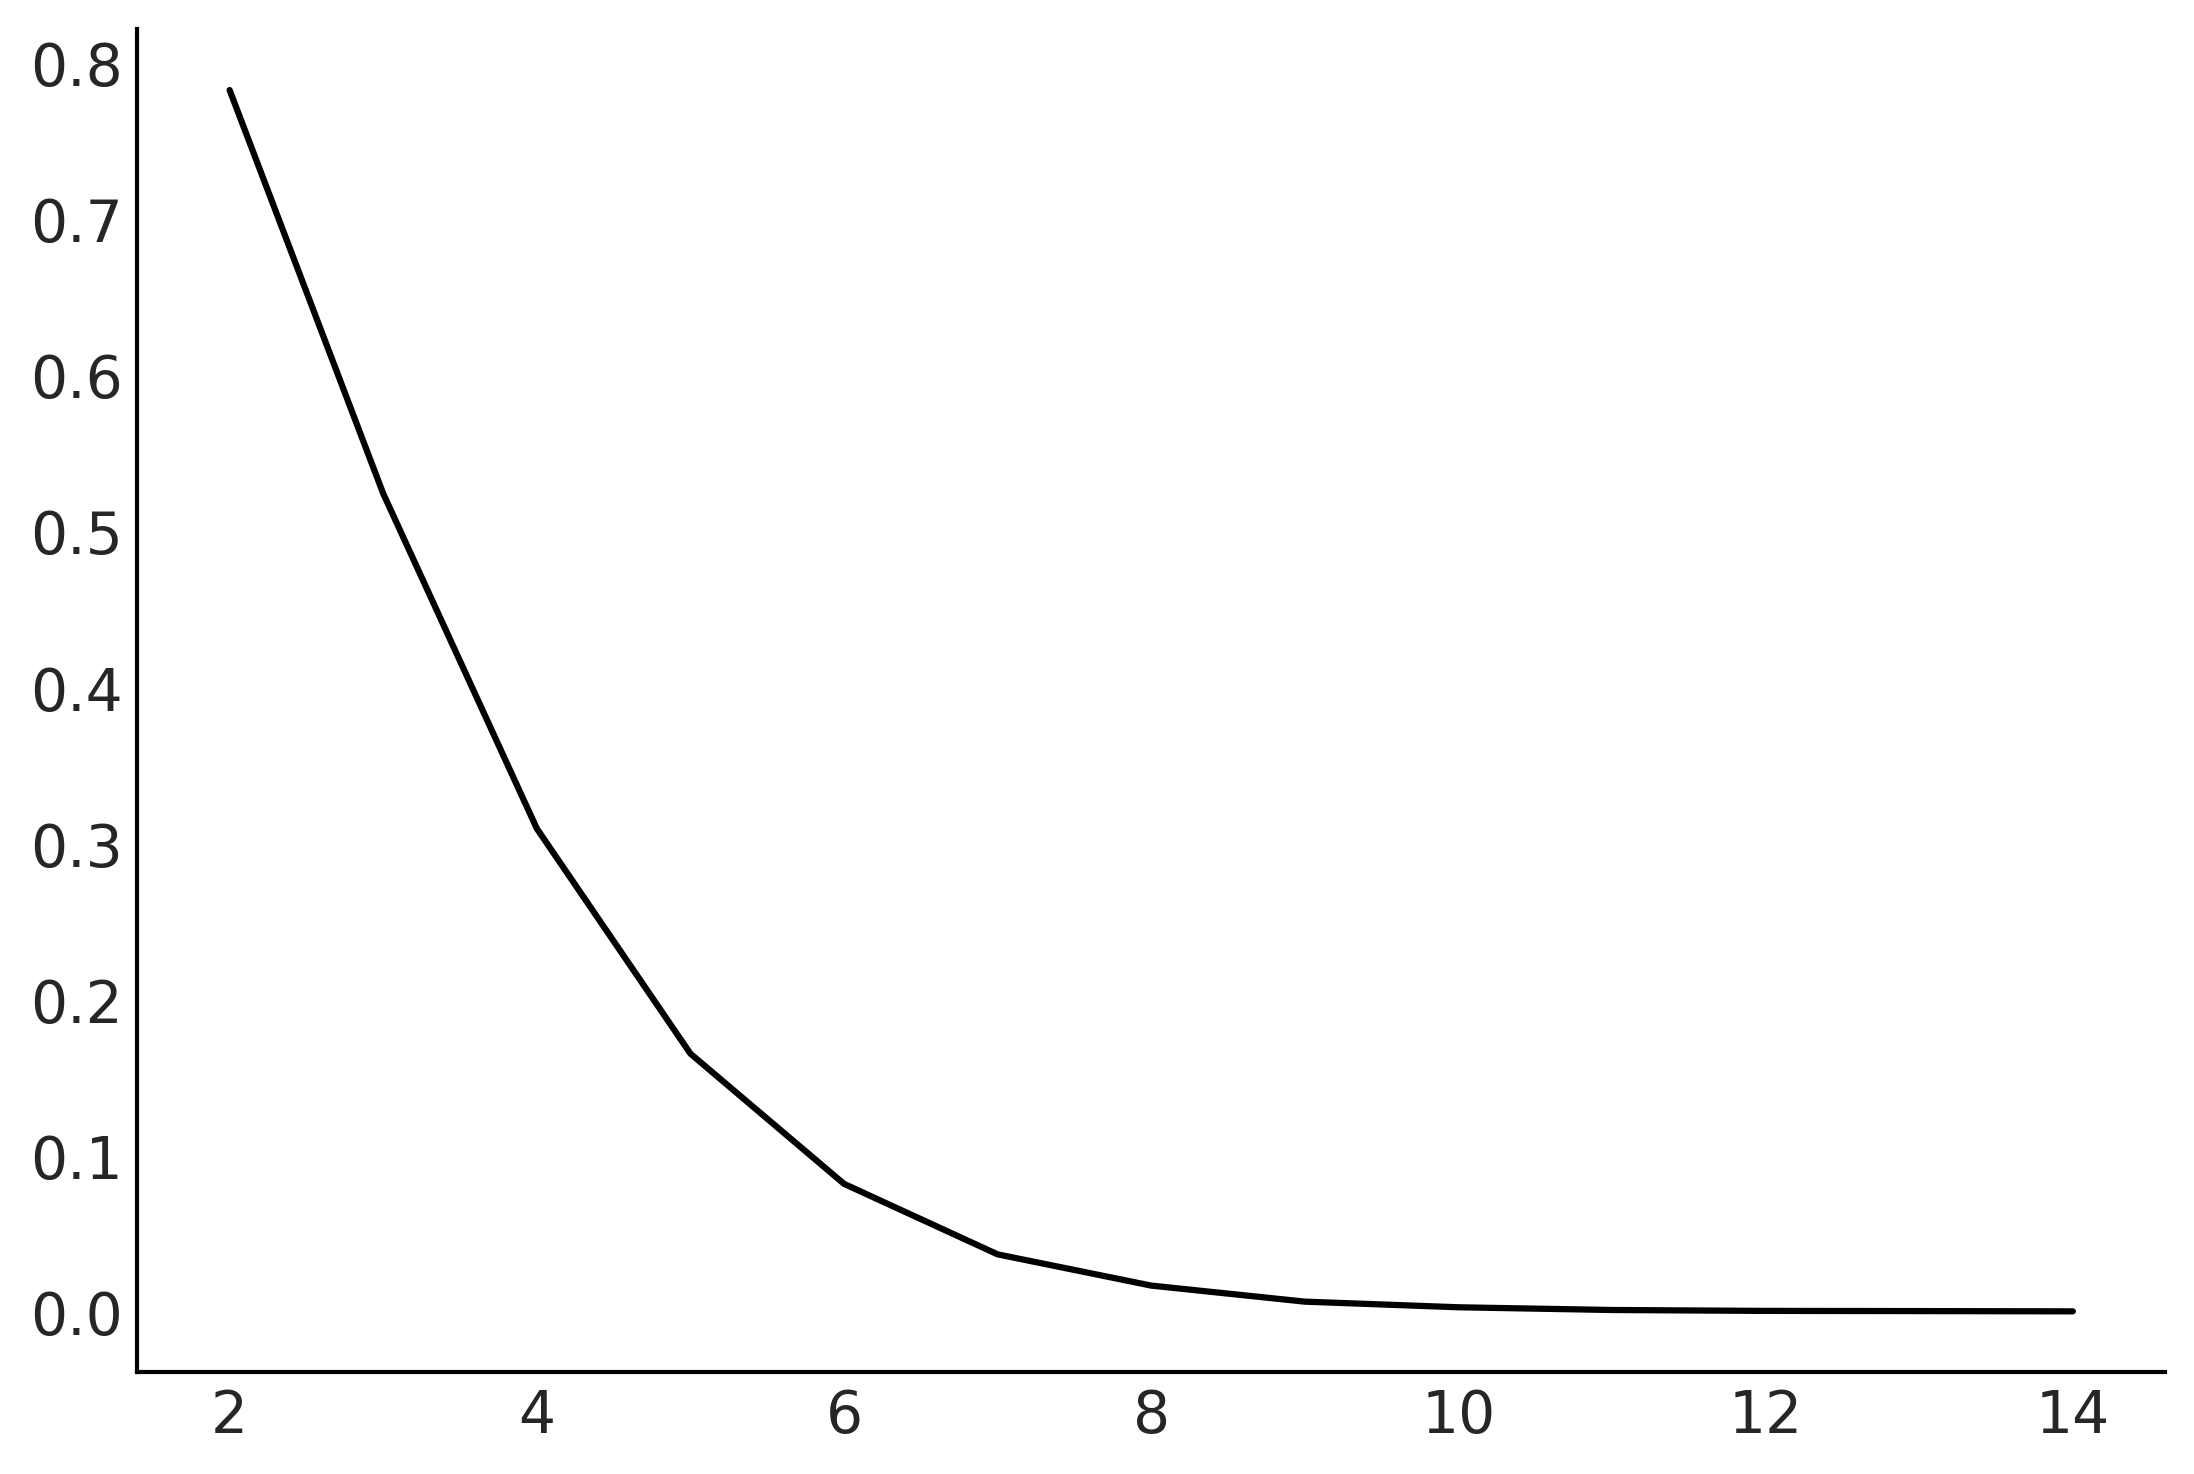

In [18]:
total = 100000

dims = []
prop = []
for d in range(2, 15):
    x = np.random.random(size=(d, total))
    inside = ((x * x).sum(axis=0) < 1).sum()
    dims.append(d)
    prop.append(inside / total)
    
plt.plot(dims, prop);

Let us see another examples using Multivariate Gaussian.
{numref}`fig:distance_to_mode` shows that as we increase the
dimensionality of a Gaussian, most of the mass of that Gaussian is
located further and further away from the mode. In fact, most of the
mass is around an *annulus* at radius $\sqrt{d}$ from the mode, in other
words as we increase the dimensionality of the Gaussian the mode becomes
less and less typical. In higher dimensions the mode, which is also the
mean, is actually an outlier. The reason is that it is very unusual for
any given point to be average in all dimensions!

We can also see this from another perspective. The mode is always the
point with highest density, even if in high dimensional space. The key
insight is noting that it is unique (like the point from flatland!). If
we move away from the mode we will find points that are individually
less likely but there are a lot of them. As we saw in Section {ref}`cont_rvs` a
probability is computed as the integral of the density over a volume
(actually an interval in the one dimensional case), so to find out where
all the mass of a distribution is we have to balance both the density
and their volume. As we increase the dimension of the Gaussian we will
be most likely to pick a point from an *annulus* that excludes the mode.
The region of the space containing most of the mass of a probability
distribution is known as the typical set. In Bayesian statistics we care
about it, because if we are going to approximate a high dimensional
posterior with samples it suffices that the samples come from the
typical set.

```{figure} figures/distance_to_mode.png
:name: fig:distance_to_mode
:width: 8.00in
As we increase the dimension of a Gaussian most of the mass is
distributed farther and farther away from the mode of that Gaussian.
```

(inference_methods)=

## 11.9. Inference Methods

There a a myriad of methods to compute the posterior. If we exclude the
exact analytical solutions we already discussed in Chapter
[1](chap1) when we discussed conjugate priors, we can classify
inference methods into 3 large groups:

1.  Deterministic integration methods, that we have not yet seen in the
    book, but we will do next

2.  Simulations methods, also introduced in Chapter [1](chap1)
    and the methods of choice through out the entire book and finally

3.  Approximation methods, for example, the ABC method discussed in
    Chapter [8](chap8), in the case that the likelihood function
    does not have a closed form expression.

While some methods could be combinations of these categories, we still
think it is useful as to order the plethora of available methods.

For a good chronological tour of Bayesian computation methods over the
past two and a half centuries, with an special emphasis on those that
transformed Bayesian inference we recommend you read Computing Bayes:
Bayesian Computation from 1763 to the 21st Century {cite:p}`Martin2020`

(grid-method)=

### 11.9.1. Grid Method

The grid method is a simple brute-force approach. We want to know the
value of posterior distribution over its domain to be able to use it
(finding the maximum, computing expectation, etc). Even if you are not
able to compute the whole posterior, you may be able to evaluate the
prior and the likelihood density function point-wise; this is a pretty
common scenario, if not the most common one. For a single parameter
model, the grid approximation is:

-   Find a reasonable interval for the parameter (the prior should give
    some hints).

-   Define a grid of points (generally equidistant) on that interval.

-   For each point in the grid, multiply the likelihood and the prior.
    Optionally, we may normalize the computed values so the posterior
    sum to 1 by dividing the result at each point by the sum of all
    points

Code Block [grid_method](grid_method) computes the
posterior the Beta-Binomial model:

```{code-block} python
:name: grid_method
:caption: grid_method

def posterior_grid(ngrid=10, α=1, β=1, heads=6, trials=9):
    grid = np.linspace(0, 1, ngrid)
    prior = stats.beta(α, β).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    return posterior
```

```{figure} figures/grid_method.png
:name: fig:grid_method
:width: 8.00in
By evaluating the prior and the likelihood pointwise over a grid we can
approximate the posterior.
```

We can get a better approximation by increasing the number of points of
the grid. In fact if we use infinite number of points we will get the
exact posterior, at the cost of needing infinite computing resources.
The biggest caveat of the grid approach is that this method scales
poorly with the number of parameters as explained in
{ref}`high_dimensions`.

In [19]:
def posterior_grid(ngrid=10, α=1, β=1, heads=6, trials=9):
    grid = np.linspace(0, 1, ngrid)
    prior = stats.beta(α, β).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    return posterior

(sec_metropolis_hastings)=

### 11.9.2. Metropolis-Hastings

We introduced Metropolis-Hastings algorithm
{cite:p}`Metropolis1953, Hastings1970, Rosenbluth2003` very early in Section {ref}`sampling_methods_intro`
and show a simple Python implementation in Code Block
[metropolis_hastings](metropolis_hastings). We will now provide more detail about why this
method works. We will do it using the language of Markov Chains
introduced in Section {ref}`markov_chains`.

The Metropolis-Hastings algorithm is a general method that allow us to
start with any irreducible Markov chain on the state space of interest
and then modify it into a new Markov chain that has the stationary
distribution that we really care. In other words we take samples from an
easy to sample distribution like a Multivariate Normal and we turn those
samples into samples from our target distribution. The way we modify the
original chain is by being selective, we only accept some of the samples
and reject the others. As we saw in Chapter [1](chap1). The
probability of accepting a new proposal is:

```{math}
p_a (x_{i + 1} \mid x_i) = \min \left (1, \frac{p(x_{i + 1}) \; 
q(x_i \mid x_{i + 1})} {p(x_i) \; q (x_{i + 1} \mid x_i)} \right)
```

Let us rewrite this in a shorter form, for easier manipulation.

```{math}
:label: eq:acceptance_prob1
a_{ij} = \min \left (1, \frac{p_j q_{ji}}{{p_i q_{ij}}} \right)
```

That is we propose with probability $q_{ij}$ (read the subscript $ij$ as
from $i$ to $j$) and accepts the proposal with probability $a_{ij}$. One
of the nice feature of this method is that we do not need to know the
normalizing constant of the distribution we want to sample, as it will
be cancelled out when we compute $\frac{p_j}{p_i}$. This is very
important because in may many problems, including Bayesian inference,
computing that normalization constant (the marginal likelihood) is very
difficult.

We will now show that the Metropolis-Hastings chain is reversible with
stationary distribution $p$ as we mentioned in Section {ref}`markov_chains`. We
need to proof that the detailed balance condition i.e. the reversibility
condition holds, that is:

Let $\mathbf{T}$ be the transition matrix, we just need to show that
$p_i t_{ij} = p_j t_{ji}$ for all $i$ and $j$, this is trivial when
$i = j$ so we assume that $i \neq j$, we can write:

```{math} 
:label: eq:transition
t_{ij} = q_{ij} a_{ij}

```

Meaning that the probability to transition from $i$ to $j$ is the
probability of proposing the move times the probability of accepting it.
Let us first see the case where the probability of acceptance is less
that 1, this happens when $p_j q_{ji} \le p_i q_{ij}$, then we have that

```{math} 
:label: eq:acceptance_ij
a_{ij} = \frac{p_j q_{ji}}{p_i q_{ij}}

```

and also

```{math}
:label: eq:acceptance_ji
a_{ji} = 1
```

Using Equation {eq}`eq:transition`, we have

```{math}
:label: eq:transition2
p_i t_{ij} = p_i q_{ij} a_{ij}
```

replacing $a_{ij}$ in Equation {eq}`eq:acceptance_ij`

```{math}
:label: eq:transition3
p_i t_{ij} = p_i q_{ij} \frac{p_j q_{ji}}{p_i q_{ij}}
```

simplifying above we get:

```{math}
:label: eq:transition4
p_i t_{ij} = p_j q_{ji}
```

Because $a_{ji} = 1$ we can include it without changing the validity of
the equation.

```{math}
:label: eq:transition5
p_i t_{ij} = p_j q_{ji} a_{ji}
```

which finally we get that

```{math}
:label: eq:transition6
p_i t_{ij} = p_j t_{ji}
```

By symmetry when $p_j q_{ji} > p_i q_{ij}$ we will arrive at the same
result. As the reversibility condition holds, $p$ is the stationary
distribution of our Markov chain with transition matrix $\mathbf{T}$.

The above proof gives us the theoretical confidence that we can use
Metropolis-Hastings to sample from virtually any distribution we want.
We can also see that while this is a very general result, it does not
help us to choose a proposal distribution. In practice the proposal
distribution is very important as the efficiency of the method depends
heavily on this choice. In general it is observed that if the proposal
makes large jumps the probability of acceptance is very low, and the
method spend most of the time rejecting new states and thus stuck in one
place. On the contrary if the proposal takes too small jumps the
acceptance rate is high but the exploration is poor, as the new states
are in a small neighborhood of the old state. A good proposal
distribution is one that generates new putative states far away from the
old state with high acceptance rate. This is generally difficult to do
if we do not know the geometry of the posterior distribution, but that
is precisely what we want to find out. In practice useful
Metropolis-Hastings methods are those that are adaptive
{cite:p}`Haario2001, Andrieu2008, Roberts2009, Sejdinovic2014`. For example,
we can use a Multivariate Gaussian distribution as proposal
distribution. During tuning we can compute the empirical covariance from
the posterior samples and use it as the covariance matrix of the
proposal distribution. We can also scale the covariance matrix so that
the average acceptance rate approach a predefined acceptance rate
{cite:p}`Roberts1997, Roberts2001, Bedard2008`. In fact there is evidence
that under certain circumstances and when the dimensionality of the
posterior increases the optimal acceptance rate converges to the magic
number 0.234 {cite:p}`Roberts1997`. In practice it seems that an acceptance
rate around 0.234 or a little bit higher gives more or less the same
performance but the general validity and useful of this result has also
been disputed {cite:p}`Sherlock2013, Potter2015`.

In the next section we will discuss a clever way to generate proposals
that help to correct most of the problems with basic
Metropolis-Hastings.

(hmc)=

### 11.9.3. Hamiltonian Monte Carlo

Hamiltonian Monte Carlo (HMC) [^25]
{cite:p}`Duane1987, Brooks2011, Betancourt2017` is a type of MCMC method that
makes use of gradients to generate new proposed states. The gradients of
the log-probability of the posterior evaluated at some state provides
information of the geometry of the posterior density function. HMC
attempts to avoid the random walk behavior typical of
Metropolis-Hastings by using the gradient to propose new positions far
from the current one with high acceptance probability. This allows HMC
to better scale to higher dimensions and in principle more complex
geometries, than alternatives.

In simple terms, a Hamiltonian is a description of the total energy of a
physical system. We can decompose the total energy into two terms, the
kinetic and the potential energy. For a real system like rolling a ball
down a hill, the potential energy is given by the position of the ball.
The higher the ball the higher the potential energy. The kinetic energy
is given by the velocity of the ball, or more correctly by its momentum
(which takes into account both the velocity and the mass of the object).
We will assume the total energy preserves, meaning that if the system
gains kinetic energy then is because it has lost the same amount of
potential energy. We can write the Hamiltonian of such a systems as:

```{math}
:label: eq:hamiltonian
H(\mathbf{q}, \mathbf{p})  = K(\mathbf{p}, \mathbf{q}) + V(\mathbf{q})
```

where $K(\mathbf{p}, \mathbf{q})$ is called the kinetic energy, and
$V(\mathbf{q})$ is the potential energy. The probability of finding the
ball at a particular position with a particular momentum is then given
by:

```{math} 
:label: eq:canonical
p(\mathbf{q}, \mathbf{p}) = e^{-H(\mathbf{q}, \mathbf{p})}

```

To simulate such a systems we need to solve the so called Hamiltonian
equations:

```{math}
:label: eq:hamiltonian_equations
\begin{aligned}
\frac{d \mathbf{q}}{dt} =& \quad \frac{\partial H}{\partial \mathbf{p}} = \frac{\partial K}{\partial \mathbf{p}} + \frac{\partial V}{\partial \mathbf{p}} \\
\frac{d \mathbf{p}}{dt} =& -\frac{\partial H}{\partial \mathbf{q}}= -\frac{\partial K}{\partial \mathbf{q}} - \frac{\partial V}{\partial \mathbf{q}}\end{aligned}
```

Note that $\frac{\partial V}{\partial \mathbf{p}} = \mathbf{0}$.

Because we are not interested in modeling an idealized ball rolling down
an idealized hill, but to model an idealized particle along the
posterior distribution, we need to make a few adjustments. First the
potential energy is given by the probability density we are trying to
sample from $p(\mathbf{q})$. For the momentum we are just going to
invoke an auxiliary variable. That is, a made up variable that will help
us. If we choose $p(\mathbf{p} \mid \mathbf{q})$ then we can write:

```{math} 
:label: eq:auxiliary
p(\mathbf{q}, \mathbf{p}) =  p(\mathbf{p} | \mathbf{q}) p(\mathbf{q})

```

This ensures us that we can recover our target distribution by
marginalize out the momentum. By introducing the auxiliary variable, we
can keep working with the physical analogy, and later remove the
auxiliary variable and go back to our problem, sampling the posterior.
If we replace Equation {eq}`eq:auxiliary` in Equation {eq}`eq:canonical`
we got:

```{math}
:label: eq:hamiltonian_KV
H(\mathbf{q}, \mathbf{p}) = \overbrace{-\log p(\mathbf{p} \mid \mathbf{q})}^{K(\mathbf{p}, \mathbf{q})} \overbrace{- \log p(\mathbf{q})}^{ + V(\mathbf{q})}
```

As explained previously, the potential energy $V(\mathbf{q})$ is given
by the $p(\mathbf{q})$ the density function of the target posterior
distribution, and we are free to choose the kinetic energy. If we choose
it to be Gaussian, and drop the normalization constant, we have:

```{math}
:label: eq:kinetic_energy
K(\mathbf{p}, \mathbf{q}) = \frac{1}{2}\mathbf{p}^T M^{-1}\mathbf{p} + \log |M|
```

where $M$ is the **precision matrix** that parameterized the Gaussian
distribution (also referred to as the mass matrix in Hamiltonian Monte
Carlo literature). And if we choose $M = I$, i.e. the identity matrix
which is $n \times n$ square matrix with ones on the main diagonal and
zeros elsewhere, we have:

```{math}
:label: eq:kinetic_energy2
K(\mathbf{p}, \mathbf{q}) = \frac{1}{2}\mathbf{p}^T \mathbf{p}
```

This makes calculations easier as now

```{math}
:label: eq:kinetic_momentum
\frac{\partial K}{\partial \mathbf{p}} = \mathbf{p}
```

and

```{math}
:label: eq:kinetic_position
\frac{\partial K}{\partial \mathbf{q}} = \mathbf{0}
```

We can then simplify Hamilton's equations to:

```{math}
:label: eq:hamiltonian_equations2
\begin{aligned}
\frac{d \mathbf{q}}{dt} =& \mathbf{p} \\
\frac{d \mathbf{p}}{dt} =& - \frac{\partial V}{\partial \mathbf{q}}\end{aligned}
```

Summarizing,the HMC algorithm is then:

1.  Sample a $\mathbf{p} \sim \mathcal{N}(0, I)$

2.  Simulate $\mathbf{q}_t$ and $\mathbf{p}_t$ for some amount of time
    $T$

3.  $\mathbf{q}_T$ is our new proposed state

4.  Use the Metropolis acceptance criterion to accept or reject
    $\mathbf{q}_T$.

Why we still need to use the Metropolis acceptance criterion?
Intuitively because we can think of HMC as a Metropolis-Hasting
algorithm with a better proposal distribution. But there is also a very
good numerical justification, because this steps corrects for errors
introduced by the numerical simulation of the Hamiltonian equations.

To compute the Hamiltonian equations we have to compute a trajectory of
the particle, i.e. all the intermediate points between one state and the
next. In practice this involves computing a series of small
*integration* steps using an integrator method. The most popular one is
the leapfrog integrator. Leapfrog integration is equivalent to updating
positions $q_t$ momentum $q_t$ at interleaved time points, staggered in
such a way that they *leapfrog* over each other.

Code Block [leapfrog](leapfrog) shows a leapfrog
integrator implemented in Python [^26]. The arguments are: `q` and `p`
the initial position and momentum respectively. `dVdq` is a Python
function that returns the gradient of the position of some target
density function at position `q`
$\frac{\partial V}{\partial \mathbf{q}}$. We used JAX {cite:p}`jax2018github`
auto-differentiation ability to generate this function. `path_len`
indicates how long to integrate for and `step_size` how large each
integration step should be. As a result we obtain a new position and
momentum as output of the function `leapfrog`.

```{code-block} python
:name: leapfrog
:caption: leapfrog

def leapfrog(q, p, dVdq, path_len, step_size):
    p -= step_size * dVdq(q) / 2  # half step
    for _ in range(int(path_len / step_size) - 1):
        q += step_size * p  # whole step
        p -= step_size * dVdq(q)  # whole step
    q += step_size * p  # whole step
    p -= step_size * dVdq(q) / 2  # half step

    return q, -p  # momentum flip at end
```

Note that in function `leapfrog` we flip the sign of the output
momentum. This is the simplest way to achieve a reversible
Metropolis-Hastings proposal, as it augment the numerical integration
with a negative step.

We have now all the ingredients to implement a HMC method in Python, as
in Code Block [hamiltonian_mc](hamiltonian_mc). Like our previous
Metropolis-Hasting example in Code Block [metropolis_hastings](metropolis_hastings) this is
not meant to be use for serious model inference but instead a simple
example to demonstrate the method. The arguments are `n_samples` the
number of samples to return, `negative_log_prob` the negative log
probability to sample from, `initial_position` the initial position to
start sampling, `path_len`, `step_size`, as a result we obtain sample
from the target distribution.

```{code-block} python
:name: hamiltonian_mc
:caption: hamiltonian_mc

def hamiltonian_monte_carlo(
    n_samples, negative_log_prob, initial_position, 
    path_len, step_size):
    # autograd magic
    dVdq = jax.grad(negative_log_prob)

    # collect all our samples in a list
    samples = [initial_position]

    # Keep a single object for momentum resampling
    momentum = stats.norm(0, 1)
    # If initial_position is a 10d vector and n_samples is 100, we want
    # 100 x 10 momentum draws. We can do this in one call to momentum.rvs, and
    # iterate over rows
    size = (n_samples,) + initial_position.shape[:1]
    for p0 in momentum.rvs(size=size):
        # Integrate over our path to get a new position and momentum
        q_new, p_new = leapfrog(
            samples[-1], p0, dVdq, path_len=path_len, step_size=step_size,
        )

        # Check Metropolis acceptance criterion
        start_log_p = negative_log_prob(samples[-1]) - np.sum(momentum.logpdf(p0))
        new_log_p = negative_log_prob(q_new) - np.sum(momentum.logpdf(p_new))
        if np.log(np.random.rand()) < start_log_p - new_log_p:
            samples.append(q_new)
        else:
            samples.append(np.copy(samples[-1]))

    return np.array(samples[1:])
```

{numref}`fig:normal_leapgrog` shows 3 different trajectories around the
same 2D normal distribution. For practical sampling we do not want the
trajectories to be circular, because they will arrive at the same
position that we started at. Instead we want to move as far as possible
from our starting point, for example, by avoiding U-turns in the
trajectory, and hence the name of one of the most popular dynamic HMC
method No U-Turn Sampling (NUTS).

```{figure} figures/normal_leapfrog.png
:name: fig:normal_leapgrog
:width: 8.00in
Three HMC trajectories *around* a 2D multivariate normal. The momentum
is indicated by the size and direction of the arrows, with small arrows
indicating small kinetic energy. All these trajectories are computed in
such a way that they end at their starting position, which completing an
elliptical trajectory.
```

We show another example in {numref}`fig:funnel_leapgrog`, which contains
3 different trajectory around the same Neal's funnel, a common geometry
arising in (centered) hierarchical models as we showed in Section {ref}`model_geometry`. 
This is an example of
a trajectory failing to properly simulate following the correct
distribution, we call such trajectories divergent trajectories, or
simply divergences. They are useful diagnostics as explained in Section
{ref}`divergences`. Usually, Symplectic integrators like
leapfrog integrator are highly accurate even for long trajectories, as
they tend to be tolerant of small errors and *oscillate* around the
correct trajectory. Moreover, these small errors can be corrected
exactly by applying the metropolis criteria to accept or reject the
Hamiltonian proposal. However, there is an importance exception to this
ability to generate small, easy to fix errors: when the exact
trajectories lie on regions of high curvature, the numerical
trajectories generated by symplectic integrators can diverge, generating
trajectory that rapidly get off towards the boundaries of the
distribution we are trying to explore.

```{figure} figures/funnel_leapfrog.png
:name: fig:funnel_leapgrog
:width: 8.00in
Three HMC trajectories *around* a 2D Neal's funnel. This kind geometry
turns up in centered hierarchical models. We can see that all these trajectories went wrong.
We call this kind of trajectories divergences and can be used as a diagnostic of HMC samplers.
```

Both Figures {numref}`fig:normal_leapgrog` and
{numref}`fig:funnel_leapgrog` highlight the fact that an efficient HMC
method requires proper tuning of its hyperparameters. HMC has three
hyparameters:

-   the time discretization (step size of the leapfrog)

-   the integration time (number of leapfrog steps)

-   the precision matrix $M$ that parameterized the kinetic energy

For example, if the step size is too large, the leapfrog integrator will
be inaccurate and too many proposals will be rejected. However, if it is
too small we will waste computation resources. If the number of steps is
too small, the simulated trajectory at each iteration will be too short
and sampling will fall back to random walk. But if it is too large the
trajectory might runs in circles and we again waste computation
resources. If the estimated covariance (inverse of the precision matrix)
is too different from the posterior covariance, the proposal momentum
will be suboptimal and the movement in the position space will be too
large or too small in some dimension.

Adaptive dynamics Hamiltonian Monte Carlo methods, like those used by
default in PyMC3, Stan and other PPLs can adapt these hyperparameters
automatically during the warm-up or tuning phase. The step size can be
learning automatically by adjusting it to match a predefined
acceptance-rate target. For example, in PyMC3 you set the argument
`target_accept` [^27] The precision matrix $M$ or its inverse can be
estimated from the samples during warm-up phase and the number of steps
can be dynamically adapted at each MCMC step using the NUTS algorithm
{cite:p}`Hoffman2014`. In order to avoid too long trajectory that could go near
the initialization point, NUTS extends the trajectory backward and
forwards until a U-turn criterion is met. Additionally, NUTS applies a
multinomial sampling to choose from all the generated points from the
trajectory, as this provides a better criteria for efficient exploration
of the target distribution (sampling from the trajectory could be done
with fixed integration time HMC as well).

[^25]: The name Hybrid Monte Carlo is also used because is was
    originally conceived as a hybrid method combining molecular
    mechanics, a widely-used simulation technique for molecular systems,
    and Metropolis-Hastings.

[^26]: Code copied from our good friend Colin Carroll's blogpost on HMC
    <https://colindcarroll.com/2019/04/11/hamiltonian-monte-carlo-from-scratch/>

[^27]: This value is in the interval $[0, 1]$, and by default this value
    is 0.8. See Section {ref}`divergences`.

(smc_details)=

### 11.9.4. Sequential Monte Carlo

Sequential Monte Carlo is a family of Monte Carlo methods also known as
particle filters. It has wide application to Bayesian inference for
static models and dynamic models such as sequential time series
inference and signal processing
{cite:p}`delmoral2006, Ching2007, Naesseth2019, Chopin2020`. There are many
variations and implementation under the same or similar name, with
different application. Thus you might at times find the literature a bit
confusing. We will give a brief description of the SMC/SMC-ABC method as
implemented in PyMC3 and TFP. For a detailed discussion of SMC methods
under a unified framework we recommend the book An Introduction to
Sequential Monte Carlo {cite:p}`Chopin2020`.

First note that we can write the posterior in the following way:

```{math}
:label: eq:powered_posterior
p(\boldsymbol{\theta} \mid Y)_{\beta}  \propto 
    p(Y \mid \boldsymbol{\theta})^{\beta} \; p(\boldsymbol{\theta})
```

When $\beta = 0$ we see that $p(\boldsymbol{\theta} \mid Y)_{\beta}$ is
the prior and when $\beta = 1$ we see that
$p(\boldsymbol{\theta} \mid Y)_{\beta}$ is the *true* posterior [^28].

SMC proceeds by increasing the value of $\beta$ in $s$ successive stages
$\{\beta_0=0 < \beta_1  < ...  < \beta_s=1\}$. Why is this a good idea?
There are two related ways to justify it. First, the stepping stones
analogy. Instead of directly trying to sample from the posterior we
begin by sampling from the prior, which is generally easier to do. Then
we add some intermediate distributions until we reach the posterior (see
{numref}`fig:smc_tempering`). Second is the temperature
analogy. The $\beta$ parameters is analogue to the inverse temperature
of a physical system, as we decrease its value (increase the
temperature) the system is able to access to more states, and as we
decrease its value (decrease the temperature) the system "freezes\" into
the posterior [^29]. {numref}`fig:smc_tempering` shows an
hypothetical sequence of tempered posteriors. The use of the temperature
(or its inverse) as an auxiliary parameter is known as tempering, the
term annealing is also common [^30].

The SMC method, as implemented in PyMC3 and TFP, can be summarized as
follows:

1.  Initialize $\beta$ at zero.

2.  Generate $N$ samples $s_{\beta}$ from the tempered posterior.

3.  Increase $\beta$ in order to keep the effective sample size [^31] at
    a predefined value.

4.  Compute a set of $N$ importance weights $W$. The weights are
    computed according to the new and old tempered posterior.

5.  Obtain $s_w$ by resampling $s_{\beta}$ according to $W$.

6.  Run $N$ MCMC chains for $k$ steps, starting each one from a
    different sample in $s_w$ and retaining only the samples in the last
    step.

7.  Repeat from step 3 until $\beta=1$

The resampling step works by removing samples with a low probability and
replacing them with samples with a higher probability. This step
decreases the diversity of the samples. Then, the MCMC step perturbs the
samples, hopefully increasing the diversity and therefore helping SMC to
explore the parameter space. Any valid MCMC transition kernel could be
used in SMC, and depending on your problem you might find some perform
better than others. For example, with ABC methods we generally need to
rely on gradient-free methods such as Random Walk Metropolis-Hasting as
the simulators are generally not differentiable.

The efficiency of the tempered method depends heavily on the
intermediate values of $\beta$. The smaller the difference between two
successive values of $\beta$, the closer the two successive tempered
posteriors will be, and thus the easier the transition from one stage to
the next. But if the steps are too small, we will need many intermediate
stages, and beyond some point this will waste a lot of computational
resources without really improving the accuracy of the results. Another
important factor is the efficiency of the MCMC transitional kernel that
adds diversity to the samples. To help improve the efficiency of the
transition, PyMC3 and TFP uses the samples from the previous stage to
tune the proposal distribution of the current stage and also the number
of steps taken by the MCMC, with the number of steps being the same
across all chains.

[^28]: We mean true purely from a mathematical point of view, without
    any reference to how adequate is such posterior to any particular
    practical problem.

[^29]: See {ref}`entropy` for more details on this analogy with physical
    system.

[^30]: These terms are borrowed from metallurgy in particular describing
    specific processes where alloyed metal is heated and cooled to
    obtain a particular molecular structure.

[^31]: This effective sample size is computed from the importance
    weights which is different from the ESS we have been computing to
    diagnosing MCMC samplers, that is computed from the autocorrelation
    of the samples.

(vi_details)=

### 11.9.5. Variational Inference

While we do not use variational inference in this book, it is a useful
approach to know about. Compared to MCMC, VI tends to be easier to scale
to large data and is faster to run computationally, but with less
theoretical guarantees of convergence {cite:p}`yao2018yes`.

As we previously mentioned in Section {ref}`DKL`, we can use one distribution to
approximate another and then use the Kullback-Leibler (KL) divergence to
measure how good the approximation is. Turns out we can use this
approach to do Bayesian inference as well! Such approach is called
variational inference (VI) {cite:p}`Blei_2017`. The goal of VI is to
approximate the target probability density, in our case the posterior
distribution $p(\boldsymbol{\theta} \mid Y)$, with a surrogate
distribution $q(\boldsymbol{\theta})$. In practice we usually choose
$q(\boldsymbol{\theta})$ to be of simpler form than
$p(\boldsymbol{\theta} \mid Y)$, and we find the member of that family
of distributions, which is the closest to the target in the KL
divergence sense, using optimization. With small rewrite to Equation
{eq}`eq:kl_divergence`, we have:

```{math} 
:label: eq:kl_divergence2
\mathbb{KL}(q(\boldsymbol{\theta}) \parallel p(\boldsymbol{\theta} \mid Y)) = \mathbb{E}_q[\log{q(\boldsymbol{\theta})}-\log{p(\boldsymbol{\theta} \mid Y)}]
    
```

However, this objective is hard to compute because it requires the
marginal likelihood of $p(Y)$. To see that let us expand Equation
{eq}`eq:kl_divergence2`:

```{math}
:label: eq:kl_divergence2_expanded
\begin{split}
    \mathbb{KL}(q(\boldsymbol{\theta}) \parallel p(\boldsymbol{\theta} \mid Y)) &= \mathbb{E}[\log{q(\boldsymbol{\theta})}] - \mathbb{E}[\log{p(\boldsymbol{\theta} \mid Y)}] \\
   &= \mathbb{E}[\log{q(\boldsymbol{\theta})}] - \mathbb{E}[\log{p(\boldsymbol{\theta},  Y)}] + \log{p(Y)}
\end{split}
```

Luckily, since $\log{p(Y)}$ is a constant with respect to
$q(\boldsymbol{\theta})$, we can omit it during optimization. Thus, in
practice, we maximize the evidence lower bound (ELBO) as shown in
Equation {eq}`eq:elbo_vi`, which is equivalent to minimizing the KL
divergence:

```{math} 
:label: eq:elbo_vi
\text{ELBO}(q) = \mathbb{E}[\log{p(\boldsymbol{\theta},  Y)}] - \mathbb{E}[\log{q(\boldsymbol{\theta})}]
    
```

The last piece of the puzzle is to figure out how to compute the
expectation in Equation {eq}`eq:elbo_vi`. Instead of solving an
expensive integration, we compute the average using Monte Carlo samples
drawn from the surrogate distribution $q(\boldsymbol{\theta})$ and plug
them into {eq}`eq:elbo_vi`.

The performance of VI depends on many factors. One of them being the
family of surrogate distributions we choose from. For example, a more
expressive surrogate distribution helps capture more complex, nonlinear
dependencies among components of the target posterior distribution, and
thus usually gives better result (see {numref}`fig:vi_in_tfp`).
Automatically choosing a good surrogate family distribution and
efficiently optimizing it is currently an active research area. Code
Block [vi_in_tfp](vi_in_tfp) shows a simple example of
using VI in TFP, with two different types of surrogate posterior
distributions. The result is shown in {numref}`fig:vi_in_tfp`.

```{code-block} python
:name: vi_in_tfp
:caption: vi_in_tfp

tfpe = tfp.experimental
# An arbitrary density function as target
target_logprob = lambda x, y: -(1.-x)**2 - 1.5*(y - x**2)**2

# Set up two different surrogate posterior distribution
event_shape = [(), ()]  # theta is 2 scalar
mean_field_surrogate_posterior = tfpe.vi.build_affine_surrogate_posterior(
    event_shape=event_shape, operators="diag")
full_rank_surrogate_posterior = tfpe.vi.build_affine_surrogate_posterior(
    event_shape=event_shape, operators="tril")

# Optimization
losses = []
posterior_samples = []
for approx in [mean_field_surrogate_posterior, full_rank_surrogate_posterior]:
    loss = tfp.vi.fit_surrogate_posterior(
        target_logprob, approx, num_steps=100, optimizer=tf.optimizers.Adam(0.1),
        sample_size=5)
    losses.append(loss)
    # approx is a tfp distribution, we can sample from it after training
    posterior_samples.append(approx.sample(10000))
```

```{figure} figures/vi_in_tfp.png
:name: fig:vi_in_tfp
:width: 8.00in
Using variational inference to approximate a target density function.
The target density is a 2D banana shaped function plotted using contour
lines. Two types of surrogate posterior distributions are used for the
approximation: on the left panel a mean-field Gaussian (one univariate
Gaussian for each dimension with trainable location and scale) and on
the right panel a full-rank Gaussian (a 2D multivariate Gaussian with
trainable mean and covariance matrix) {cite:p}`kucukelbir2016automatic`.
Samples from the approximation after optimization are plotted as dots
overlay on top of the true density. Comparing the two, you can see that
while both approximations does not fully capture the shape of the target
density, full-rank Gaussian is a better approximation thanks to its more
complex structure.
```

See https://blog.tensorflow.org/2021/02/variational-inference-with-joint-distributions-in-tensorflow-probability.html for a more extended examples

In [20]:
az.style.use("arviz-colors")

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

2025-01-28 00:38:27.758581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 00:38:27.758610: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 00:38:27.759308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 00:38:27.762870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# An arbitrary density function as target
target_logprob = lambda x, y: -(1.-x)**2 - 1.5*(y - x**2)**2

# Set up two different surrogate posterior distribution
event_shape = [(), ()]  # theta is 2 scalar
mean_field_surrogate_posterior = tfp.experimental.vi.build_affine_surrogate_posterior(
    event_shape=event_shape, operators="diag")
full_rank_surrogate_posterior = tfp.experimental.vi.build_affine_surrogate_posterior(
    event_shape=event_shape, operators="tril")

# Optimization
losses = []
posterior_samples = []
for approx in [mean_field_surrogate_posterior, full_rank_surrogate_posterior]:
    loss = tfp.vi.fit_surrogate_posterior(
        target_logprob, approx, num_steps=200, optimizer=tf.optimizers.Adam(0.1),
        sample_size=5)
    losses.append(loss)
    # The approx is a tfp distribution, we can sample from it after training
    posterior_samples.append(approx.sample(10000))

2025-01-28 00:38:29.657650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-28 00:38:29.696953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-28 00:38:29.702506: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

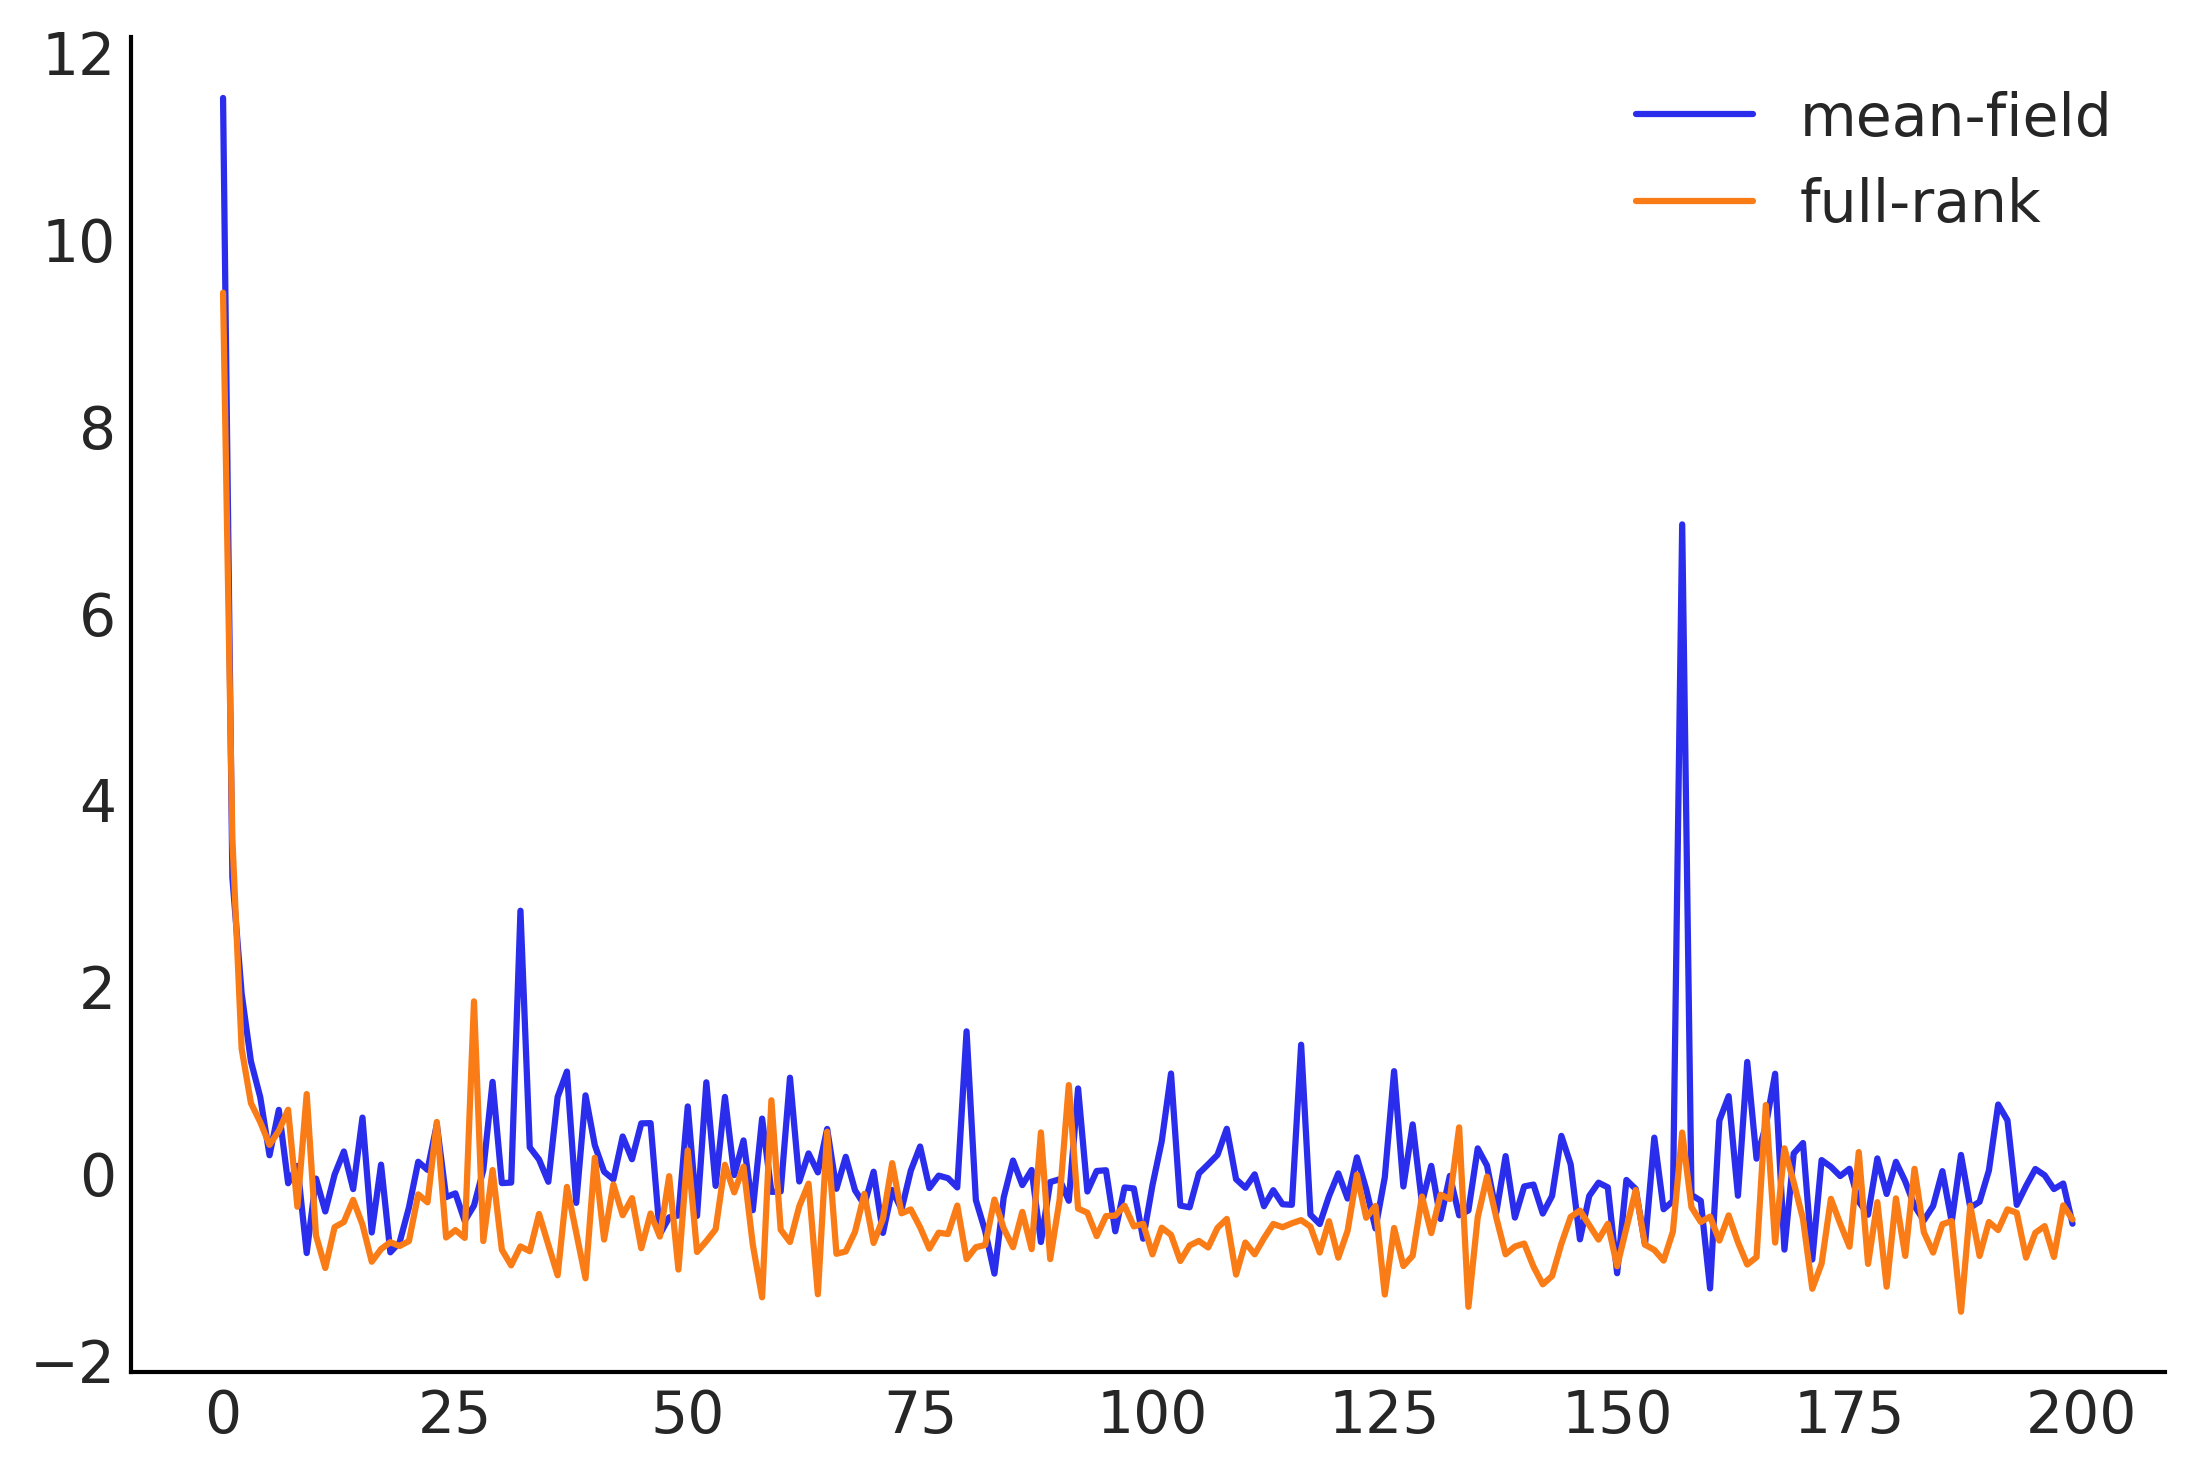

In [22]:
plt.plot(np.asarray(losses).T)
plt.legend(['mean-field', 'full-rank']);

/tmp/ipykernel_321270/2635745829.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


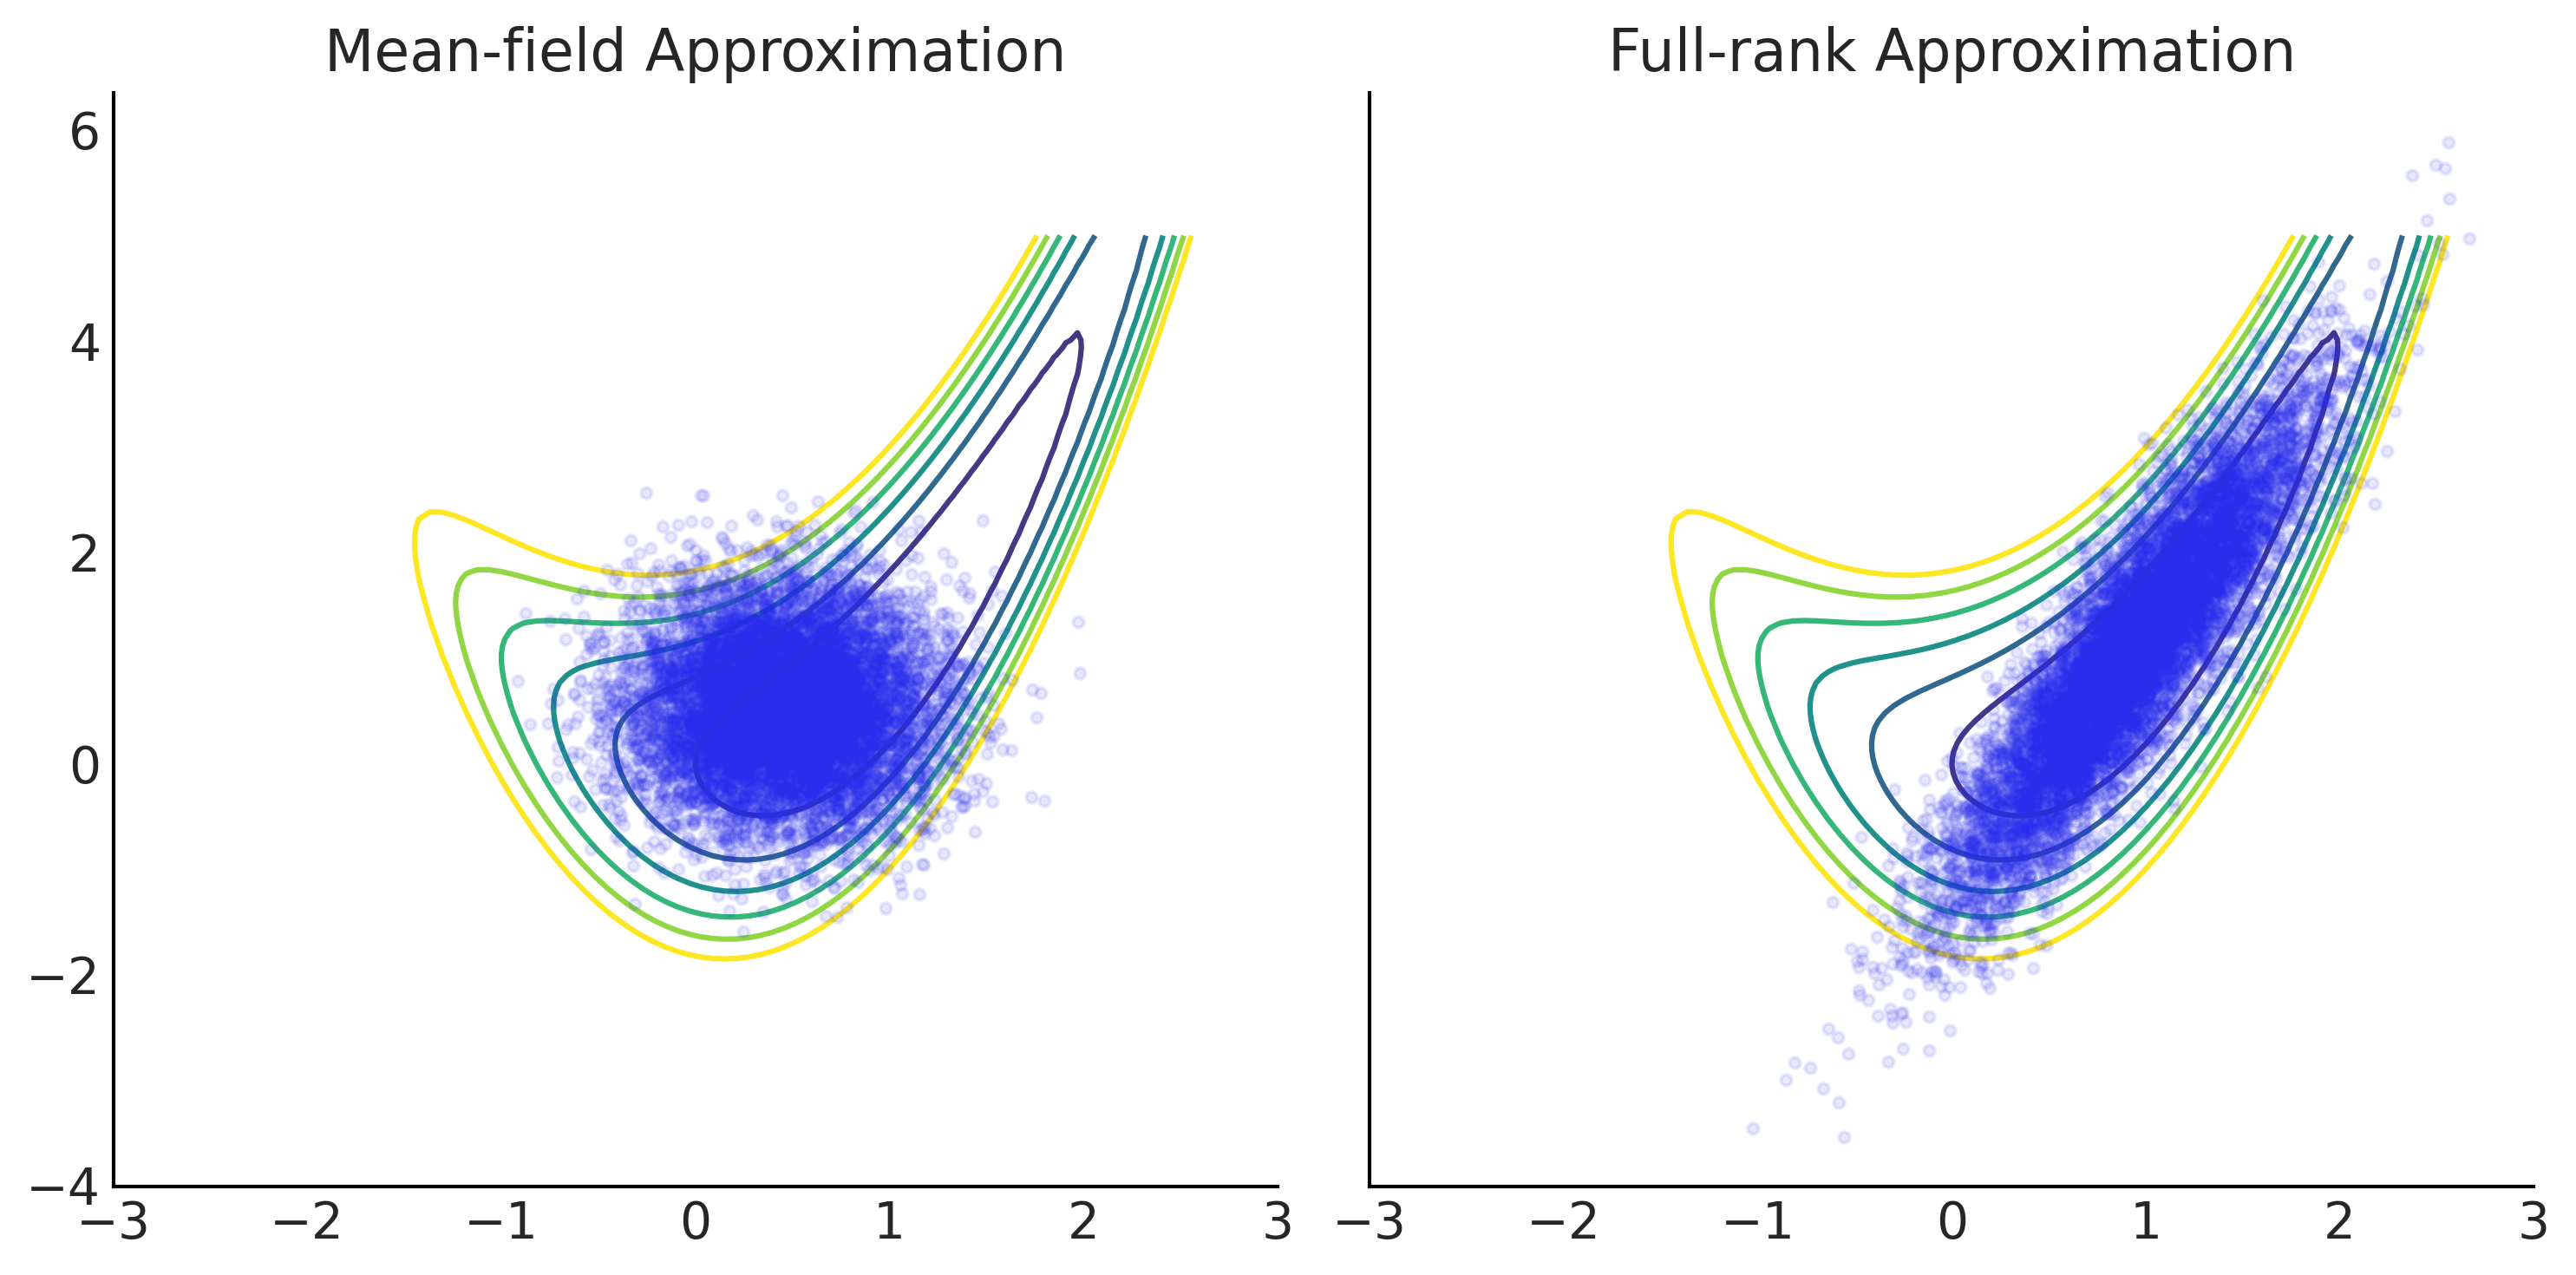

In [23]:
grid = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-2, 5, 100))
Z = - target_logprob(*grid)

_, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
for ax, approx, name in zip(
    axes,
    [mean_field_surrogate_posterior, full_rank_surrogate_posterior],
    ["Mean-field Approximation", "Full-rank Approximation"]):
    ax.contour(*grid, Z, levels=np.arange(7))
    ax.plot(*approx.sample(10000), ".", alpha=.1)
    ax.set_title(name)
plt.tight_layout();

plt.savefig("img/chp11/vi_in_tfp.png")

#### VI Deep dive

In [24]:
tfb = tfp.bijectors

In [25]:
event_shape = [(), ()]
full_rank_surrogate_posterior = tfp.experimental.vi.build_affine_surrogate_posterior(
    event_shape=event_shape, operators="tril")

# mean_field_surrogate_posterior = tfp.experimental.vi.build_affine_surrogate_posterior(
#     event_shape=event_shape, operators="diag")
mean_field_surrogate_posterior = tfd.JointDistributionSequential([
    tfd.Normal(tf.Variable(0.), tfp.util.TransformedVariable(1., bijector=tfb.Exp())),
    tfd.Normal(tf.Variable(0.), tfp.util.TransformedVariable(1., bijector=tfb.Exp())),
])

# Density estimation with MADE.
made = tfb.AutoregressiveNetwork(params=2, hidden_units=[10, 10])
flow_surrogate_posterior = tfd.TransformedDistribution(
    distribution=tfd.Sample(tfd.Normal(loc=0., scale=1.), sample_shape=[2]),
    bijector=tfb.Chain([
        tfb.JointMap([tfb.Reshape([]), tfb.Reshape([])]),
        tfb.Split([1, 1]),
        tfb.MaskedAutoregressiveFlow(made)
    ]))
# Create a Masked Autoregressive Flow bijector.
# prior = tfd.JointDistributionSequential([tfd.Normal(0., 1.), tfd.Normal(0., 1.)])
# maf = tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=net)
# flow_surrogate_posterior = tfp.experimental.vi.build_split_flow_surrogate_posterior(
#     event_shape=prior.event_shape_tensor(), trainable_bijector=maf)

# Optimization
losses = []
posterior_samples = []
for approx in [mean_field_surrogate_posterior, full_rank_surrogate_posterior, flow_surrogate_posterior]:
    loss = tfp.vi.fit_surrogate_posterior(
        target_logprob, approx, num_steps=200, optimizer=tf.optimizers.Adam(0.1),
        sample_size=5)
    losses.append(loss)
    # The approx is a tfp distribution, we can sample from it after training
    posterior_samples.append(approx.sample(10000))

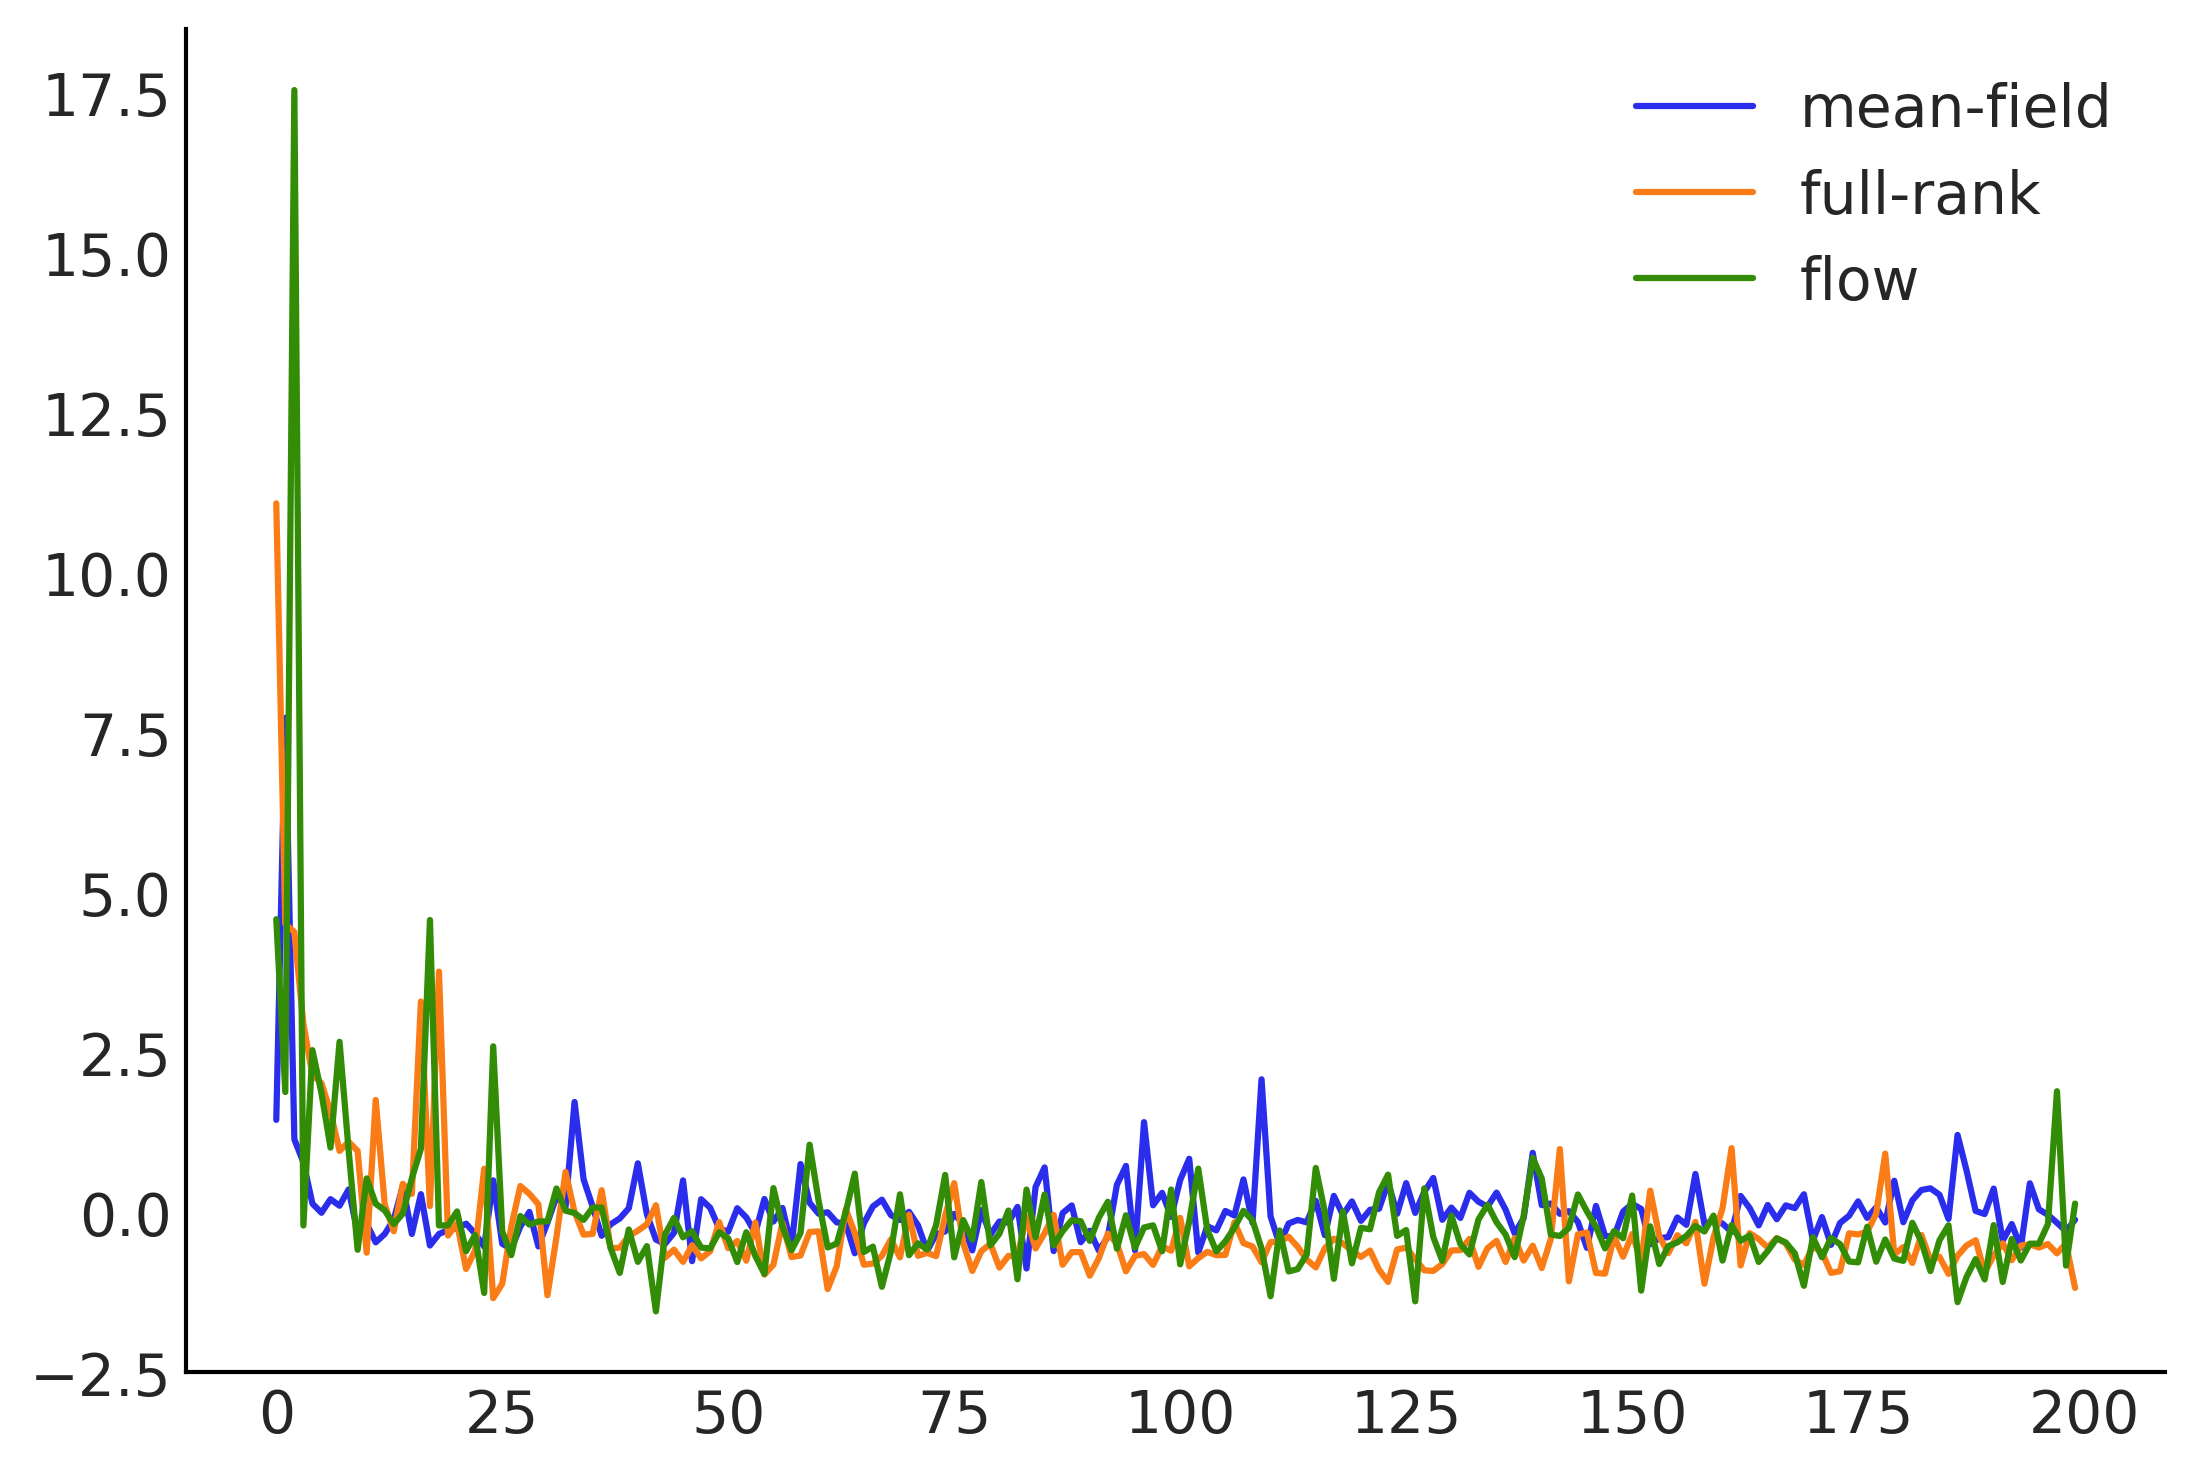

In [26]:
plt.plot(np.asarray(losses).T)
plt.legend(['mean-field', 'full-rank', 'flow']);

/tmp/ipykernel_321270/1954138361.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


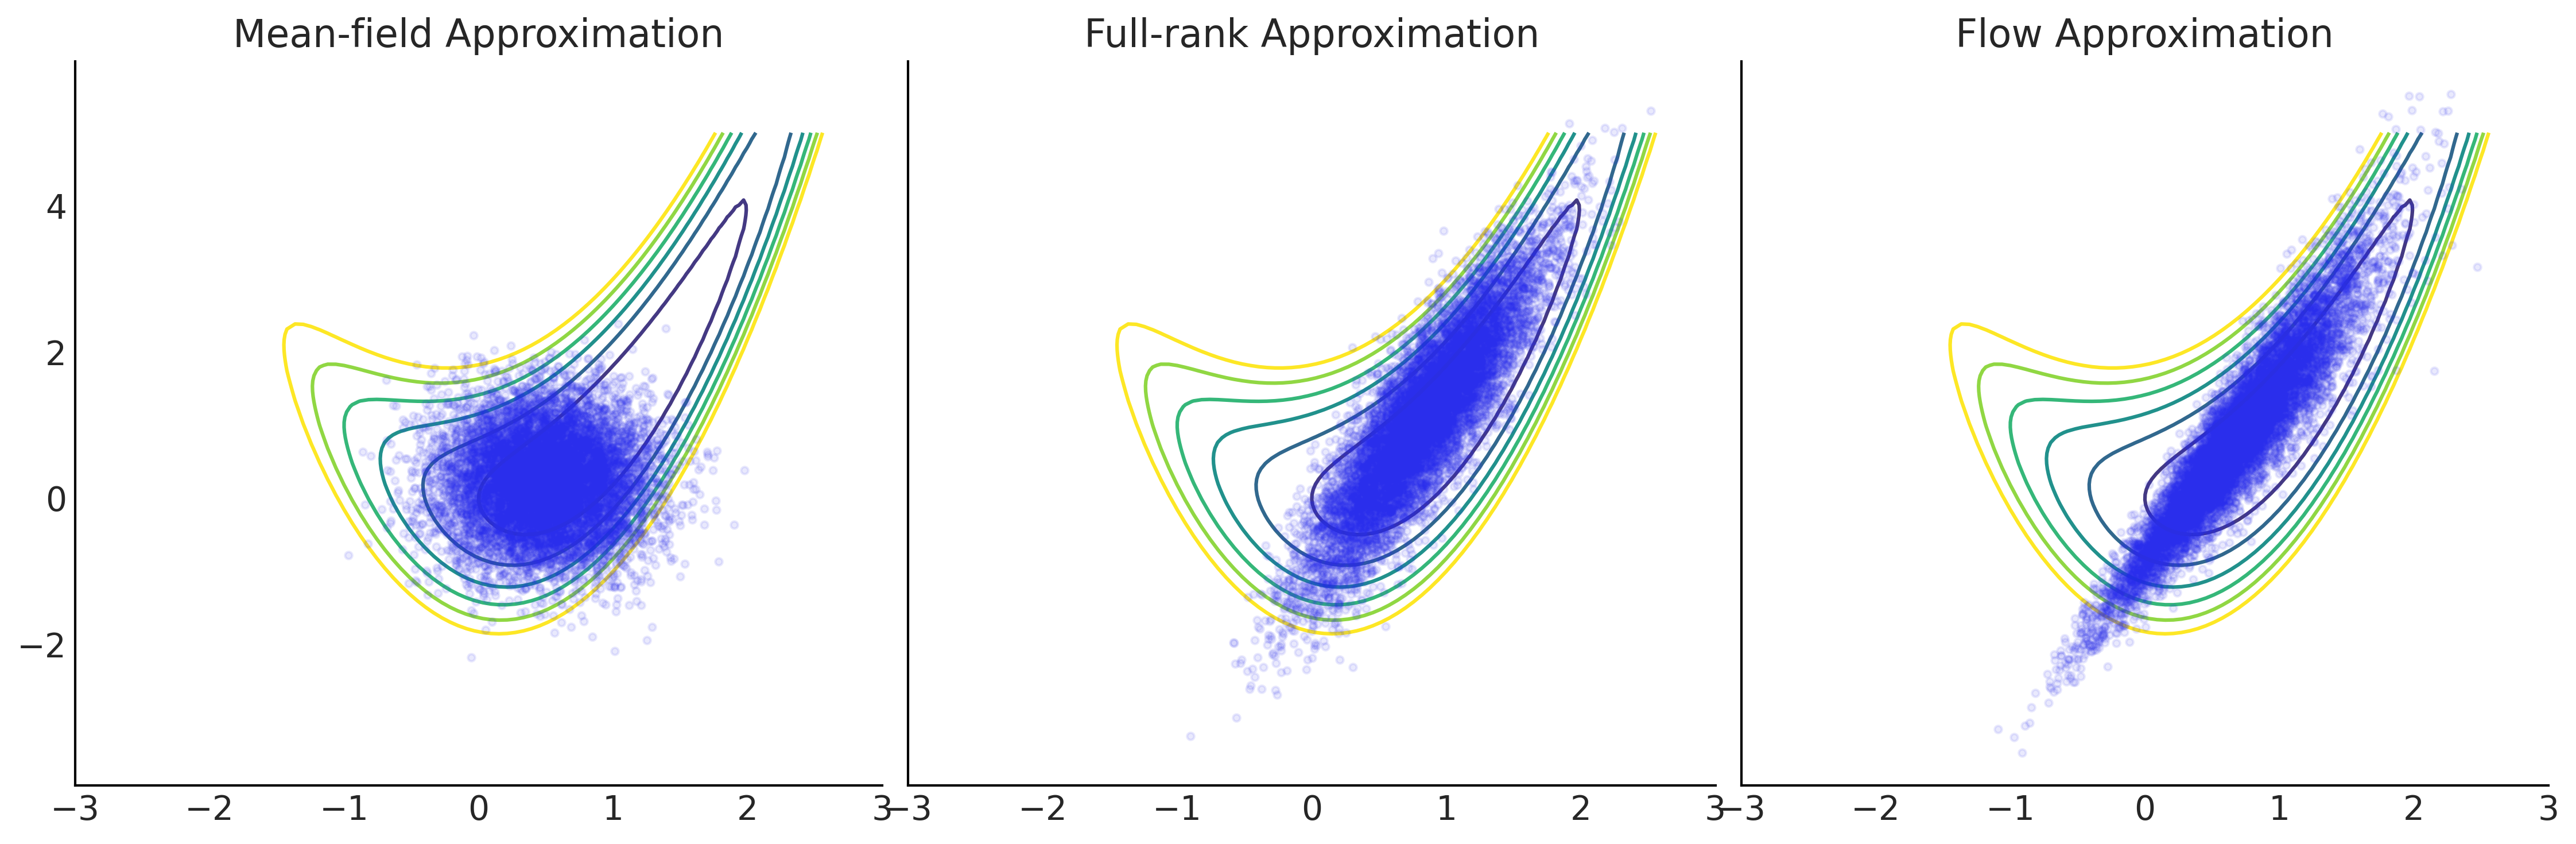

In [27]:
grid = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-2, 5, 100))
Z = - target_logprob(*grid)

_, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
for ax, approx, name in zip(
    axes,
    [mean_field_surrogate_posterior, full_rank_surrogate_posterior, flow_surrogate_posterior],
    ["Mean-field Approximation", "Full-rank Approximation", "Flow Approximation"]):
    ax.contour(*grid, Z, levels=np.arange(7))
    ax.plot(*approx.sample(10000), ".", alpha=.1)
    ax.set_title(name)
plt.tight_layout();

(programming_ref)=

## 11.10. Programming References

Part of computational Bayes is well, the computer and the software tools
now available. Using these tools help modern Bayesian practitioner share
models, reduce mistakes, and speed up the model building and inference
process. To have the computer work for us we need to program it but
often this is easier said than done. To use them effectively still
requires thought and understanding. In this last section we will provide
some high level guidance for the major concepts.

(which-programming-language)=

### 11.10.1. Which Programming Language?

There are many programming languages. We primarily used Python, but
other popular languages such as Julia, R, C/C++ exist with specialized
application for Bayesian computation as well. So which programming
language should you use? There is no universal right or wrong answer
here. Instead you should always consider the complete ecosystem. In this
book we use Python because packages like ArviZ, Matplotlib, and Pandas
to make data processing and displaying easy. This is not exclusive to
Python. For a Bayesian specifically consider the PPLs available in that
particular language, because if none exists then you might want to
reconsider your programming language of choice. Also consider the
community you want to work with and what language they use. One of the
authors of this book lives in Southern California, so knowing English,
and a bit of Spanish makes a lot of sense, because with those two he
could communicate in common situations. It is the same with programming
languages, if your future lab group uses R then learning R is a good
idea.

Computational purists may exclaim that some languages are faster than
others computationally. This of course is true but we advise not getting
too wrapped up in the discussion of "which is the fastest ppl\". In real
life scenarios different models take different amount of time to run.
Additionally there is "human time\" which is the time for one to iterate
and come up with a model, and "model run time\" which is the time it
takes for the computer to return a useful result. These are not the same
and in different situations one is more important than the other. This
is all to say, do not worry too much about picking the "right\" up front
language, if you learn one effectively the concepts will transfer to
another.

(version-control)=

### 11.10.2. Version Control

Version control is not necessary but is absolutely recommended and will
incur great benefits if utilized. When working alone, version control
lets you iterate through model designs without worry about losing your
code or making changes or experiment that breaks your model. This by
itself lets you iterate quicker and with more confidence, as well as the
ability to switch back and forth between different model definitions.
When working with others, version control enables collaboration and code
sharing, that would be challenging or impossible to perform without the
snapshotting or comparison features that version control systems allows.
There are many different version control systems (Mercurial, SVN,
Perforce) but git is currently the most popular. Version control is not
typically tied to a particular programming language.

(dependency-management-and-package-repositories)=

### 11.10.3. Dependency Management and Package Repositories

Nearly all code relies on other code to run (it is turtles all the way
down). PPLs in particular rely on a lot of different libraries to run.
We strongly suggest familiarizing yourself with a requirements
management tool that helps you see, list, and freeze the packages your
analysis relies on. Additionally package repositories are where these
requirement packages are fetched from. These are typically specific to
the language, for example, one requirements management tool in Python is
pip, and a popular cloud repository is pypi. In Scala sbt is one tool
that helps with dependencies and Maven is a popular package repository.
All mature languages will have this tooling, but you must make the
conscious choice to use them.

(environment-management)=

### 11.10.4. Environment Management

All code executes in an environment. Most people forget this until their
code suddenly stops working, or does not work on another computer.
Environment management is the set of tools used to create a reproducible
computation environment. This is of particular importance to Bayesian
Modelers who deal with enough randomness in their models, and do not
want the computer to add an additional layer of variability.
Unfortunately Environment Management is also one of the most confusing
portions of programming. In general there are two rough types of
environment control, language specific and language agnostic. In Python
virtualenv is a python specific environment manager, whereas
containerization and virtualization are language agnostic. We have no
specific suggestion here as the choice depends largely on your comfort
with these tool, and also where you plan to run the code. We do
absolutely recommend making a deliberate choice here though, as it makes
sure you have reproducible results.

(dev_environment)=

### 11.10.5. Text Editor vs Integrated Development Environment vs Notebook

When writing code, you must well, write it somewhere. For data minded
folks there are typically three interfaces for this.

The first and simplest is a text editor. The most basic text editors
allow you to, surprise, edit text and save it. With these editors you
can write a python program, save it, and then run it. Typically text
editors are very "light weight\" and do not include much extra
functionality besides basic things like find and replace. Think of text
editors like a bicycle. They are simple, their interface is basically a
handlebar and some pedals, and they will get you from here to there but
its mostly on you to do the work.

Integrated Development Environments (IDE) by comparison the modern
airplanes. They have an insane amount of functionality, a lot buttons,
and a lot of automation. IDEs let you edit text at their core, but as
the name suggests they integrate many other aspects of development as
well. For example, functionality for running code, unit-testing, linting
code, version control, code version comparison, and much much more. IDEs
are typically most useful when writing a lot of complicated code that
spans many modules.

While we would love to provide a simple definition of a text editor vs
IDE, the line these days is very blurry. Our suggestion is start more on
the text editor side and move to IDEs once familiar with how code works.
Otherwise it will be hard for you to tell what the IDE is doing for you
"under the hood\".

Notebooks are an entirely different interface. Notebooks are special in
they mix code, output, and documentation, as well as allowing nonlinear
code execution. For this book the majority of the code, and figures, are
presented in Jupyter Notebook files. We also provide links to Google
Colab which a cloud notebook environment. Notebooks are typically best
used for exploratory data analysis, and explanatory type situations,
such as this book. They are not so well suited for running production
code.

Our suggestion for notebooks is similar to IDEs. If new to statistical
computing start with a text editor first. Once you have a strong handle
of how to run code from individual files, then move to notebook
environments, either a cloud hosted Google colab, or Binder instance, or
a local Jupyter Notebook

(the-specific-tools-used-for-this-book)=

### 11.10.6. The Specific Tools Used for this Book

Here is what we used for this book. This does not mean these are the
only tools you can use, these are just the ones we used.

-   **Programming Language**: Python

-   **Probabilistic Programming Languages**: PyMC3, TensorFlow
    Probability. Stan and Numpyro are displayed briefly as well.

-   **Version control**: git

-   **Dependency Management**: pip and conda

-   **Package repository**: pypi, conda-forge

-   **Environment Management**: conda

-   **General Documentation**: LaTeX (for book writing), Markdown (for
    code package), Jupyter Notebooks